# Customer Retention 

Lets us explore the data and make required conclusions

# importing Libraries

In [1]:
#libraries required for data analysis,scientific computation and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading dataset
data=pd.read_excel("cr_normal.xlsx")
df=pd.read_excel("cr_encoded.xlsx")

In [3]:
#let us check the data loaded
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [4]:
#changing the columns name
data.rename(columns={'1Gender of respondent':'Gender'},inplace=True)

In [5]:
data

Gender 2 How old are you?  3 Which city do you shop online from?  \
0      Male         31-40 years                                 Delhi   
1    Female         21-30 years                                 Delhi   
2    Female         21-30 years                         Greater Noida   
3      Male         21-30 years                               Karnal    
4    Female         21-30 years                            Bangalore    
..      ...                 ...                                   ...   
264  Female         21-30 years                                 Solan   
265  Female         31-40 years                             Ghaziabad   
266  Female         41-50 yaers                            Bangalore    
267  Female  Less than 20 years                                 Solan   
268  Female         41-50 yaers                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                                    Mobile internet         
267                                              Wi-Fi         
268                                    Mobile Internet         

    8 Which device do you use to access the online shopping?  \
0                       

In [6]:
#The columns present in the dataset
data.columns

Index(['Gender', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how do you reach th

There are 269 rows and 71 columns in dataset

In [7]:
#Changing column names to easily understandable form

data.set_axis(['gender', 'age',
       'shopping city',
       'shopping pincode',
       'shopping since',
       'no of times purchase done online',
       'method of internet access',
       'device used',
       'screen size of device',
       'OS',
       'browser',
       'channel',
       're-reaching store',
       'purchase time',
       'preferred payment',
       'frequency of abandoning at payment stage',
       'reason for abandoning',
       'easy content',
       'good suggestion for product comparision',
       'complete information for purchase decision',
       'clear and relevant information on listed products',
       'ease of navigation', 
       'loading and processing speed',
       'user friendly Interface',
       'convenient Payment methods',
       'trust on transcation in time',
       'empathy towards the customers',
       'privacy guarantee',
       'availability of efficient communication channels ',
       'gives monetary benefit and discounts',
       'enjoyment is derived',
       'convenient and flexible',
       'return and replacement policy important for purchase decision',
       'gaining access to loyalty programs is benefit',
       'displaying quality Information improves satisfaction',
       'good quality website or application is must',
       'net Benefit derived gives users satisfaction',
       'User satisfaction cannot exist without trust',
       'offering a wide variety of listed product in several category',
       'provision of complete and relevant product information',
       'monetary savings',
       'convenience of patronizing the online retailer',
       'shopping on the website gives you the sense of adventure',
       'shopping on your preferred e-tailer enhances your social status',
       'you feel gratification shopping on your favorite e-tailer',
       'shopping on the website helps you fulfill certain roles',
       'getting value for money spent',
       'online retailers you have shopped from',
       'Easy to use website or application',
       'Visual appealing web-page layout', 
       'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 
       'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Best online retailer to recommend'],axis=1,inplace=True)

we have changed the column names to understand properly the data and avoid confusion

In [8]:
# As we are not able to see the column. let us set option to display all the column names

pd.set_option("display.max_columns",None)

In [9]:
# The column name is now readable and easy to access
data

gender                 age  shopping city  shopping pincode  \
0      Male         31-40 years          Delhi            110009   
1    Female         21-30 years          Delhi            110030   
2    Female         21-30 years  Greater Noida            201308   
3      Male         21-30 years        Karnal             132001   
4    Female         21-30 years     Bangalore             530068   
..      ...                 ...            ...               ...   
264  Female         21-30 years          Solan            173212   
265  Female         31-40 years      Ghaziabad            201008   
266  Female         41-50 yaers     Bangalore             560010   
267  Female  Less than 20 years          Solan            173229   
268  Female         41-50 yaers      Ghaziabad            201009   

    shopping since no of times purchase done online method of internet access  \
0    Above 4 years                      31-40 times                   Dial-up   
1    Above 4 years               41 times and above                     Wi-Fi   
2        3-4 years               41 times and above           Mobile Internet   
3        3-4 years               Less than 10 times           Mobile Internet   
4        2-3 years                      11-20 times                     Wi-Fi   
..             ...                              ...                       ...   
264      1-2 years               Less than 10 times           Mobile Internet   
265      1-2 years                      31-40 times           Mobile Internet   
266      2-3 years               Less than 10 times           Mobile internet   
267      2-3 years               Less than 10 times                     Wi-Fi   
268      2-3 years                      31-40 times           Mobile Internet   

    device used screen size of device                     OS        browser  \
0       Desktop                Others  Window/windows Mobile  Google chrome   
1    Smartphone            4.7 inches                IOS/Mac  Google chrome   
2    Smartphone            5.5 inches                Android  Google chrome   
3    Smartphone            5.5 inches                IOS/Mac         Safari   
4    Smartphone            4.7 inches                IOS/Mac         Safari   
..          ...                   ...                    ...            ...   
264  Smartphone            5.5 inches                Android          Opera   
265  Smartphone                Others                Android  Google chrome   
266      Laptop                Others  Window/windows Mobile  Google chrome   
267  Smartphone            5.5 inches                Android  Google chrome   
268  Smartphone            5.5 inches                Android  Google chrome   

               channel re-reaching store      purchase time  \
0        Search Engine     Search Engine          6-10 mins   
1        Search Engine   Via application  more than 15 mins   
2        Search Engine   Via application         11-15 mins   
3        Search Engine     Search Engine          6-10 mins   
4    Content Marketing   Via application  more than 15 mins   
..                 ...               ...                ...   
264    Display Adverts      Social Media  more than 15 mins   
265      Search Engine   Via application    Less than 1 min   
266      Search Engine     Search Engine  more than 15 mins   
267      Search Engine        Direct URL           1-5 mins   
268      Search Engine   Via application         11-15 mins   

                      preferred payment  \
0    E-wallets (Paytm, Freecharge etc.)   
1                    Credit/Debit cards   
2    E-wallets (Paytm, Freecharge etc.)   
3                    Credit/Debit cards   
4                    Credit/Debit cards   
..                                  ...   
264              Cash on delivery (CoD)   
265              Cash on delivery (CoD)   
266                  Credit/Debit cards   
267              Cash on delivery (CoD)   
268              Cash on delivery (C

In [10]:
#Doing the same thing with the encoded dataset

df.set_axis(['gender', 'age',
       'shopping city',
       'shopping pincode',
       'shopping since',
       'no of times purchase done online',
       'method of internet access',
       'device used',
       'screen size of device',
       'OS',
       'browser',
       'channel',
       're-reaching store',
       'purchase time',
       'preferred payment',
       'frequency of abandoning at payment stage',
       'reason for abandoning',
       'easy content',
       'good suggestion for product comparision',
       'complete information for purchase decision',
       'clear and relevant information on listed products',
       'ease of navigation', 
       'loading and processing speed',
       'user friendly Interface',
       'convenient Payment methods',
       'trust on transcation in time',
       'empathy towards the customers',
       'privacy guarantee',
       'availability of efficient communication channels ',
       'gives monetary benefit and discounts',
       'enjoyment is derived',
       'convenient and flexible',
       'return and replacement policy important for purchase decision',
       'gaining access to loyalty programs is benefit',
       'displaying quality Information improves satisfaction',
       'good quality website or application is must',
       'net Benefit derived gives users satisfaction',
       'User satisfaction cannot exist without trust',
       'offering a wide variety of listed product in several category',
       'provision of complete and relevant product information',
       'monetary savings',
       'convenience of patronizing the online retailer',
       'shopping on the website gives you the sense of adventure',
       'shopping on your preferred e-tailer enhances your social status',
       'you feel gratification shopping on your favorite e-tailer',
       'shopping on the website helps you fulfill certain roles',
       'getting value for money spent',
       'online retailers you have shopped from',
       'Easy to use website or application',
       'Visual appealing web-page layout', 
       'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 
       'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Best online retailer to recommend'],axis=1,inplace=True)

In [11]:
#checking the number of rows and columns

data.shape

(269, 71)

In [12]:
#Checking for missing values

pd.set_option("display.max_rows",None) #to display everything
data.isnull().sum()

gender                                                                     0
age                                                                        0
shopping city                                                              0
shopping pincode                                                           0
shopping since                                                             0
no of times purchase done online                                           0
method of internet access                                                  0
device used                                                                0
screen size of device                                                      0
OS                                                                         0
browser                                                                    0
channel                                                                    0
re-reaching store                                                          0

There are no null values present in the dataset

In [13]:
#Checking datatypes

data.dtypes


gender                                                                     object
age                                                                        object
shopping city                                                              object
shopping pincode                                                            int64
shopping since                                                             object
no of times purchase done online                                           object
method of internet access                                                  object
device used                                                                object
screen size of device                                                      object
OS                                                                         object
browser                                                                    object
channel                                                                    object
re-reaching stor

All the data are of categorical type as we have only information and surveys taken from customers to analyze it. Pincode is of integer which can be considered as categorical as it is also consits same pincode data for manay customers

In [14]:
#information on data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   gender                                                                   269 non-null    object
 1   age                                                                      269 non-null    object
 2   shopping city                                                            269 non-null    object
 3   shopping pincode                                                         269 non-null    int64 
 4   shopping since                                                           269 non-null    object
 5   no of times purchase done online                                         269 non-null    object
 6   method of internet access                                                269 non-n

##### Observation : There are no missing values and dataset is ready for visualization and make conclusion

# Data Visualizing

Here we are going to analyse each and every column and make relevant conclusion 

In [15]:
#Since we have lot of columns we can divide it as col1, col2, col3
#col1 represents General information
#col2 represents Factors found best by users in online shopping
#col 3 represents relevant information on website or stores

col1=['gender', 'age',
       'shopping city',
       'shopping pincode',
       'shopping since',
       'no of times purchase done online',
       'method of internet access',
       'device used',
       'screen size of device',
       'OS',
       'browser',
       'channel',
       're-reaching store',
       'purchase time',
       'preferred payment',
       'frequency of abandoning at payment stage',
       'reason for abandoning']

col2=['easy content',
       'good suggestion for product comparision',
       'complete information for purchase decision',
       'clear and relevant information on listed products',
       'ease of navigation', 
       'loading and processing speed',
       'user friendly Interface',
       'convenient Payment methods',
       'trust on transcation in time',
       'empathy towards the customers',
       'privacy guarantee',
       'availability of efficient communication channels ',
       'gives monetary benefit and discounts',
       'enjoyment is derived',
       'convenient and flexible',
       'return and replacement policy important for purchase decision',
       'gaining access to loyalty programs is benefit',
       'displaying quality Information improves satisfaction',
       'good quality website or application is must',
       'net Benefit derived gives users satisfaction',
       'User satisfaction cannot exist without trust',
       'offering a wide variety of listed product in several category',
       'provision of complete and relevant product information',
       'monetary savings',
       'convenience of patronizing the online retailer',
       'shopping on the website gives you the sense of adventure',
       'shopping on your preferred e-tailer enhances your social status',
       'you feel gratification shopping on your favorite e-tailer',
       'shopping on the website helps you fulfill certain roles',
       'getting value for money spent']

col3= ['online retailers you have shopped from',
       'Easy to use website or application',
       'Visual appealing web-page layout', 
       'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options', 
       'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
       'Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
       'Website is as efficient as before',
       'Best online retailer to recommend']

In [16]:
# 1. Let's see the gender, which gender of people is shopping more 

data['gender'].value_counts()

Female    181
Male       88
Name: gender, dtype: int64

Text(0, 0.5, 'Numbers')

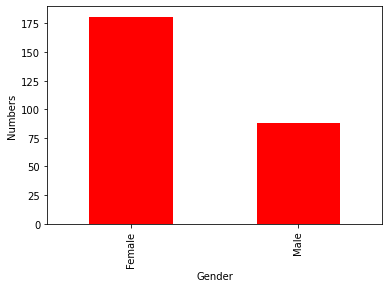

In [17]:
# bar graph 
data['gender'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Gender')
plt.ylabel('Numbers')

<AxesSubplot:xlabel='gender', ylabel='count'>

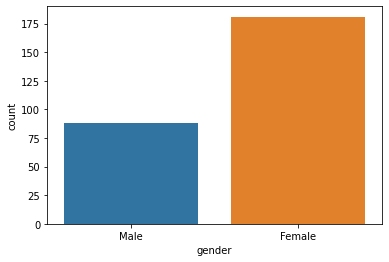

In [18]:
sns.countplot(data['gender'])

we have 181 Female and 88 males using e commerce in this dataset

Text(0, 0.5, 'Gender')

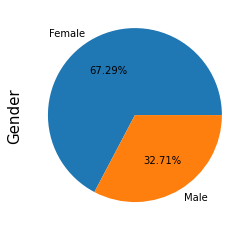

In [19]:
data.groupby('gender').size().plot(kind='pie', autopct='%.2f%%')
plt.ylabel('Gender', size=15)

#### Observation : In the data given, Females using e-commerce sites are of 67.29% and Males are of 32.17%. Female category is higher than male category. So online retailers should concentrate on female customers more for good retaining of customers. We know that we have to be very careful in retaining female customers as they look into multiple factors

we can have a rough draft of bar graph on col 1 first to just understand the dataset. After that we can write observation individually for writing conclusion

In [20]:
#userdefined function for plotting graph for different available data. we can infer from the graph that which has the best weightage for succesfully retaining customer

def bar(i):
    
    plt.figure(figsize=(14,8))
    print(data[col1[i]].value_counts())
    print("-"*100)
    sns.countplot(data[col1[i]].sort_values())
    plt.figure(figsize=(8,6))
    data[col1[i]].value_counts().plot(kind='bar',color='green')
    plt.xlabel(col1[i])
    plt.ylabel('Numbers')
    plt.figure(figsize=(14,8))
    data.groupby(col1[i]).size().plot(kind='pie', autopct='%.2f%%')
    plt.xlabel(col1[i], size=15)
    plt.ylabel(' ', size=15)

we can see which are the best factors and reasons that has to be continued or stopped from this graphs. Let us explore more deeply for getting best observation and recommendation for improving the customer retention

In [21]:
# 2. Let's see the age, which range of age people is shopping more frequently . we just need to specify the column number

len(col1)

17

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: age, dtype: int64
----------------------------------------------------------------------------------------------------


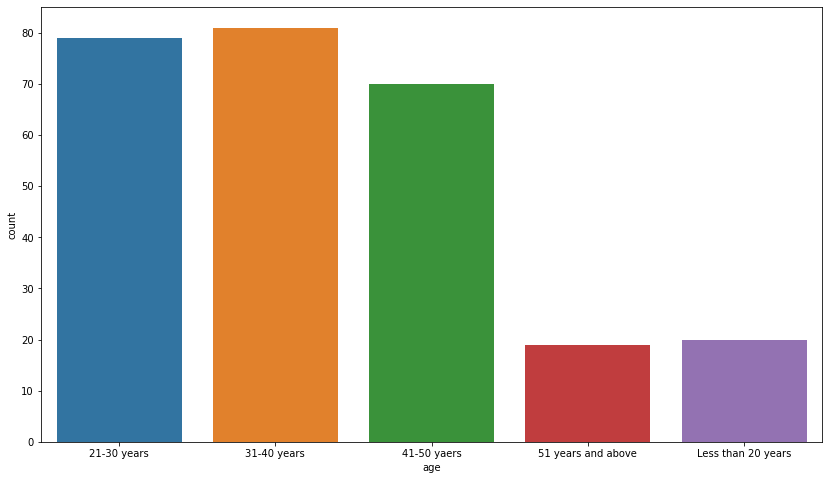

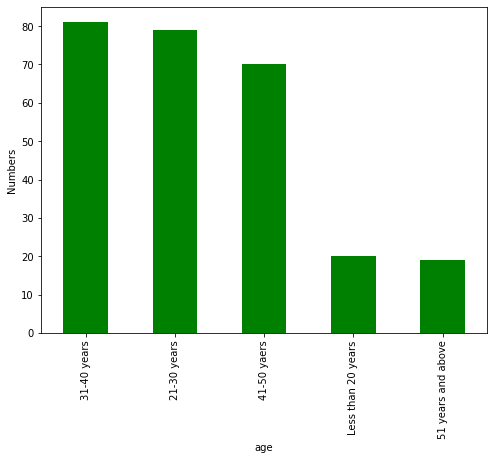

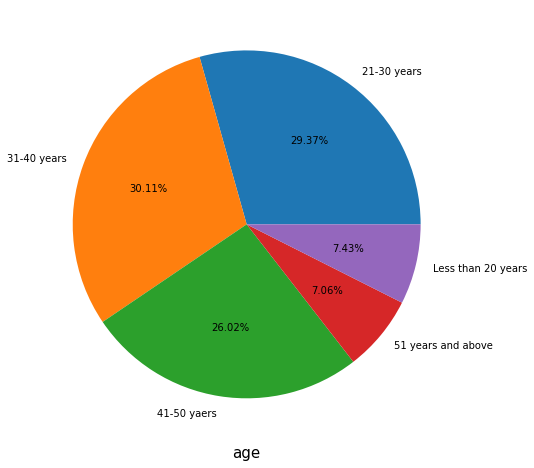

In [22]:
bar(1)

#### Observation : We can see that the people in the range of 31-40 years is high in shopping online with 30.11%. Following that 21-30 years category with 29.37% and 41-50 years category with 26.02%. Less than 20 years nad 51 years+ is of 7% each 

In this dataset

1. The people of age between 31-40 years is 81

2. The people of age between 21-30 years is 79

3. The people of age between 41-50 yaers  is 70

4. The people of age between Less than 20 years is 20

5. The people of age between 51 years and above is 19

#### Reccomendation : If we can target people of age between 21-50 years fulfilling their needs. we can retain customers very efficiently and grow business

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: shopping city, dtype: int64
----------------------------------------------------------------------------------------------------


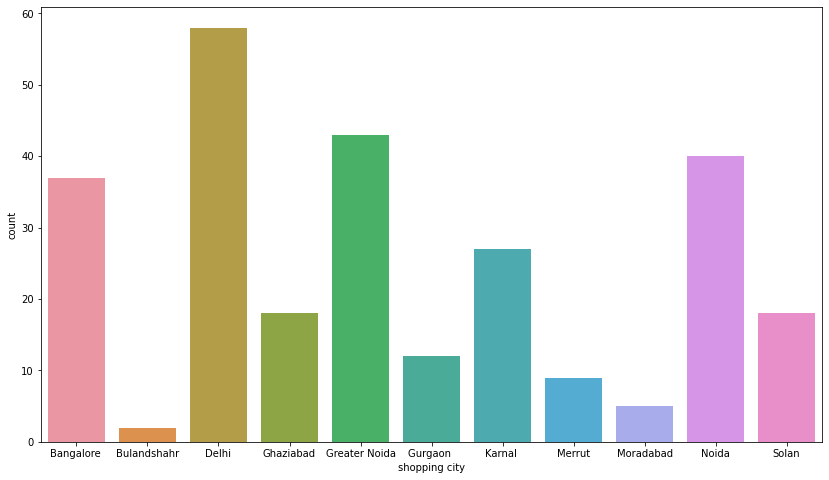

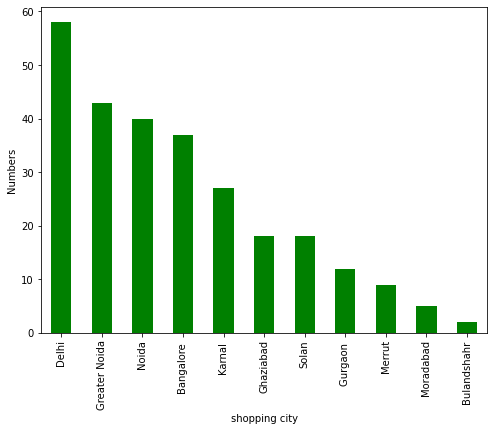

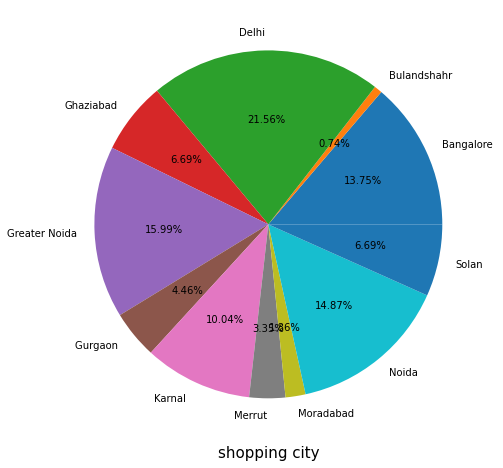

In [23]:
# 3. Let's see the city of users
bar(2)

#### Observation : We have large number of users in Delhi with 21.56%,Greater Noida and Noida covers 30% of users . Bangalore with 13.75 %. The lowest number of users are in Bulandshahr qith 0.74%

In this dataset

The user belonging to Delhi            58

The user belonging to Greater Noida    43

The user belonging to Noida            40

The user belonging to Bangalore        37

The user belonging to Karnal           27

The user belonging to Ghaziabad        18

The user belonging to Solan            18

The user belonging to Gurgaon          12

The user belonging to Merrut            9

The user belonging to Moradabad         5

The user belonging to Bulandshahr       2


#### Recommendation : We should target on Delhi, Noida, Greater Noida and Banglore users for retaining customers whereas there is a scope of business improvement in Bulandshahr,Meerut,Moradabad,Gurgaon etc 

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: shopping pincode, dtype: int64
----------------------------------------------------------------------------------------------------


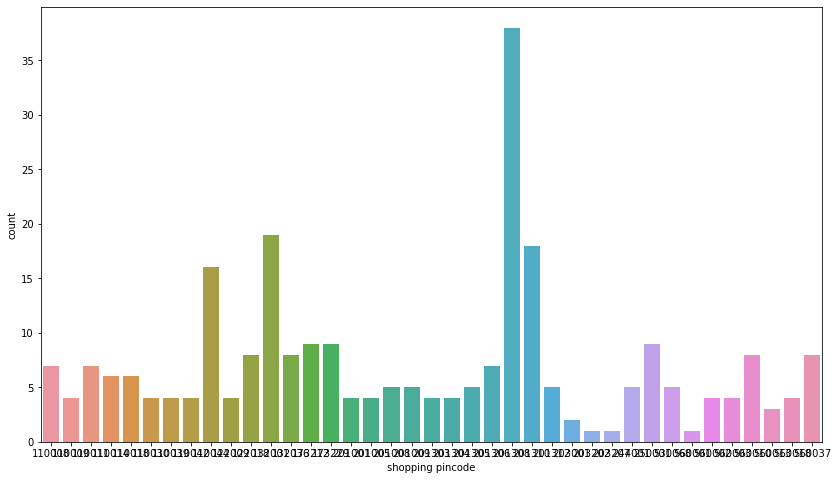

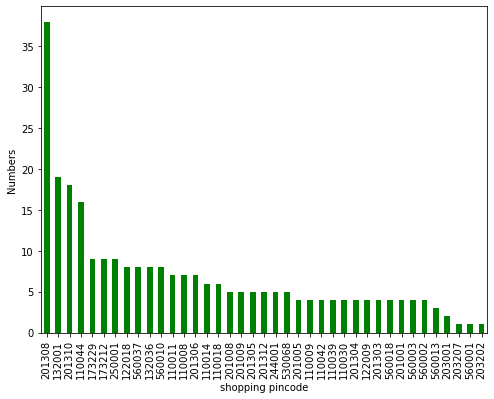

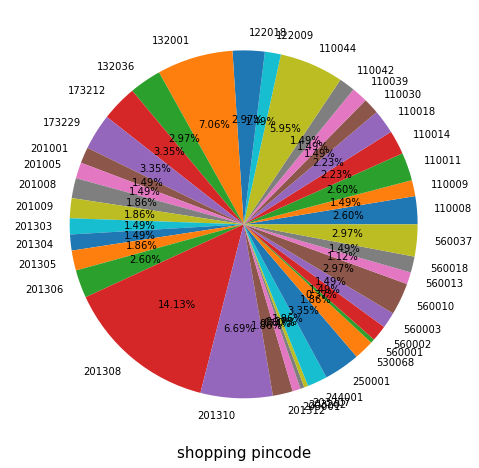

In [24]:
#Pincodes User uses
bar(3)

#### Observation : we have many of the pincodes. The largest number of users are from pincode 201310

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: shopping since, dtype: int64
----------------------------------------------------------------------------------------------------


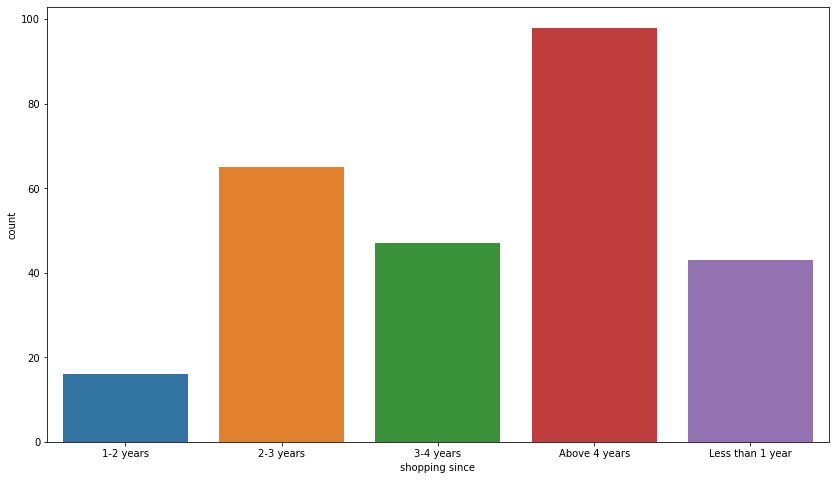

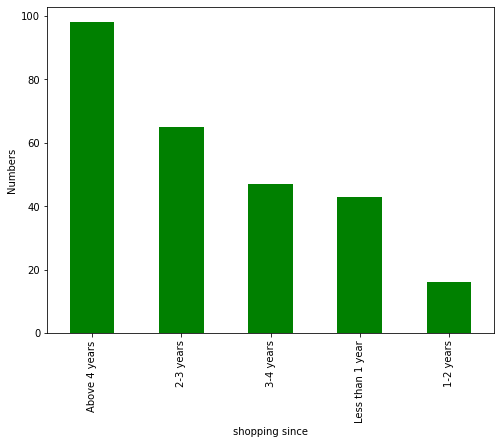

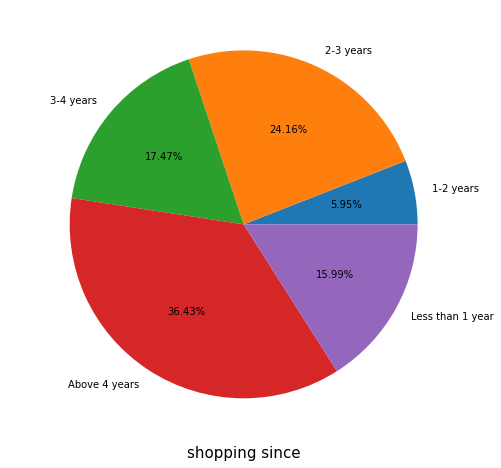

In [25]:
# we can see from when customers are shopping
bar(4)

#### Observation : We can see users shopping Above 4 years is highest with 36.43%. That means online retailers are successful in retaining customers.The lowest number of users are 5.95 % who have only 1-2 years experience in shopping.

In this dataset

Users shopping for Above 4 years       98

Users shopping for 2-3 years           65 

Users shopping for 3-4 years           47

Users shopping for Less than 1 year    43

Users shopping for 1-2 years           16

#### Recommendation : We can focus on giving good experience to new users as the lowest number of people are are new users  and 1-2 years

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: no of times purchase done online, dtype: int64
----------------------------------------------------------------------------------------------------


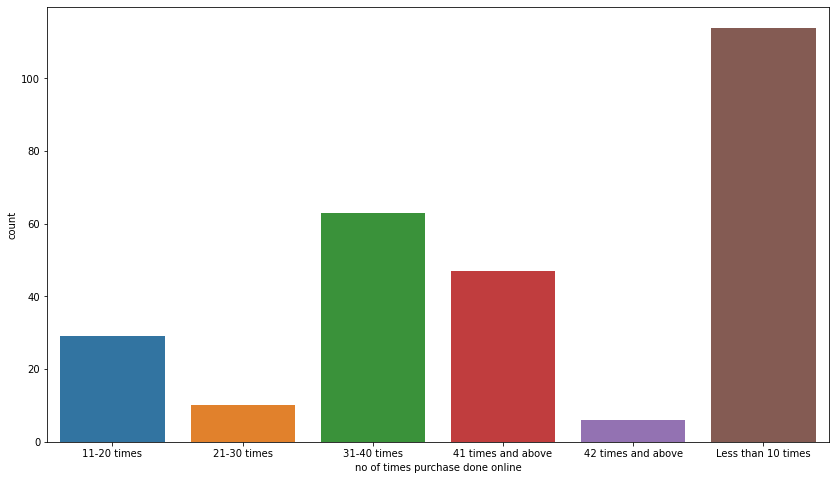

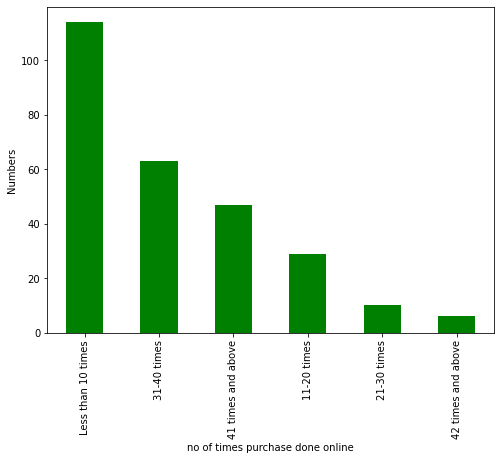

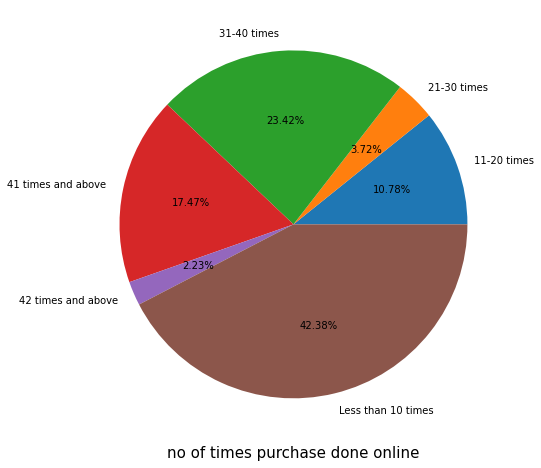

In [26]:
# let us check number of times purchase done online
bar(5)

#### In this dataset 

Purchase done Less than 10 times    114

Purchase done 31-40 times            63

Purchase done 41 times and above     47

Purchase done 11-20 times            29

Purchase done 21-30 times            10

Purchase done 42 times and above      6


#### Observartion : The number of purchase done online users are low as 42.38 % of users only made online purchase less than 10 times. Here is a scope of improvement to identify what makes the user to make less number of purchase and improve that

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: method of internet access, dtype: int64
----------------------------------------------------------------------------------------------------


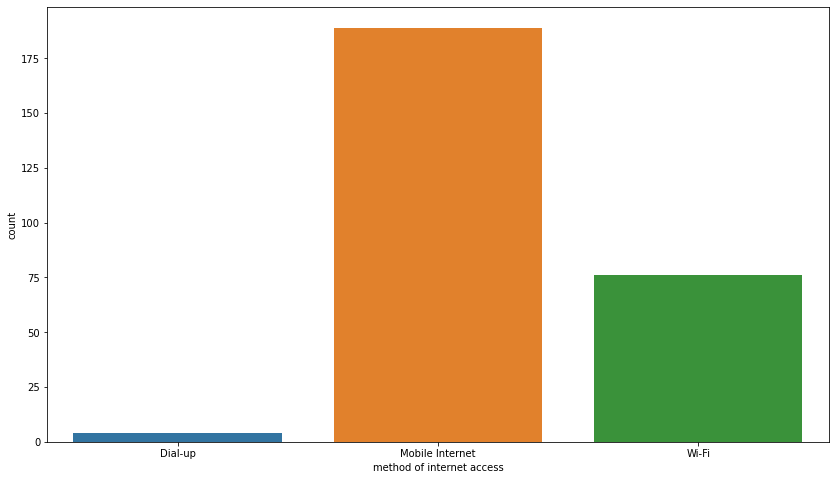

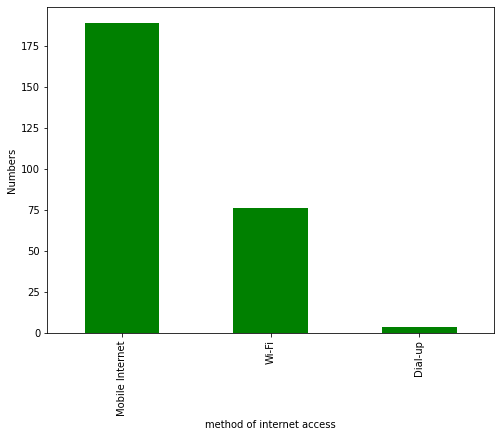

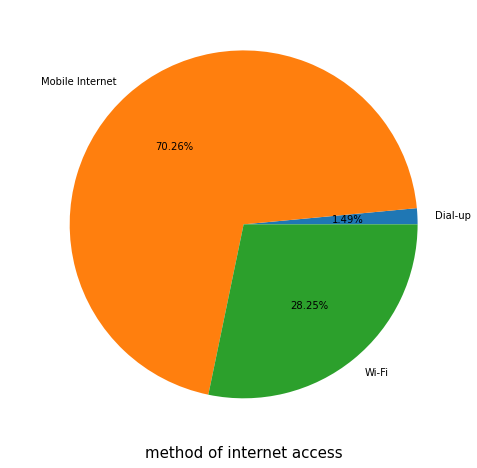

In [27]:
#Method of Internet usage. Since we have similar data Mobile internet only varying caps , we can replace it as single data

data['method of internet access'].replace('Mobile internet','Mobile Internet',inplace=True)
bar(6)

#### In this dataset 

User using Mobile Internet    189

User using Wi-Fi               76

User using Dial-up              4

#### observation : 70.26% users uses mobile internet for shopping and wifi users are of 28.25%. Improving UI/UX of mobile online retailer app can help in retaining customers.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: device used, dtype: int64
----------------------------------------------------------------------------------------------------


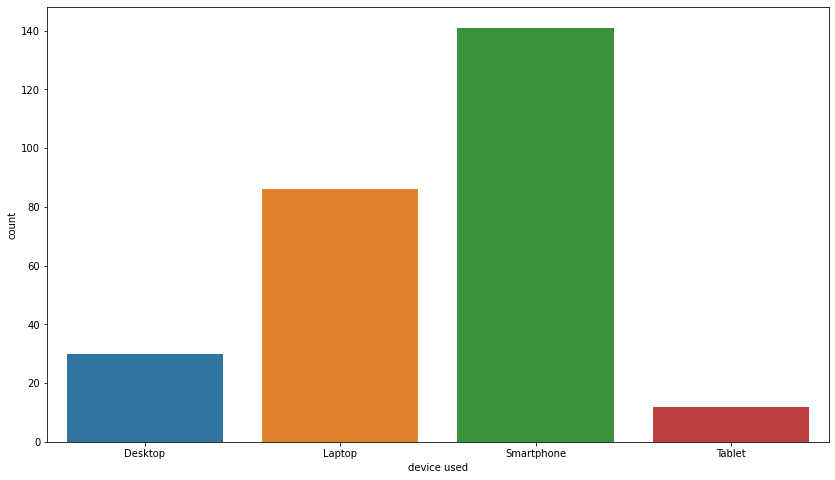

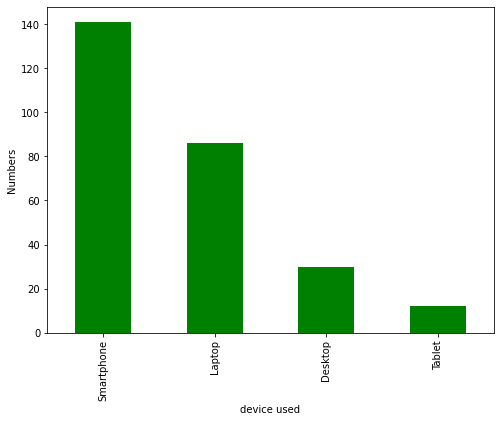

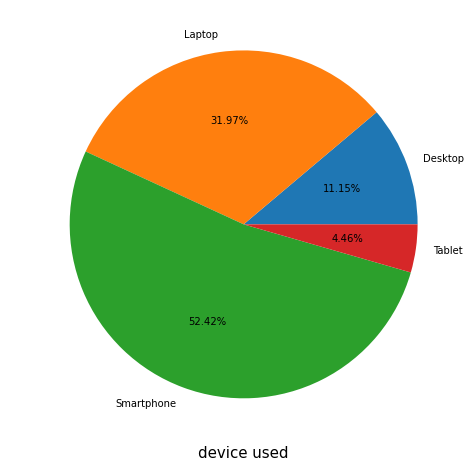

In [28]:
# device used
bar(7)

#### In this dataset

Smartphone Users   141

Laptop  Users       86

Desktop Users     30

Tablet Users        12

 #### observation : Smartphone users are high of 52.42% and then comes the laptop users with 31.97 %. Tablet users are of only 4.46%. Targeting smartphone and laptop users help in retaining the customers and there is a scope of improvement for tablet users by alternate method. Smartphone UI maynot be flexible for tablet.

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: screen size of device, dtype: int64
----------------------------------------------------------------------------------------------------


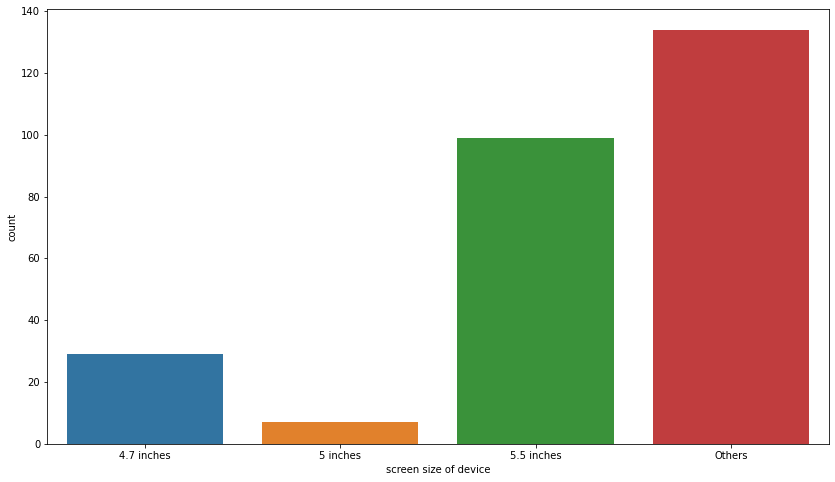

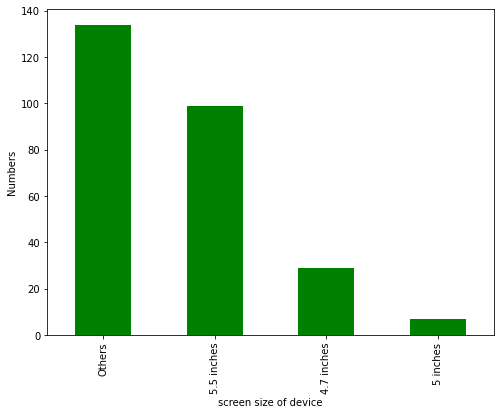

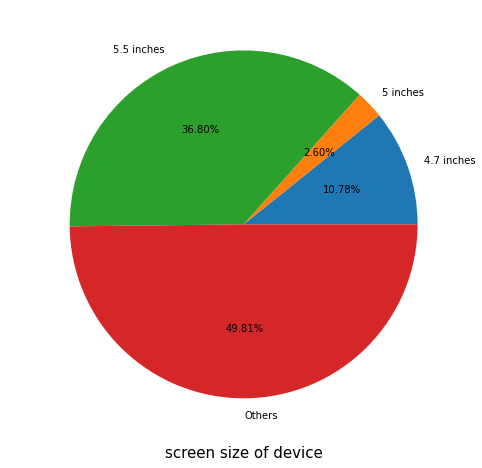

In [29]:
#Screen Size of users

bar(8)

#### In this dataset

Screen size Unknown        134

Screen size 5.5 inches     99

Screen size 4.7 inches     29

Screen size 5 inches        7

#### observation : Here Majority of users screen size is unknown (49.81%) but mean can be taken as 5.5 inches as most of the smartphone comes with 5.5 inches screen. If we can have fonts perfectly suiting for 5.5 inches screen, we will be able to provide better user experience.

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64
----------------------------------------------------------------------------------------------------


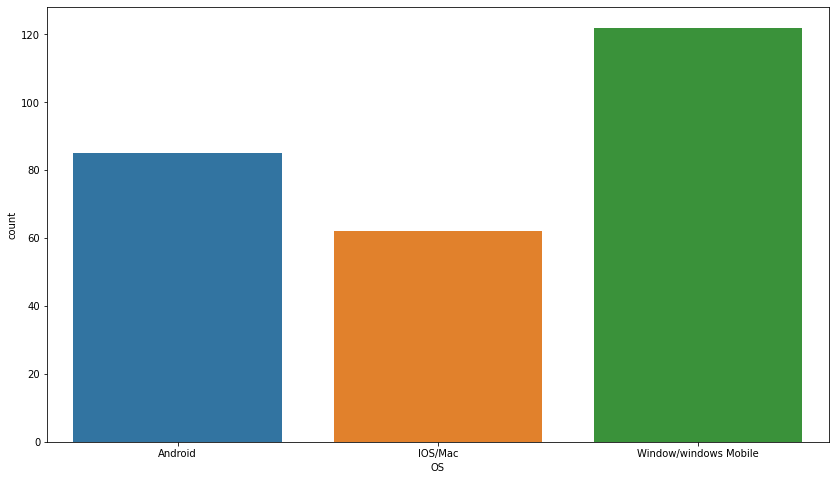

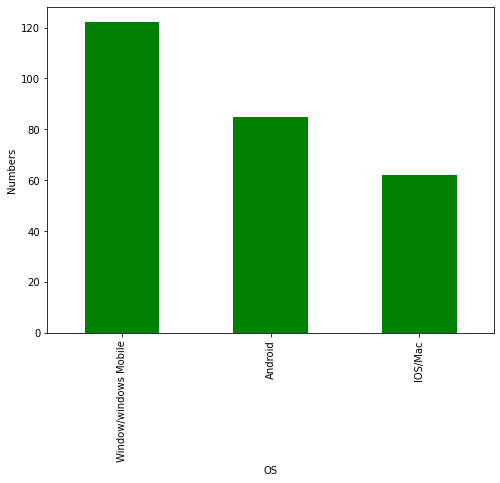

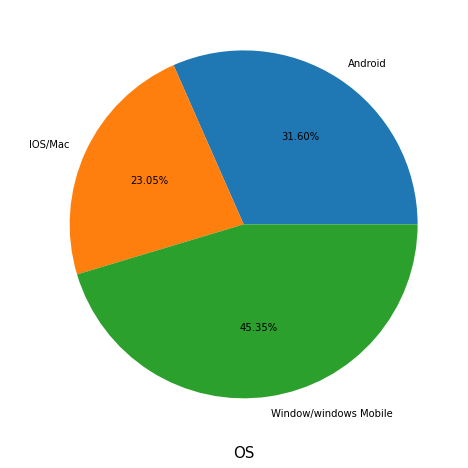

In [30]:
#OS used
bar(9)

#### In this dataset, OS used by users

Window/windows Mobile    122

Android                   85

IOS/Mac                   62

#### observation : we can see high number of users using windows about 45.35% and android 31.60%. Improving, updating windows and android application will helps in retaining customers and there is a scope of improvement in IOS/Mac applications.

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: browser, dtype: int64
----------------------------------------------------------------------------------------------------


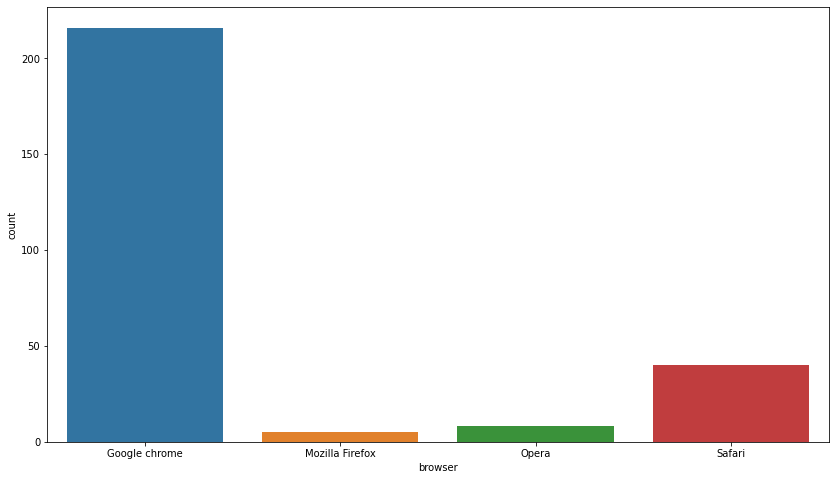

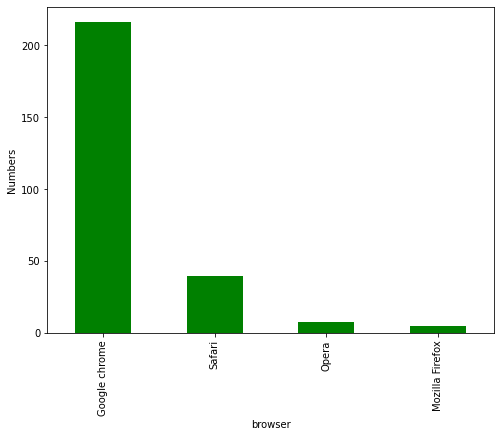

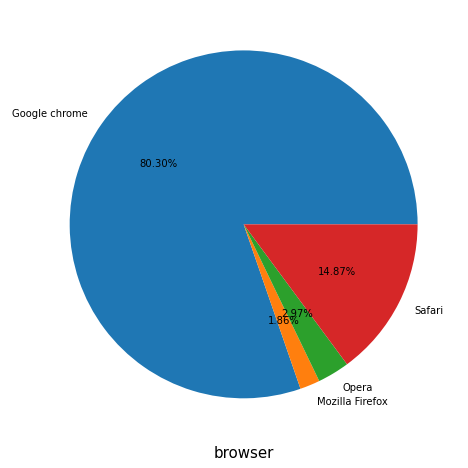

In [31]:
#Browser
bar(10)

#### In this dataset, Browser used by users

Google chrome      216

Safari              40

Opera                8

Mozilla Firefox      5

#### observation : we can  maximum numbers of users using google chrome. we can retain customers by regular updating desktop website and UX used for chrome and there is a scope of improvement for mozilla firefox and opera browsers.

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: channel, dtype: int64
----------------------------------------------------------------------------------------------------


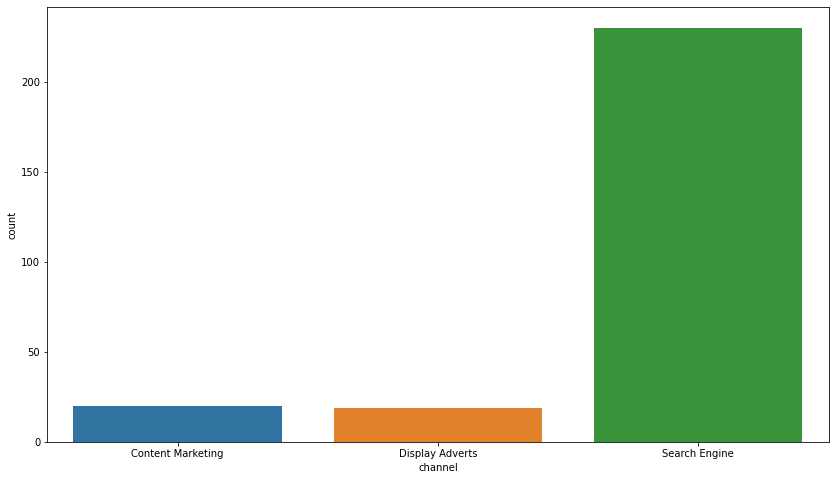

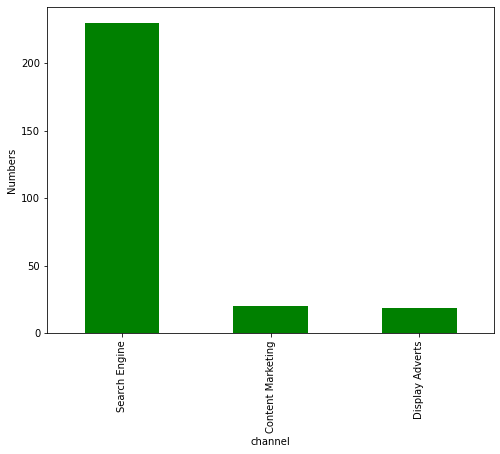

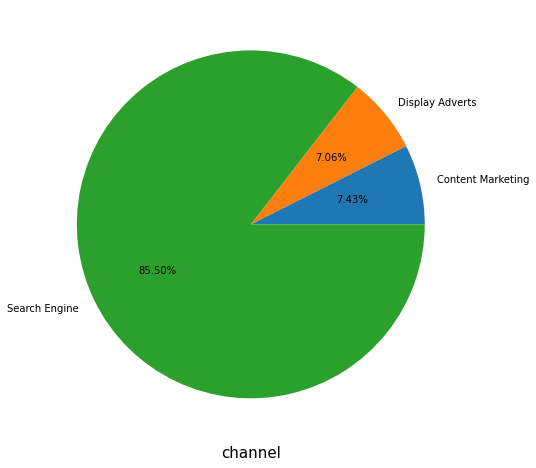

In [32]:
#marketing channels
bar(11)

#### In this dataset, channels used by users

Search Engine        230

Content Marketing     20

Display Adverts       19

#### observation : Mostly users prefer channels like search engine with 85.50%. The Display Averts and content marketing can be improved to cover amore users 

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: re-reaching store, dtype: int64
----------------------------------------------------------------------------------------------------


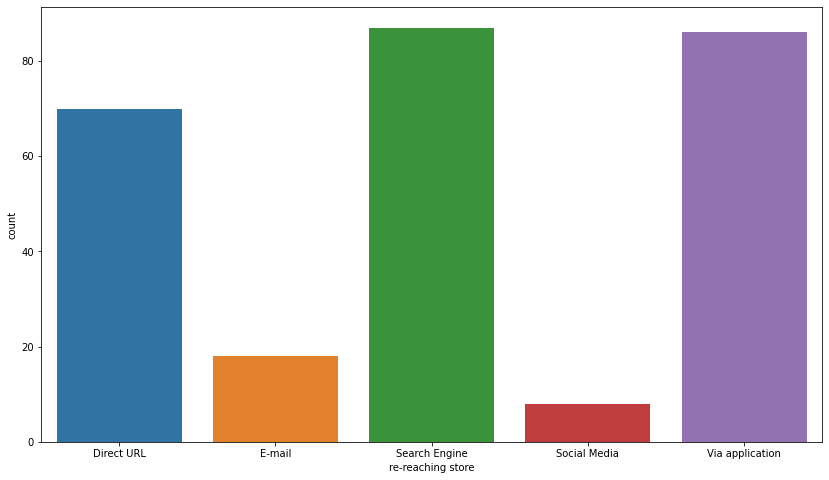

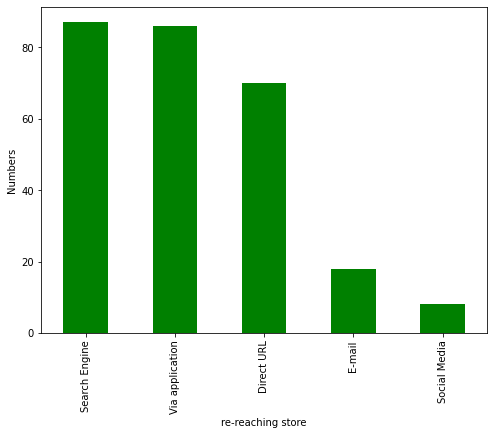

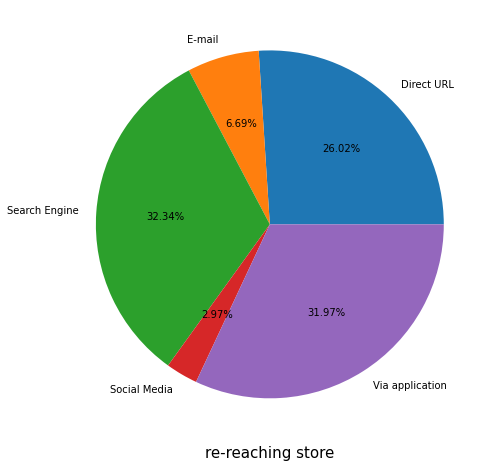

In [33]:
#re reaching store
bar(12)

#### The user again reaches the store through

Search Engine      87

Via application    86

Direct URL         70

E-mail             18

Social Media        8

#### observation : Most of the users are using Search engine 32.34% and via application 31.97%. Direct Url is also used by user which is of 26.02%. The application can be made more easily accessible for retaining customers by paying for search engine.

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: purchase time, dtype: int64
----------------------------------------------------------------------------------------------------


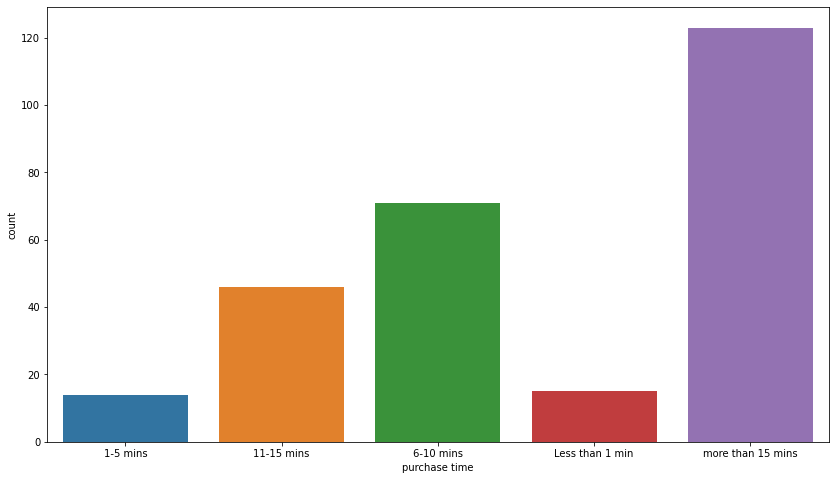

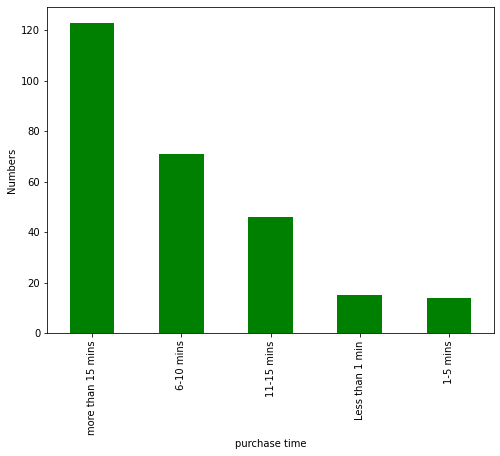

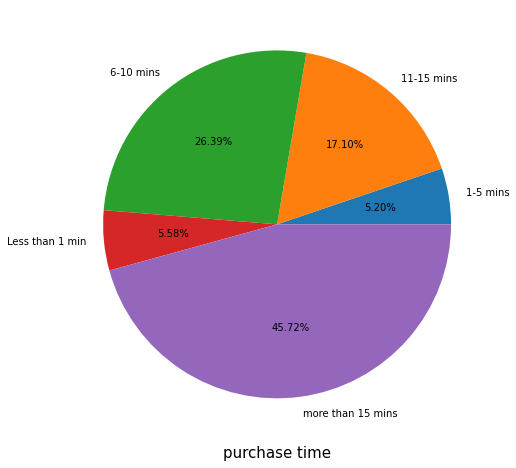

In [34]:
#Purchase time
bar(13)

#### Purchasing time

more than 15 mins    123

6-10 mins             71

11-15 mins            46

Less than 1 min       15

1-5 mins              14

#### observation : we can see that most of the user takes more than 15 minutes to make a purchase. So this can be considered and create an environment for user to make lesser time for purchase. Long time spending in purchase may change their mind.

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: preferred payment, dtype: int64
----------------------------------------------------------------------------------------------------


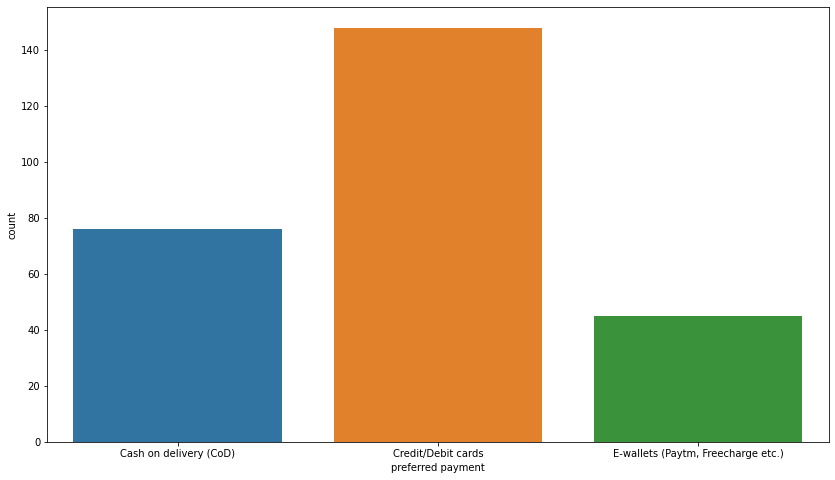

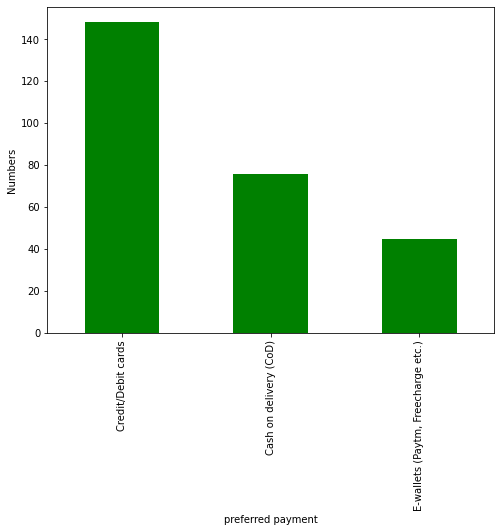

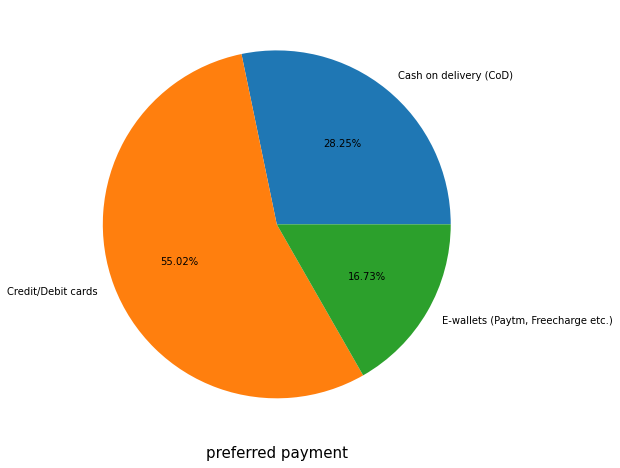

In [35]:
#preferred payment
bar(14)

#### Pyment method used

Credit/Debit cards                    148

Cash on delivery (CoD)                 76

E-wallets (Paytm, Freecharge etc.)     45

##### observation : Most of the users uses payment method as credit/debit card 55.02% and COD 28.25%. So if we can ease the payment for users through credit/debit card to make easy payment that will help in retaining customer . Low transcation error will help user to make more more efficient payment

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: frequency of abandoning at payment stage, dtype: int64
----------------------------------------------------------------------------------------------------


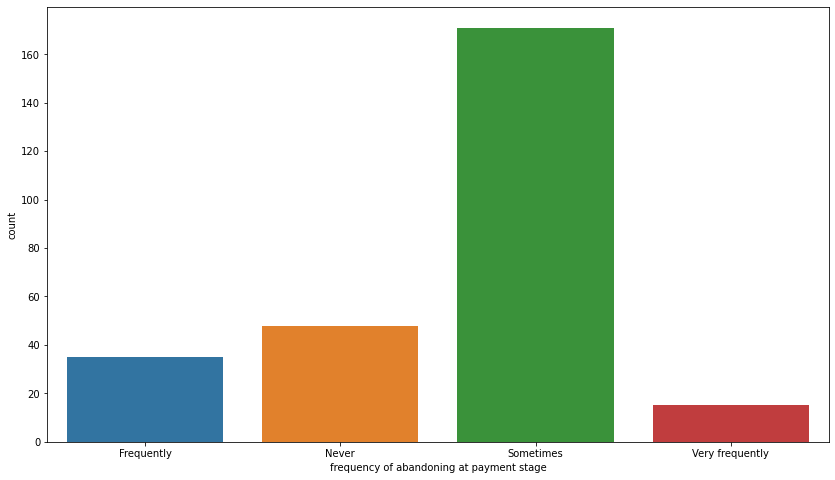

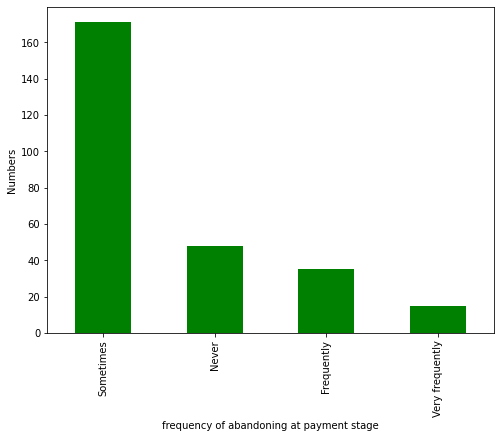

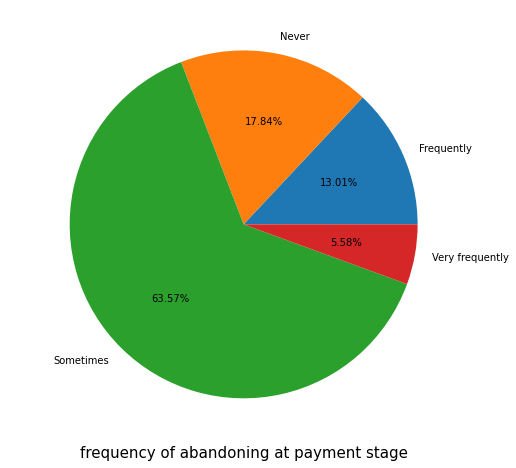

In [36]:
#Frequency of abandoning at payment stage
bar(15)

#### Frequency of abandoning at payment stage :

Sometimes          171

Never               48

Frequently          35

Very frequently     15

#### observation :  We can see that there are possible abadoning transaction which definitely reduces the times of purchase made by the user. So we can analyse the reason and minimize the abandoning of transcation

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: reason for abandoning, dtype: int64
----------------------------------------------------------------------------------------------------


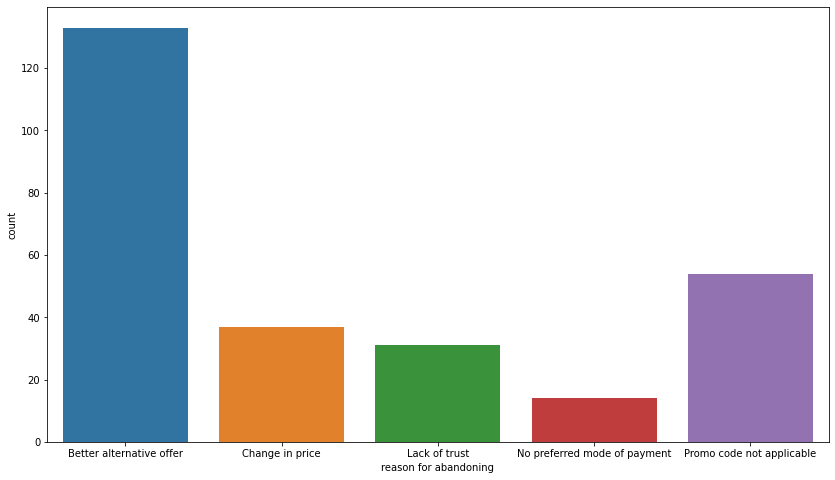

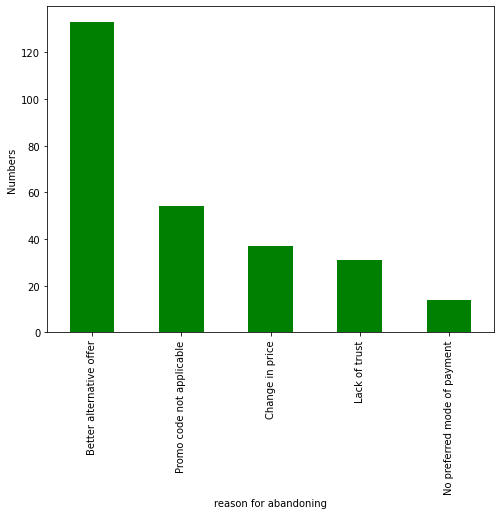

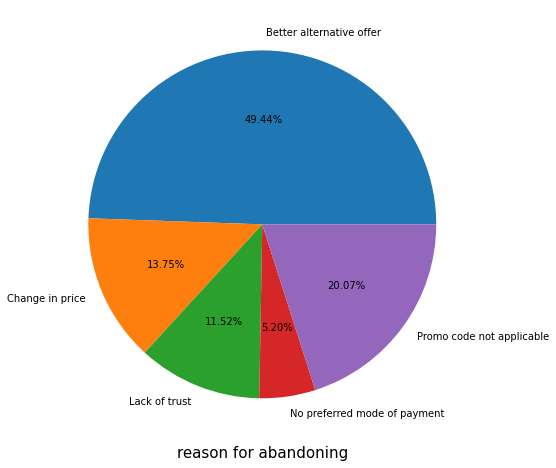

In [37]:
# Reason for abadoning
bar(16)

#### Reason for Abandoning :

Better alternative offer        133

Promo code not applicable        54

Change in price                  37

Lack of trust                    31

No preferred mode of payment     14

#### observation : We can see that there are possible abadoning transaction, the reason is because they find better alternative offer and promo code not applicable. For avoiding this we should be best updated with offers than other websites.

# Now we are going to analyse survey of questions taken among users. The trend on user is happy about different factors in an online retailer.

In [38]:
#col2 - Here we get different factors customers are satisfied with online shopping
#userdefined function for plotting graph for different available data. we can infer from the graph that which has the best weightage for succesfully retaining customer

def bar1(i):
    
    plt.figure(figsize=(14,8))
    print(data[col2[i]].value_counts())
    print("-"*100)
    sns.countplot(data[col2[i]].sort_values(),palette="Set2")
    plt.figure(figsize=(8,6))
    data[col2[i]].value_counts().plot(kind='bar',color='orange')
    plt.xlabel(col2[i])
    plt.ylabel('Numbers')
    plt.figure(figsize=(14,8))
    data.groupby(col2[i]).size().plot(kind='pie', autopct='%.2f%%')
    plt.xlabel(col2[i], size=15)
    plt.ylabel(' ', size=15)

In [39]:
len(col2)

30

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: easy content, dtype: int64
----------------------------------------------------------------------------------------------------


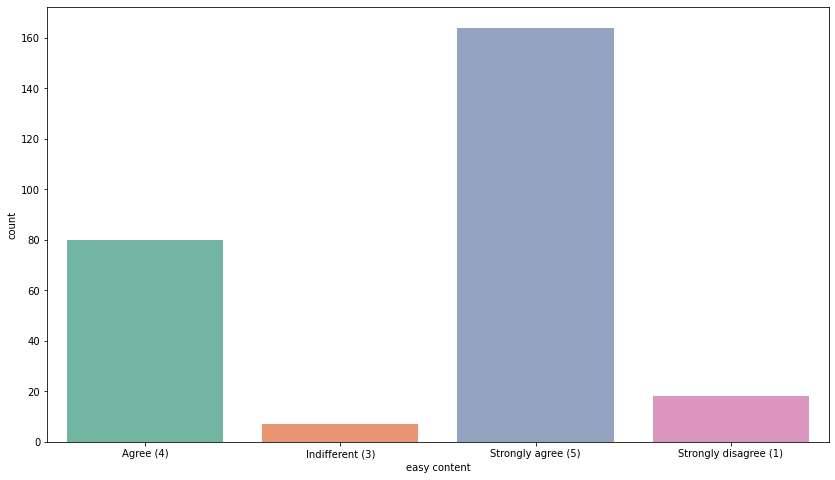

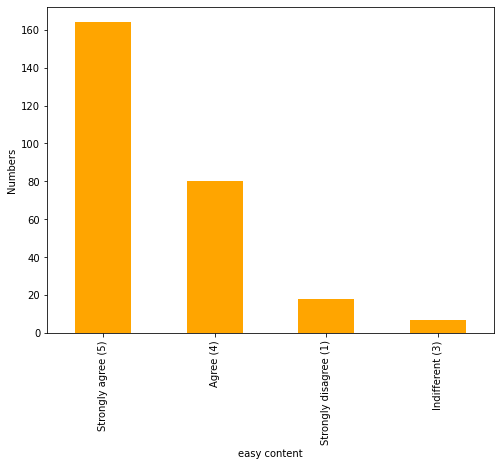

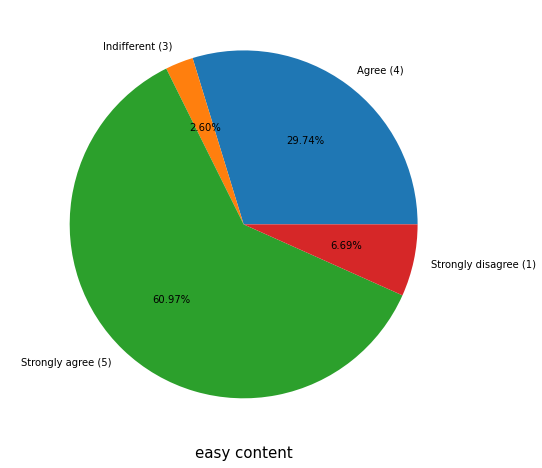

In [40]:
#easy content
bar1(0)

#### observation : Easy content

60.97 % users strongly agree and 29.74% users agree that online retailers have easy content.

only 6.69% of users feel that it doesn't have easy content and 2.60% users feels that it is indifferent

we don't have users strongly disagree

Therefore more number of users feels the content available in online retailer is pretty easy for understanding

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: good suggestion for product comparision, dtype: int64
----------------------------------------------------------------------------------------------------


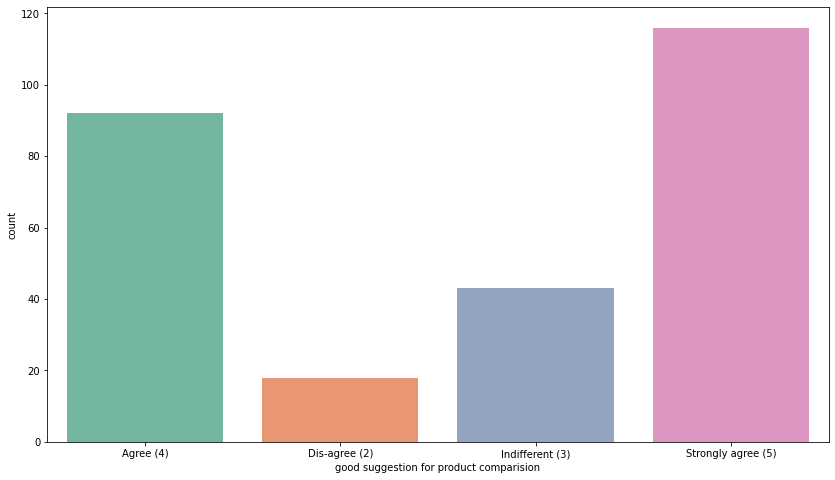

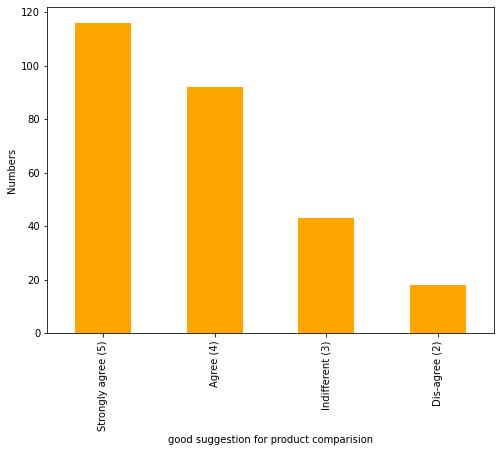

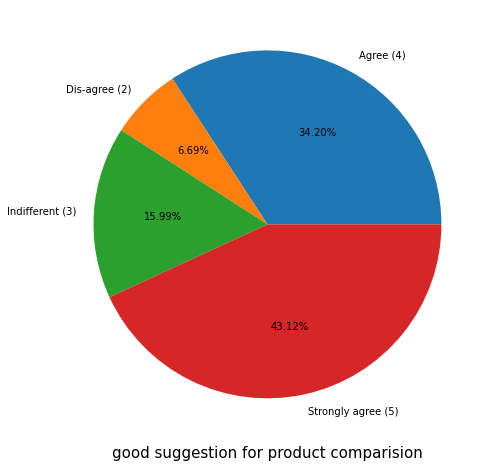

In [41]:
# good suggestion for product comparision
bar1(1)

#### observation : good suggestion for product comparision

43.12% of users strongly agree

34.20% of users agree

6.69% of users disagree 

No one strongly disagrees

good suggestions for product comparision can retain customers


Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: complete information for purchase decision, dtype: int64
----------------------------------------------------------------------------------------------------


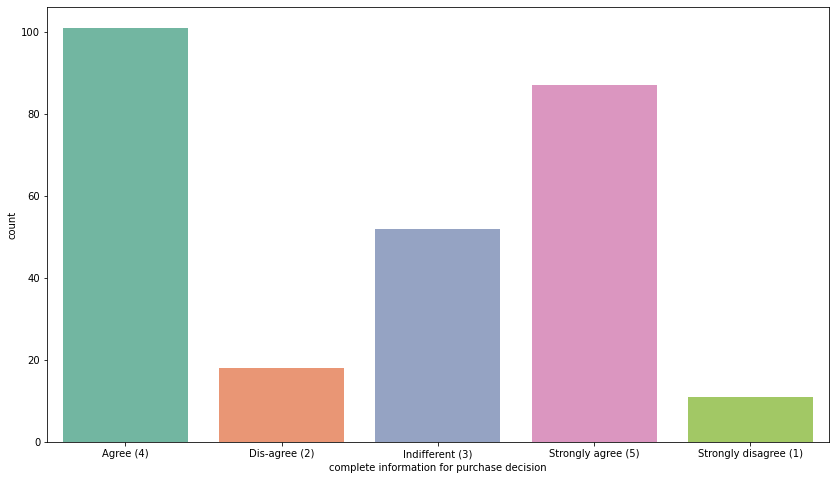

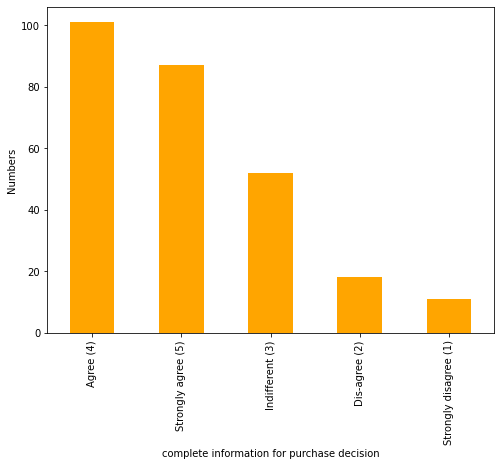

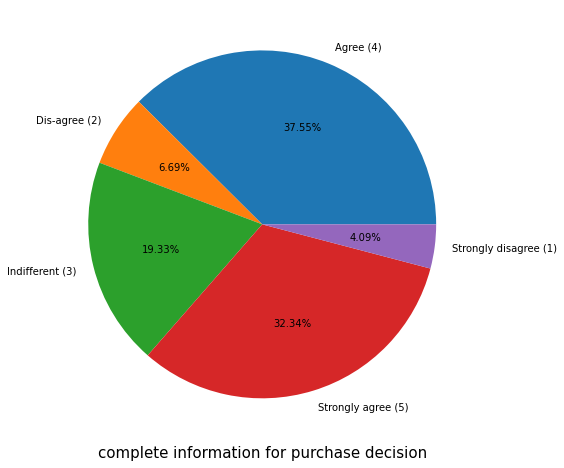

In [42]:
#complete information for purchase decision
bar1(2)

#### observation : complete information for purchase decision

32.34% of users strongly agree

37.55% of users agree

19.33% of users says Indifferent

6.69% of users disagree 

4.04% strongly disagrees

complete information for purchase decision is somewhat needed


Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: clear and relevant information on listed products, dtype: int64
----------------------------------------------------------------------------------------------------


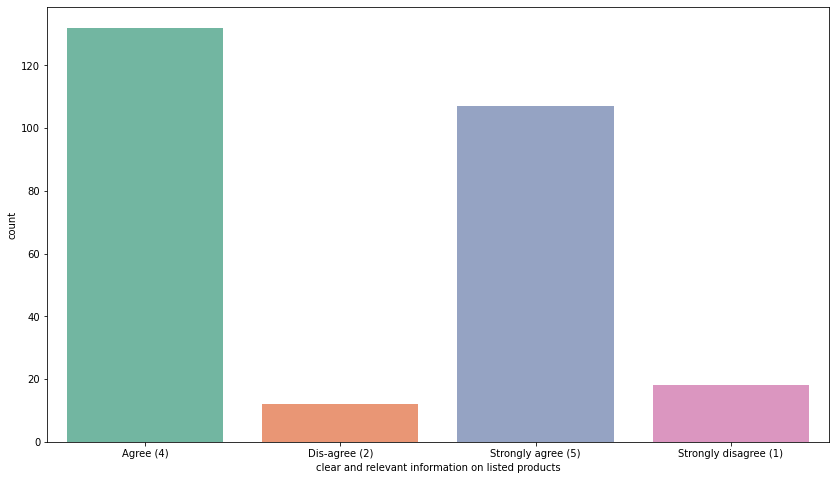

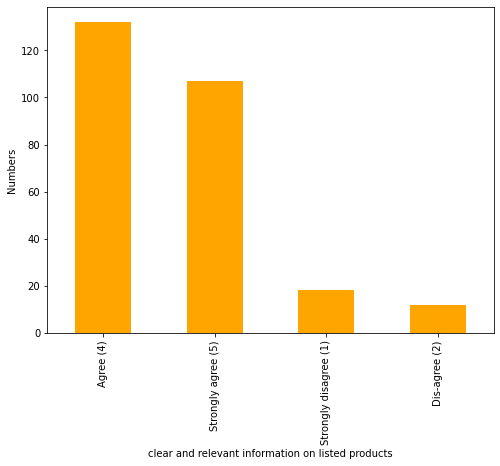

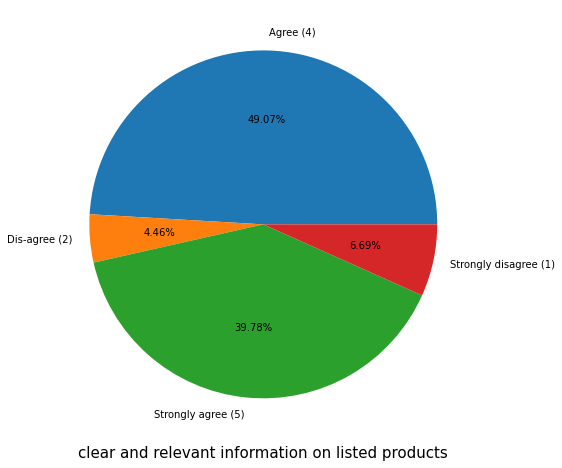

In [43]:
#clear and relevant information on listed products
bar1(3)

#### observation : clear and relevant information on listed products

39.78% of users strongly agree

49.05% of users agree

6.69% of users strongly disagree 

4.46% of users disagree

clear and relevant information on listed products may help


Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: ease of navigation, dtype: int64
----------------------------------------------------------------------------------------------------


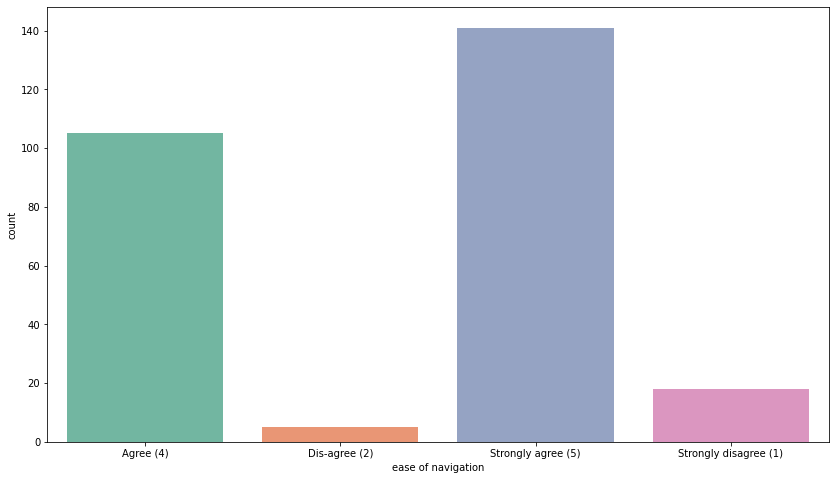

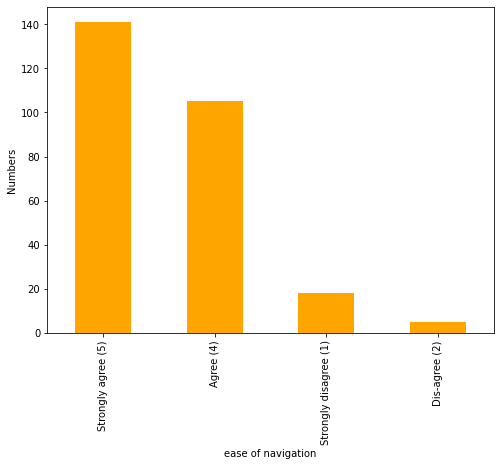

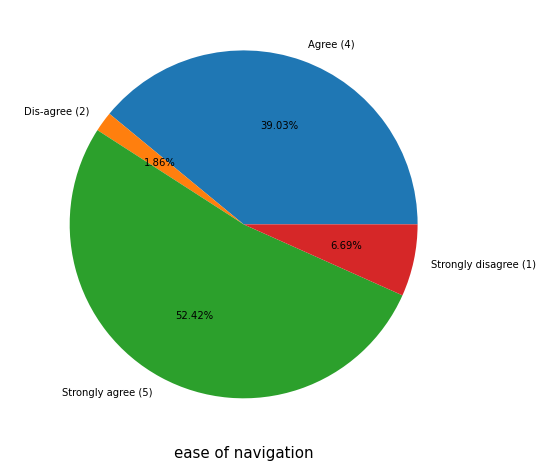

In [44]:
#ease of navigation
bar1(4)

#### observation : ease of navigation

52.42% of users strongly agree

39.03% of users agree

6.69% of users strongly disagree 

1.86% of users disagree

ease of navigation well needed

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: loading and processing speed, dtype: int64
----------------------------------------------------------------------------------------------------


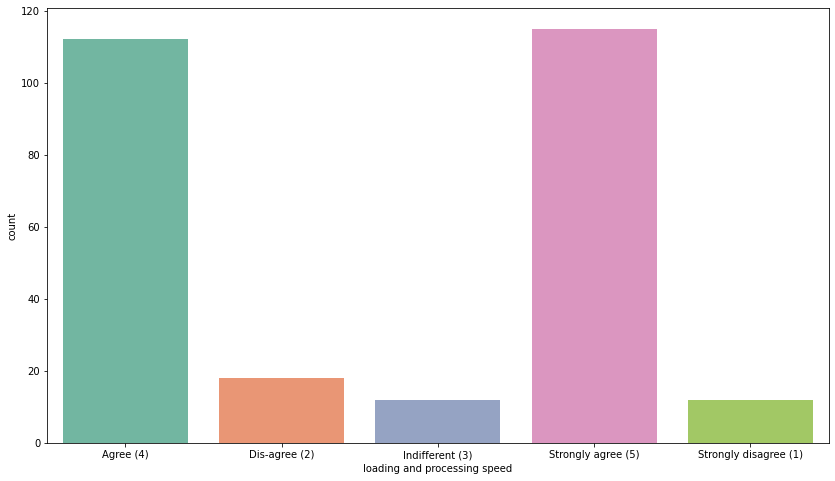

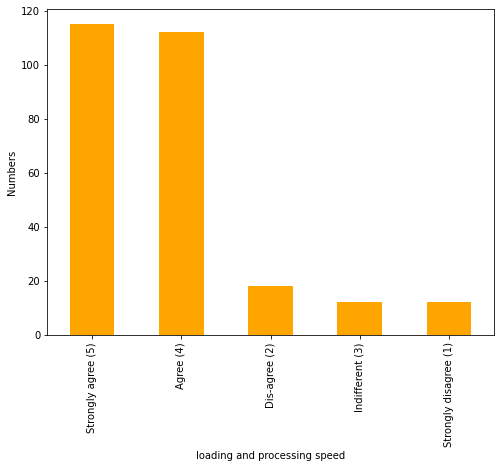

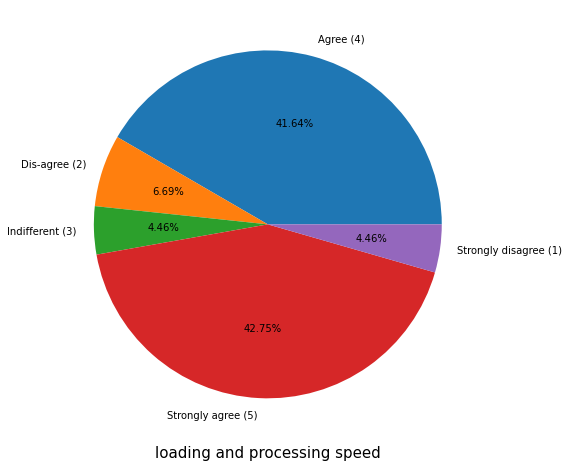

In [45]:
#loading and processing speed
bar1(5)

#### observation : loading and processing speed

42.75% of users strongly agree

41.64% of users agree

6.69% of users  disagree 

4.46% of users strongly disagree

4.46% of users feels Indifferent

loading and processing speed is something user prefers

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: user friendly Interface, dtype: int64
----------------------------------------------------------------------------------------------------


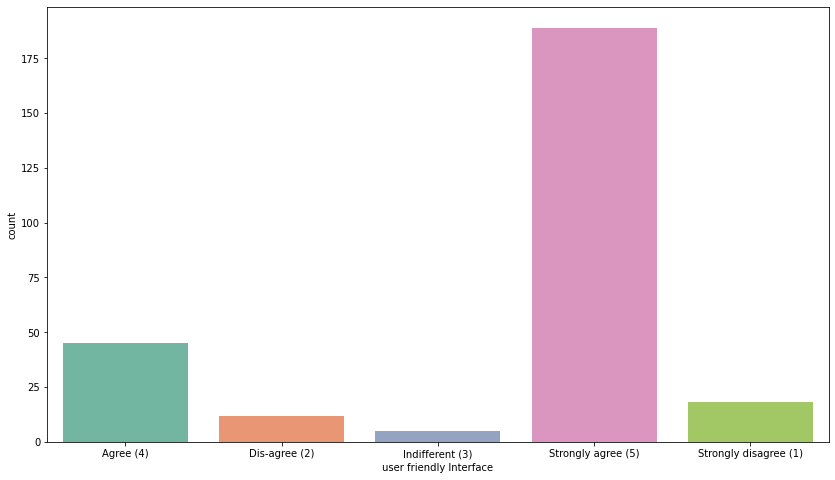

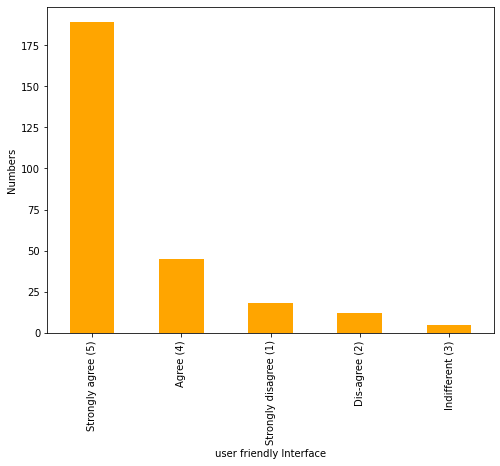

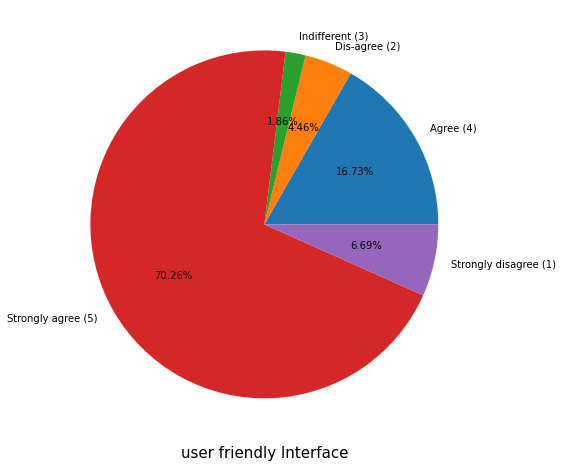

In [46]:
#user friendly Interface
bar1(6)

#### observation : user friendly Interface

70.26% of users strongly agree

16.73% of users agree

6.69% of users strongly disagree 

4.46% of users disagree

1.86% of users feels Indifferent

#### user friendly Interface is needed

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: convenient Payment methods, dtype: int64
----------------------------------------------------------------------------------------------------


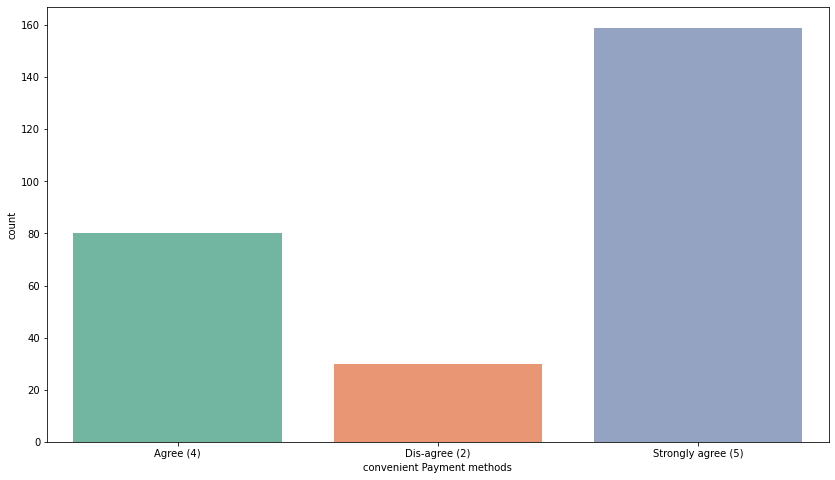

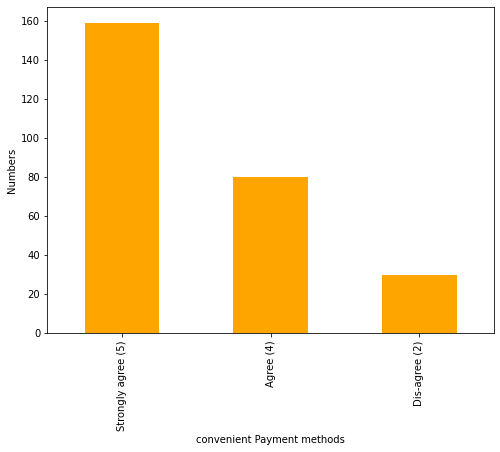

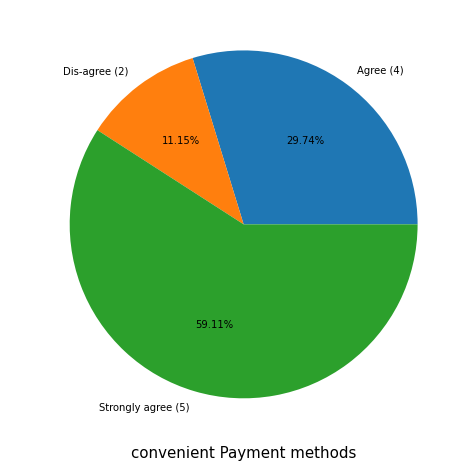

In [47]:
#convenient Payment methods
bar1(7)

#### observation : convenient Payment methods

59.11% of users strongly agree

29.74% of users agree

11.15% of users  disagree 

#### convenient Payment methods is an important factor to be looked into

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: trust on transcation in time, dtype: int64
----------------------------------------------------------------------------------------------------


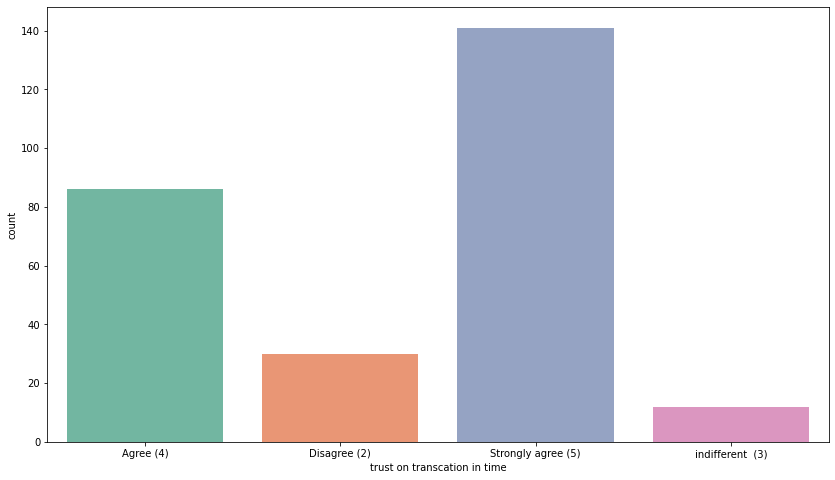

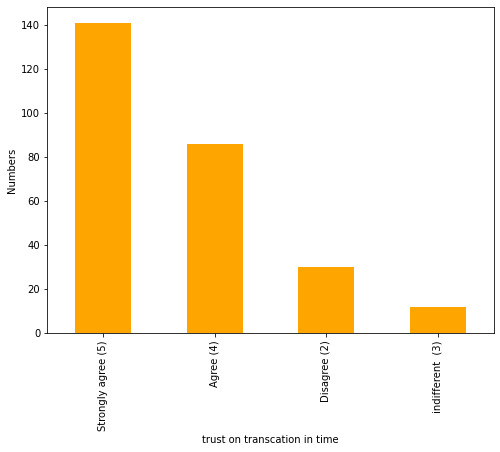

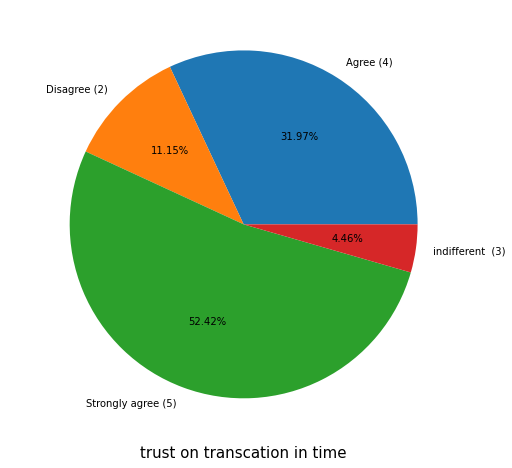

In [48]:
#trust on transcation in time
bar1(8)

#### observation : trust on transcation in time

52.42% of users strongly agree

31.97% of users agree

11.15% of users  disagree 

4.46% of users feels Indifferent

#### trust on transcation in time can be considered

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: empathy towards the customers, dtype: int64
----------------------------------------------------------------------------------------------------


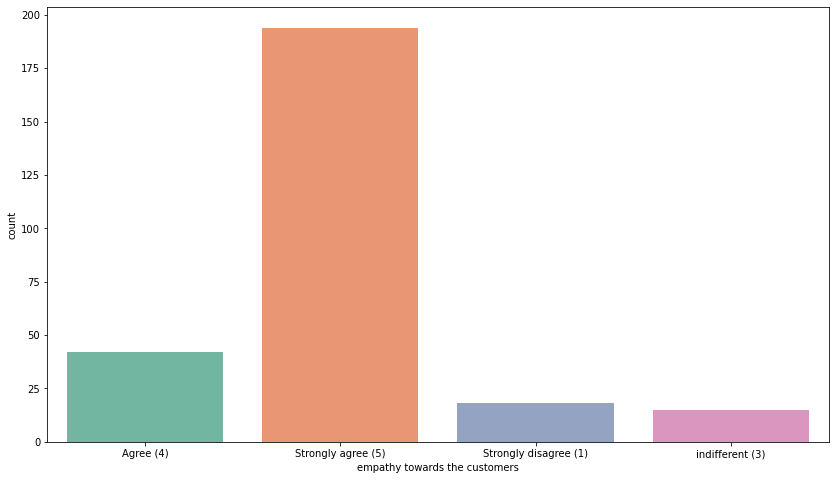

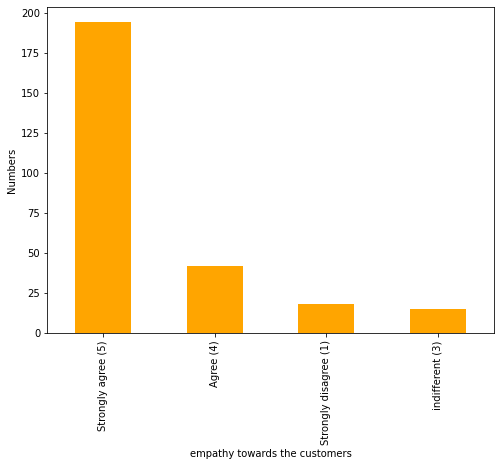

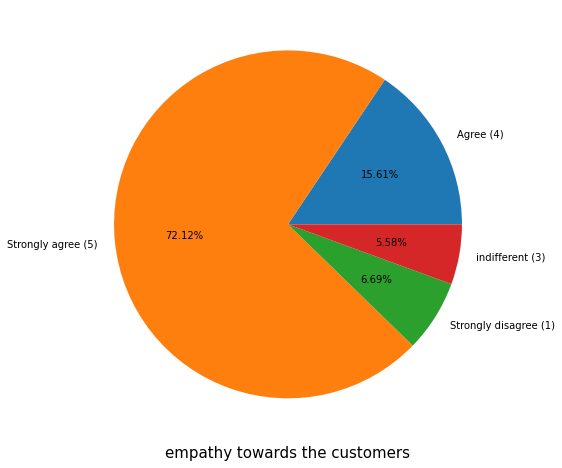

In [49]:
#empathy towards the customers
bar1(9)

#### observation : empathy towards the customers

72.12% of users strongly agree

15.61% of users agree

6.69% of users  strongly disagree 

5.58% of users feels Indifferent

#### empathy towards the customers is considered

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: privacy guarantee, dtype: int64
----------------------------------------------------------------------------------------------------


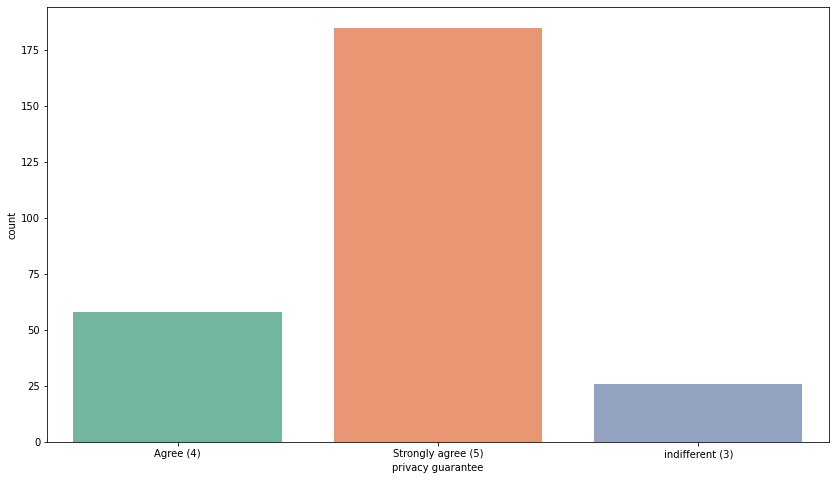

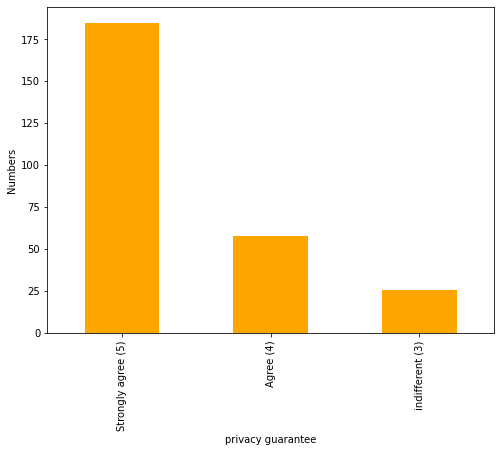

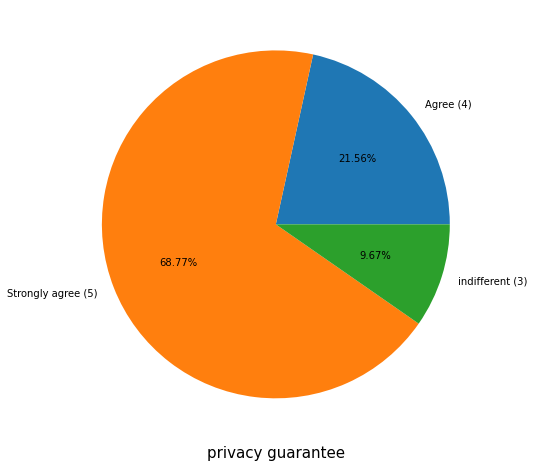

In [50]:
#Survey on privacy guarantee
bar1(10)

#### observation : privacy guarantee

68.77% of users strongly agree

21.56% of users agree

9.67% of users  disagree 

#### privacy guarantee should be considered

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: availability of efficient communication channels , dtype: int64
----------------------------------------------------------------------------------------------------


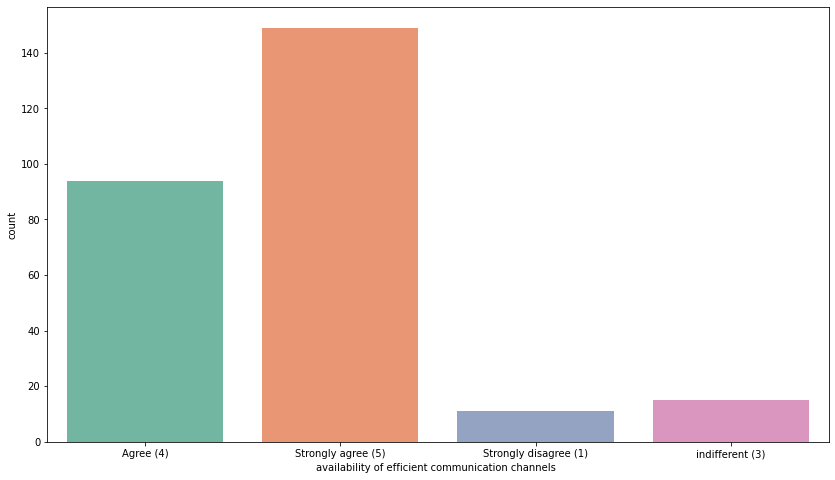

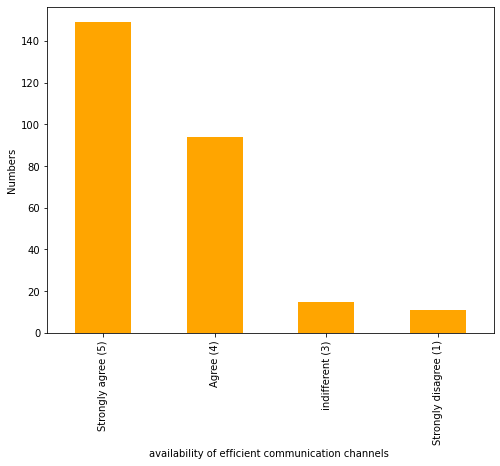

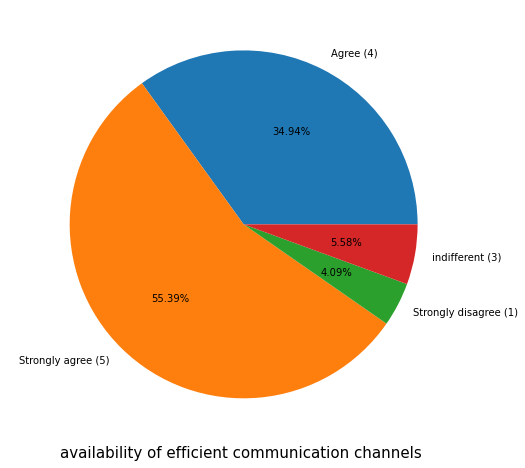

In [51]:
#availability of efficient communication channels
bar1(11)

#### observation : availability of efficient communication channels

55.39% of users strongly agree

34.94% of users agree

4.09% of users strongly disagree 

None of users disagree

None of users feels Indifferent

#### availability of efficient communication channels can be considered

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: gives monetary benefit and discounts, dtype: int64
----------------------------------------------------------------------------------------------------


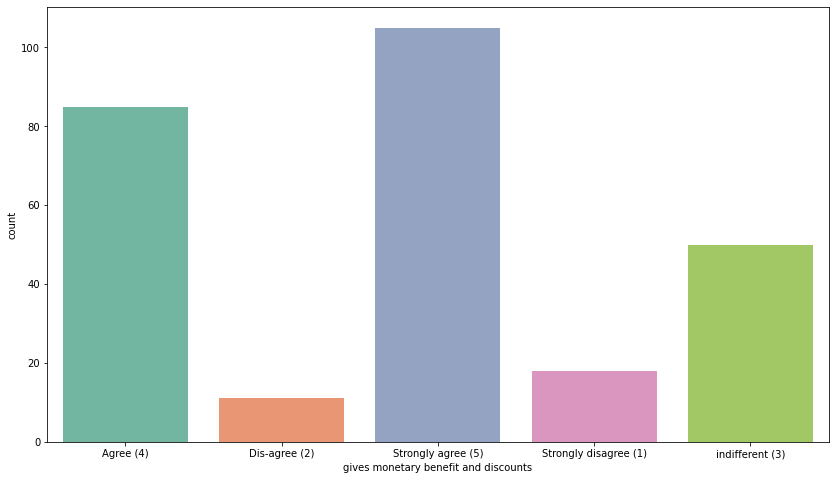

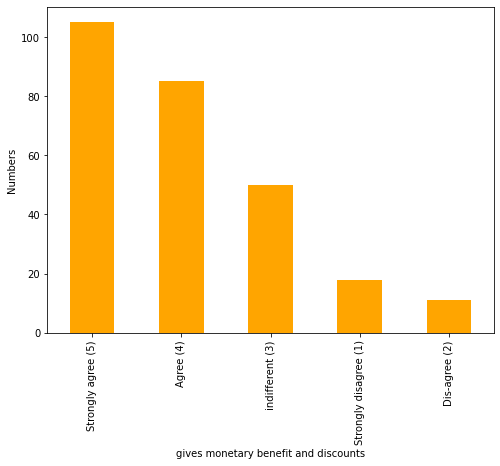

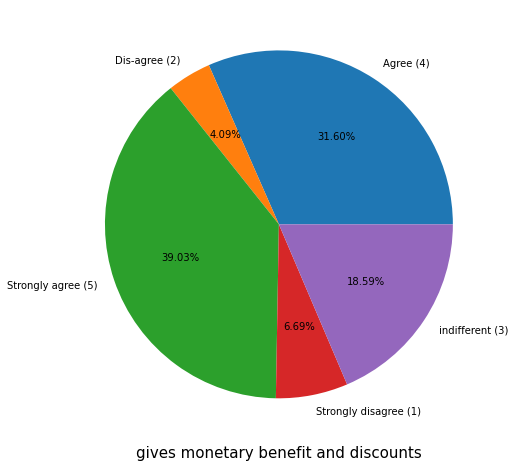

In [52]:
#gives monetary benefit and discounts
bar1(12)

#### observation : gives monetary benefit and discounts

39.03% of users strongly agree

31.60% of users agree

6.69% of users strongly disagree 

4.09% of users disagree

18.59% of users feels Indifferent

#### gives monetary benefit and discounts : May be needed a improvement here

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: enjoyment is derived, dtype: int64
----------------------------------------------------------------------------------------------------


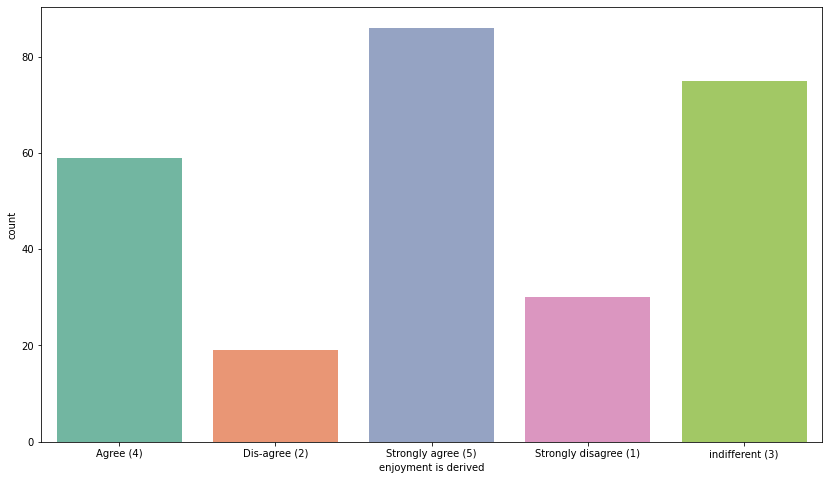

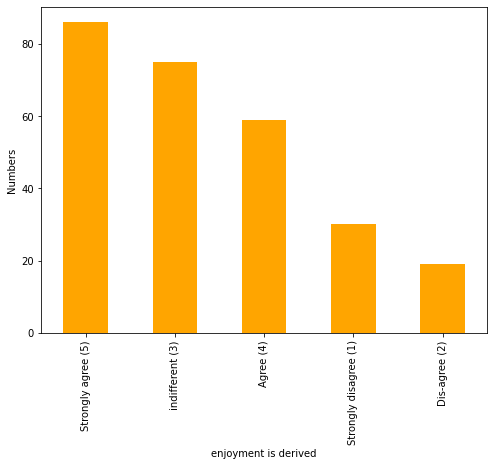

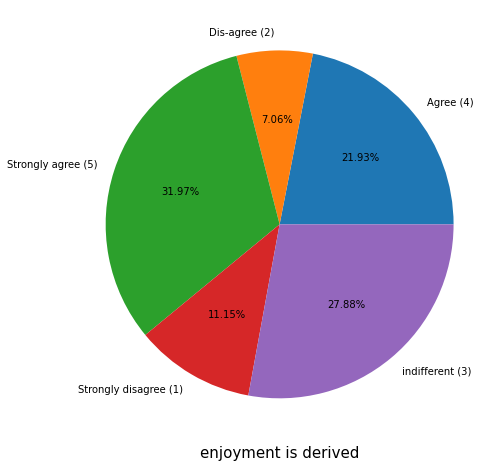

In [53]:
#enjoyment is derived
bar1(13)

#### observation : enjoyment is derived

31.97% of users strongly agree

21.93% of users agree

11.15% of users strongly disagree 

7.06% of users disagree

27.88% of users feels Indifferent

#### enjoyment is derived : not much impact

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: convenient and flexible, dtype: int64
----------------------------------------------------------------------------------------------------


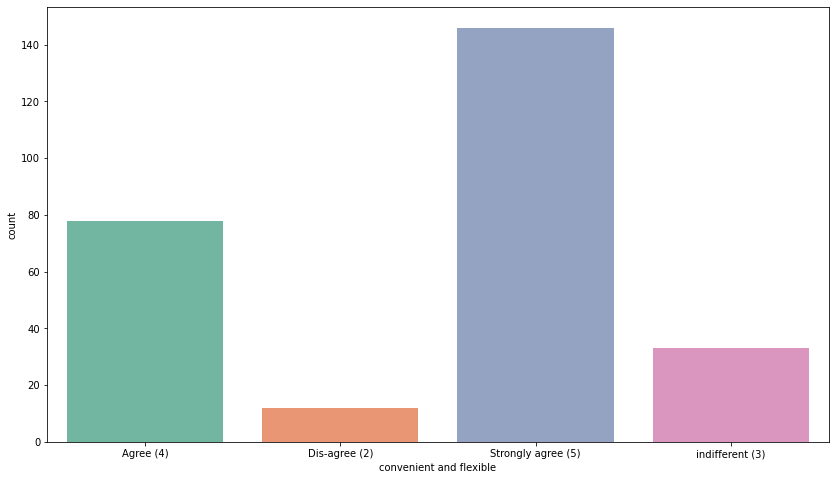

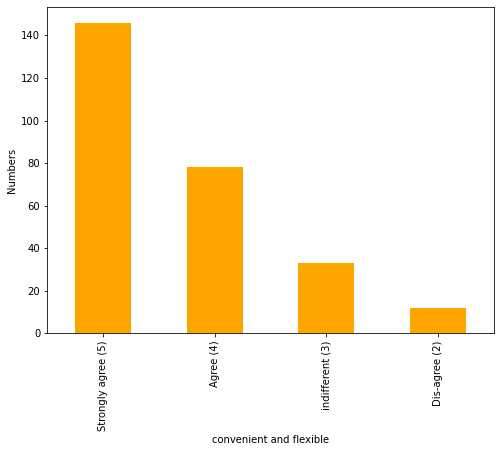

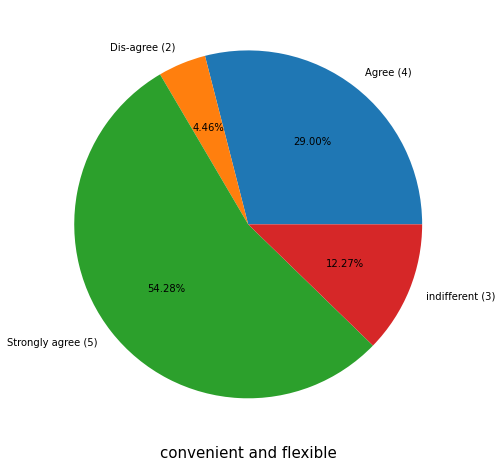

In [54]:
#convenient and flexible
bar1(14)

#### observation : convenient and flexible

54.28% of users strongly agree

29.00% of users agree

4.46% of users disagree

12.27% of users feels Indifferent

convenient and flexible : considered

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: return and replacement policy important for purchase decision, dtype: int64
----------------------------------------------------------------------------------------------------


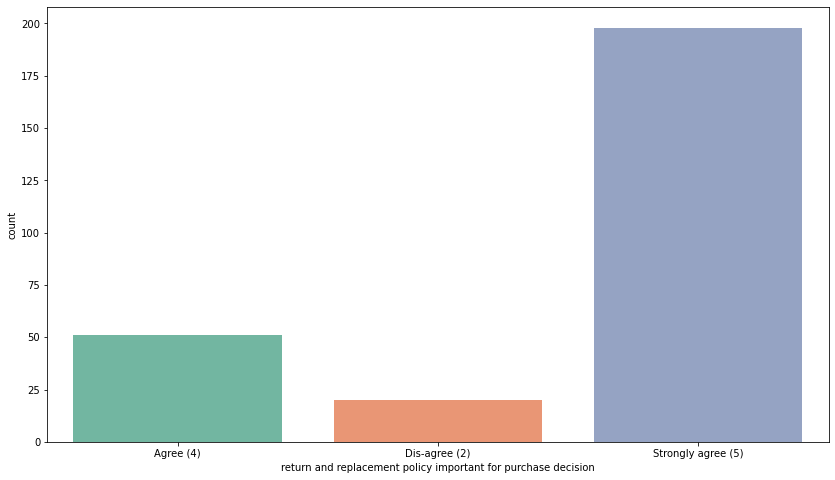

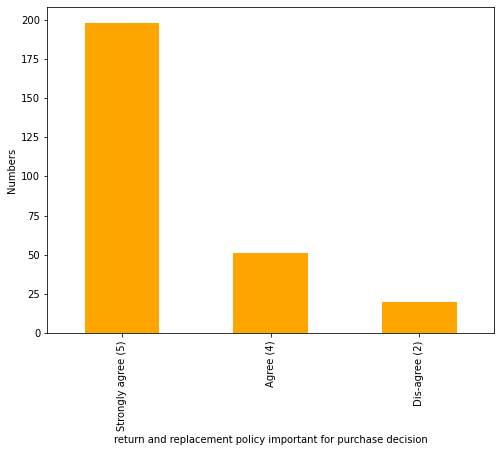

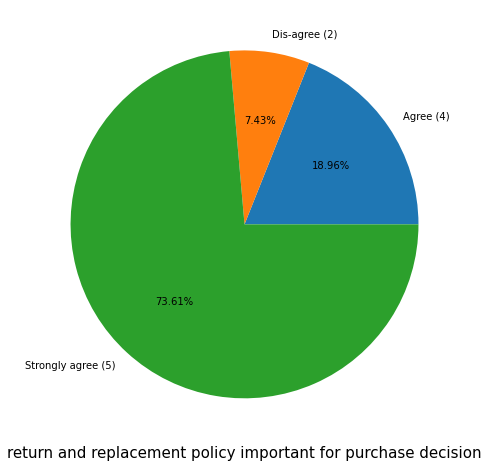

In [55]:
#return and replacement policy important for purchase decision
bar1(15)

#### observation : return and replacement policy important for purchase decision

73.61% of users strongly agree

18.96% of users agree

7.43% of users  disagree 

return and replacement policy important for purchase decision : Should be considered

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: gaining access to loyalty programs is benefit, dtype: int64
----------------------------------------------------------------------------------------------------


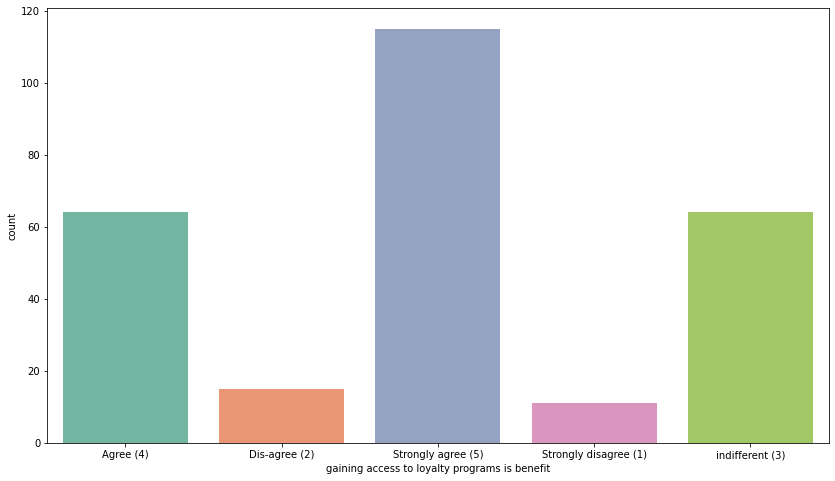

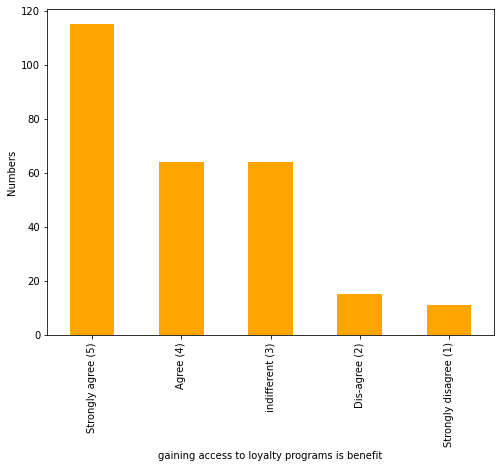

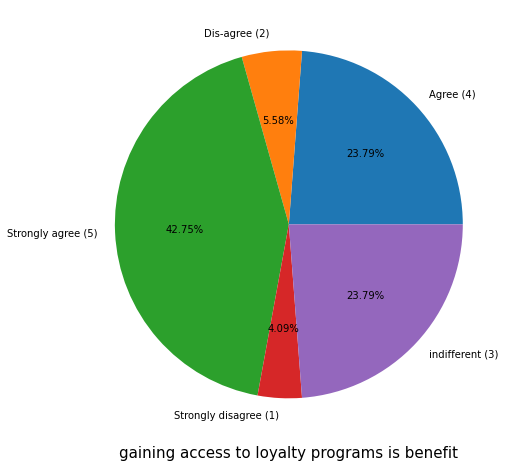

In [56]:
#gaining access to loyalty programs is benefit
bar1(16)

#### observation : gaining access to loyalty programs is benefit

42.75% of users strongly agree

23.79% of users agree

5.58% of users  disagree 

4.09% of users disagree

23.79% of users feels Indifferent

gaining access to loyalty programs is benefit : Should be considered

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: displaying quality Information improves satisfaction, dtype: int64
----------------------------------------------------------------------------------------------------


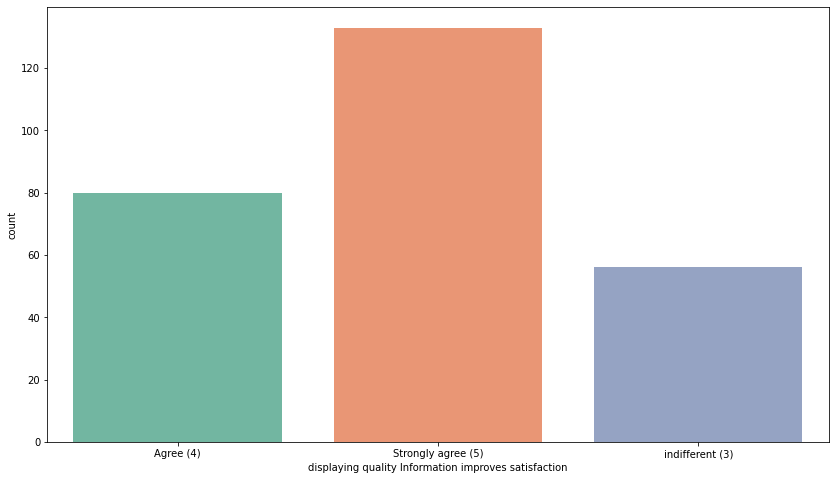

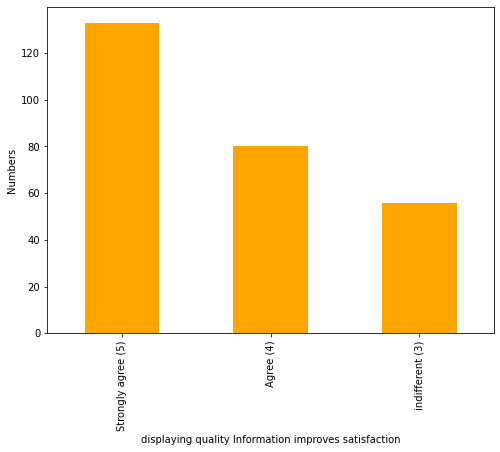

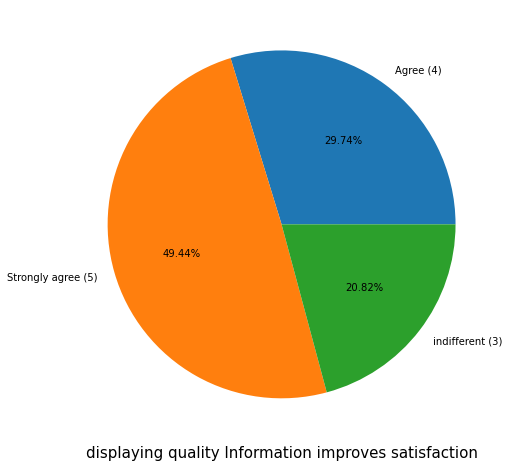

In [57]:
#displaying quality Information improves satisfaction
bar1(17)

#### observation : displaying quality Information improves satisfaction

49.44% of users strongly agree

29.74% of users agree


20.82% of users feels Indifferent

displaying quality Information improves satisfaction : Should be considered

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: good quality website or application is must, dtype: int64
----------------------------------------------------------------------------------------------------


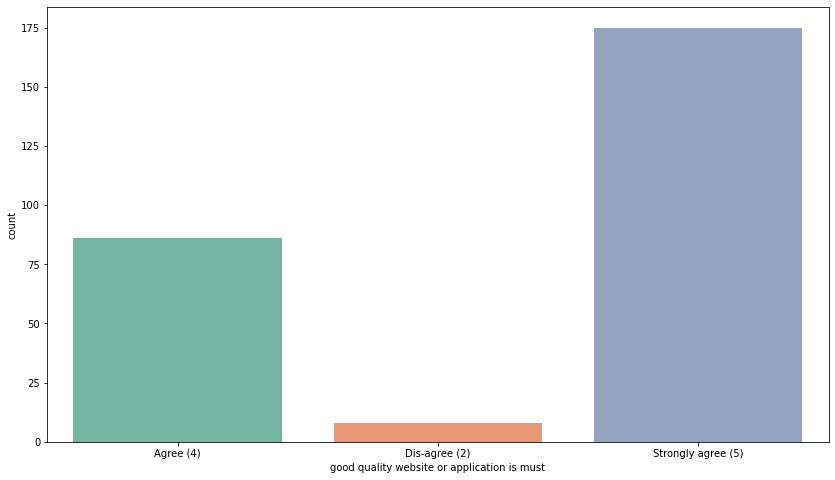

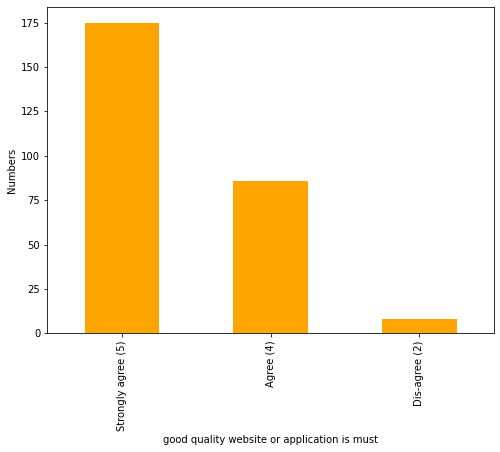

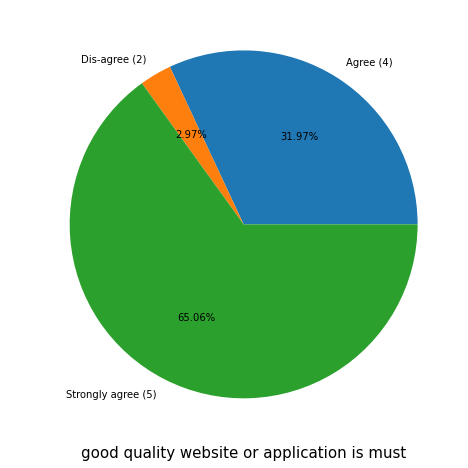

In [58]:
#good quality website or application is must
bar1(18)

#### observation : good quality website or application is must

65.06% of users strongly agree

31.97% of users agree

2.97% of users  disagree 

good quality website or application is must : Much needed for retaining customer

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: net Benefit derived gives users satisfaction, dtype: int64
----------------------------------------------------------------------------------------------------


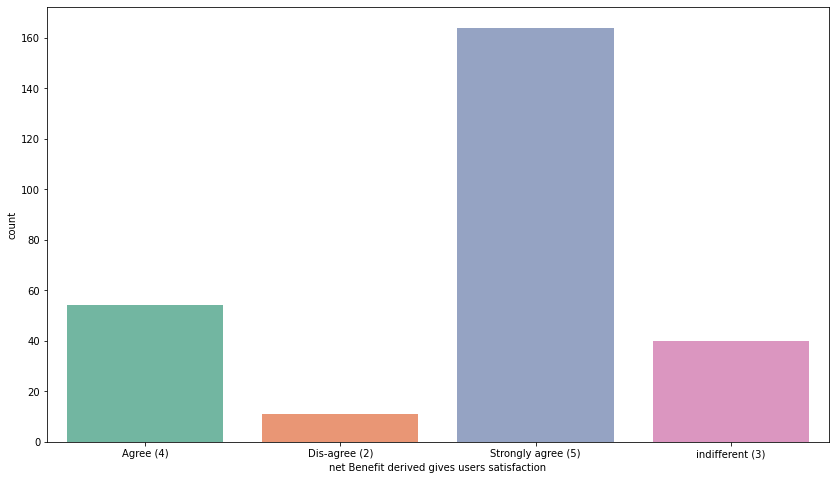

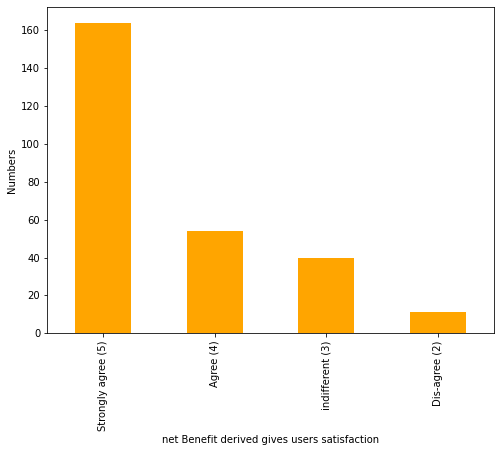

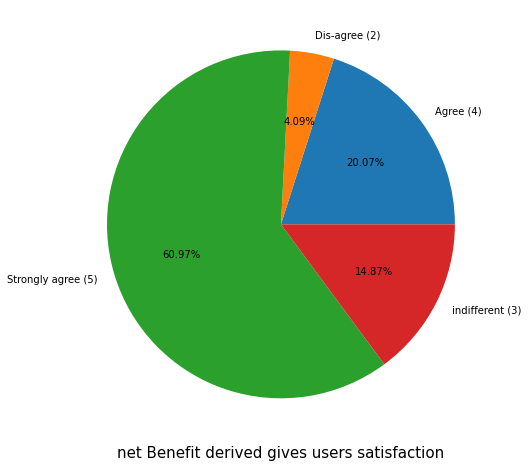

In [59]:
#net Benefit derived gives users satisfaction
bar1(19)

#### observation : net Benefit derived gives users satisfaction

60.97% of users strongly agree

20.07% of users agree

4.09% of users  disagree 

14.87% of users feels Indifferent

net Benefit derived gives users satisfaction : Should be considered

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: User satisfaction cannot exist without trust, dtype: int64
----------------------------------------------------------------------------------------------------


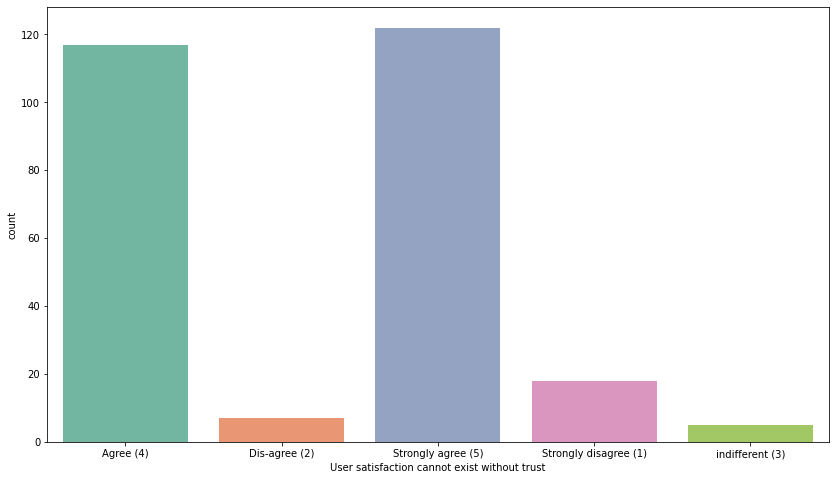

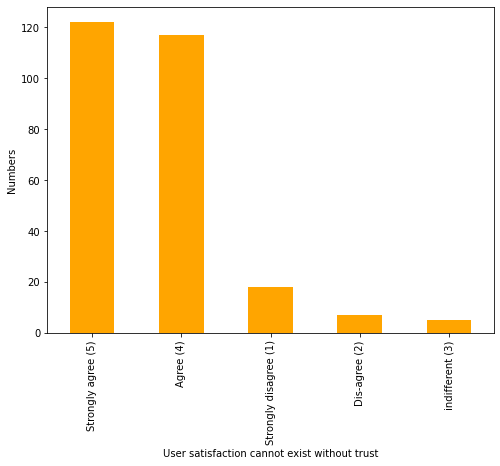

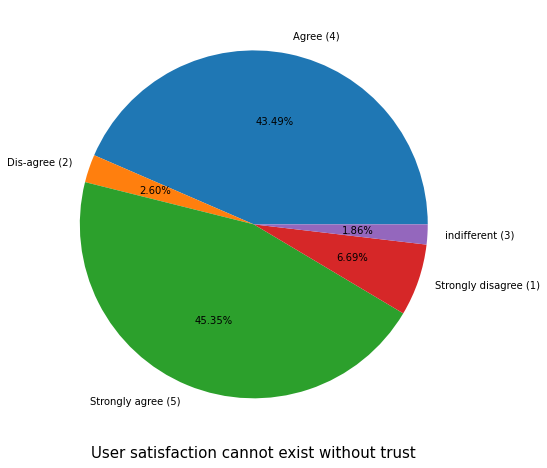

In [60]:
#User satisfaction cannot exist without trust
bar1(20)

#### observation : User satisfaction cannot exist without trust

45.35% of users strongly agree

43.49% of users agree

6.69% of users strongly disagree 

2.60% of users disagree

1.86% of users feels Indifferent

User satisfaction cannot exist without trust: Should be considered

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: offering a wide variety of listed product in several category, dtype: int64
----------------------------------------------------------------------------------------------------


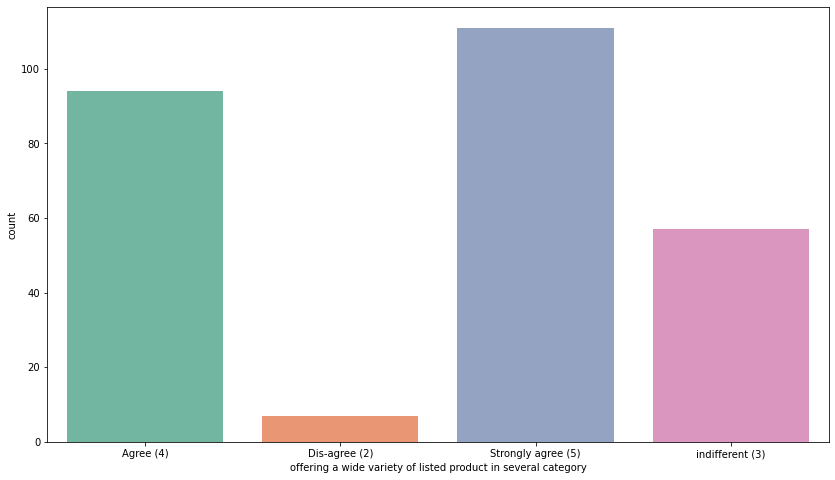

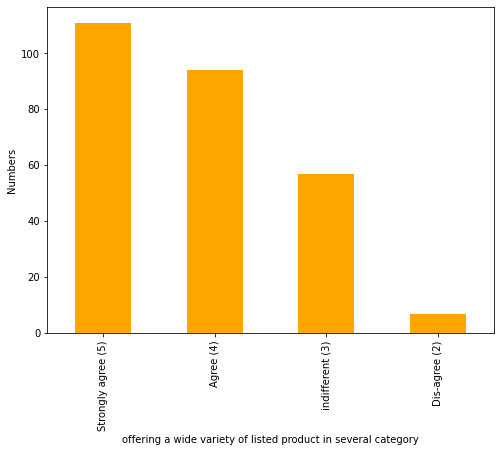

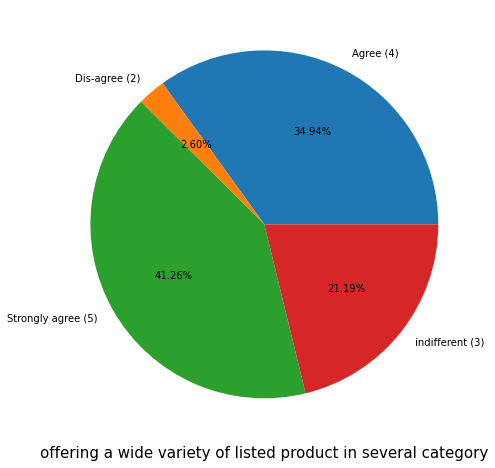

In [61]:
#offering a wide variety of listed product in several category
bar1(21)

#### observation : offering a wide variety of listed product in several category

41.26% of users strongly agree

34.94% of users agree

2.60% of users  disagree 

21.90% of users feels Indifferent

offering a wide variety of listed product in several category: Should be considered

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: provision of complete and relevant product information, dtype: int64
----------------------------------------------------------------------------------------------------


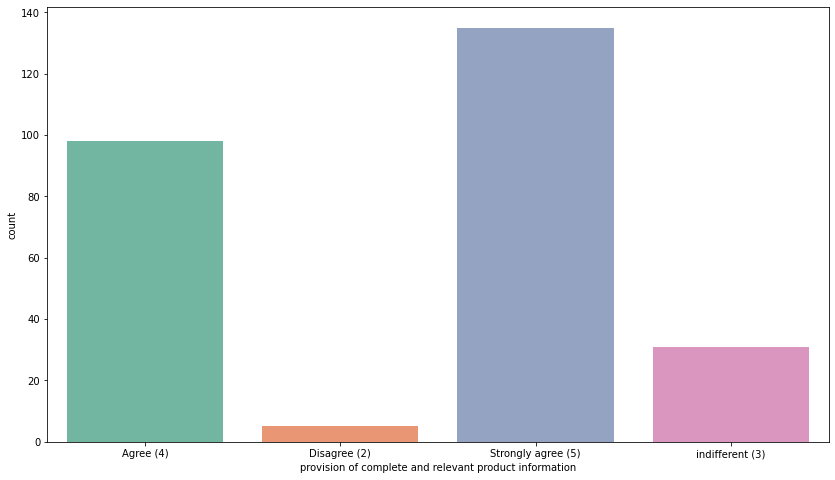

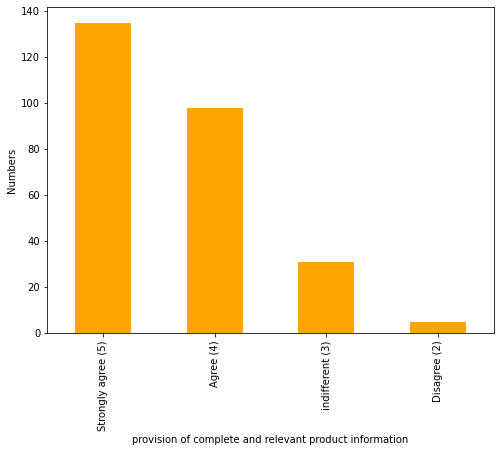

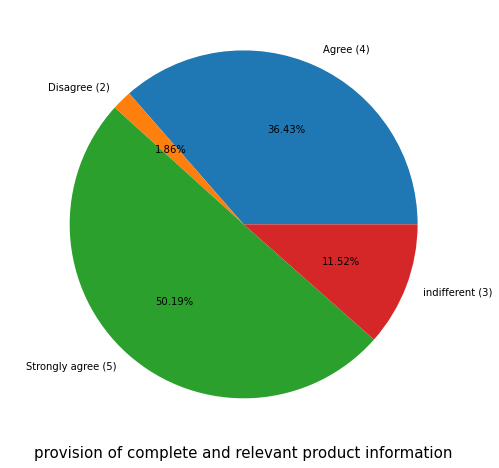

In [62]:
#provision of complete and relevant product information
bar1(22)

#### observation : provision of complete and relevant product information
50.19% of users strongly agree

36.43% of users agree

1.86% of users disagree

11.52% of users feels Indifferent

provision of complete and relevant product information: Should be considered

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: monetary savings, dtype: int64
----------------------------------------------------------------------------------------------------


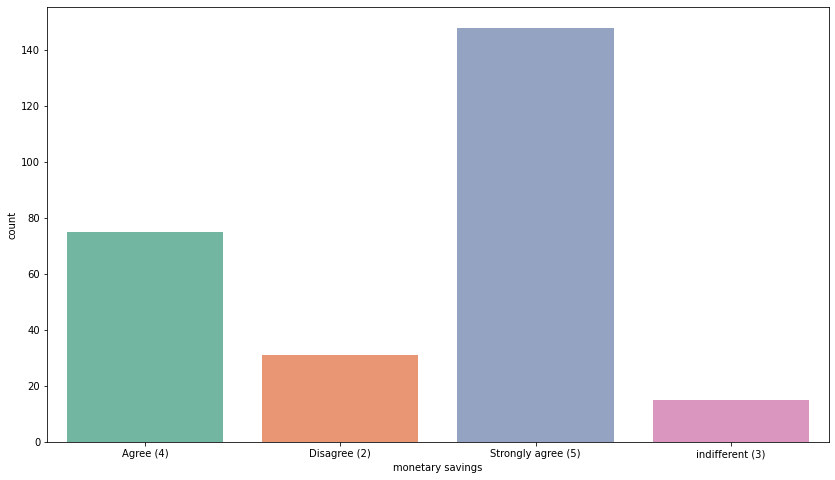

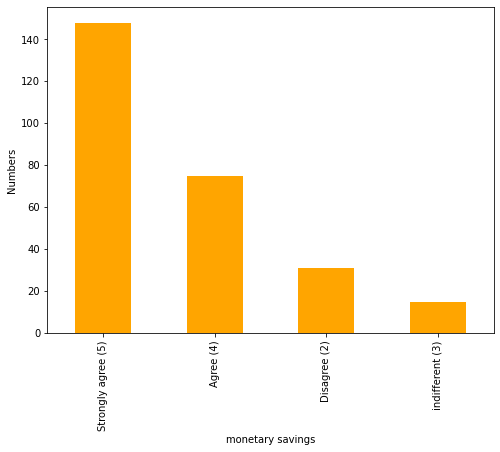

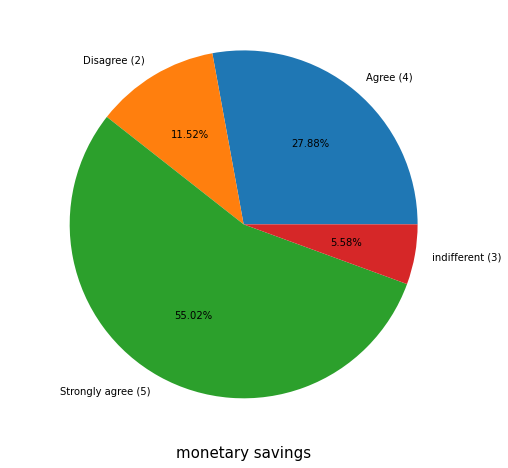

In [63]:
#monetary savings
bar1(23)

#### observation : monetary savings

55.02% of users strongly agree

27.88% of users agree

11.52% of users  disagree 

5.58%  users feels Indifferent

monetary savings: Should be considered

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: convenience of patronizing the online retailer, dtype: int64
----------------------------------------------------------------------------------------------------


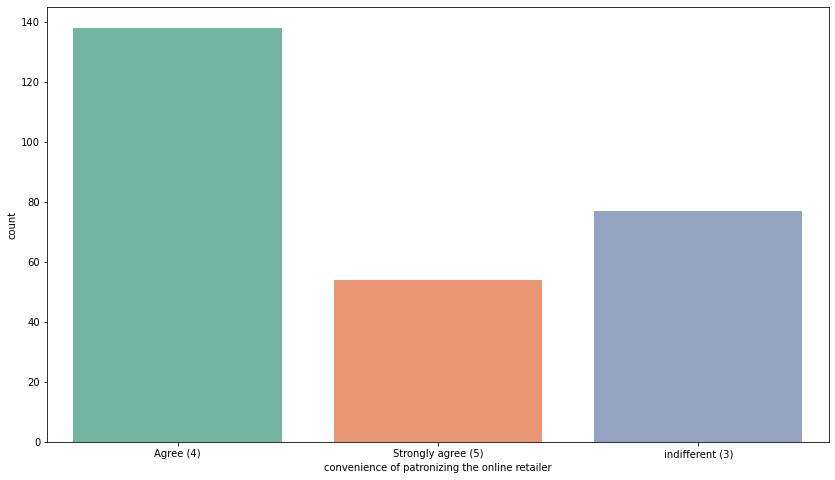

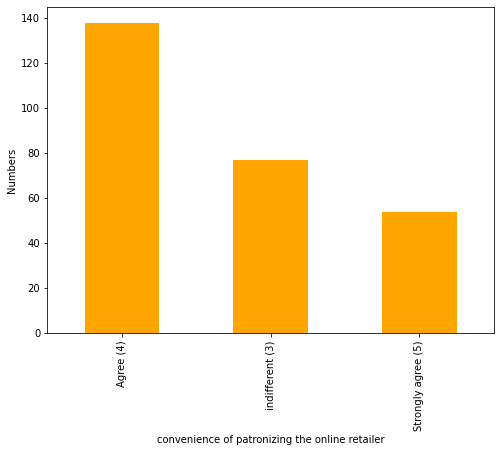

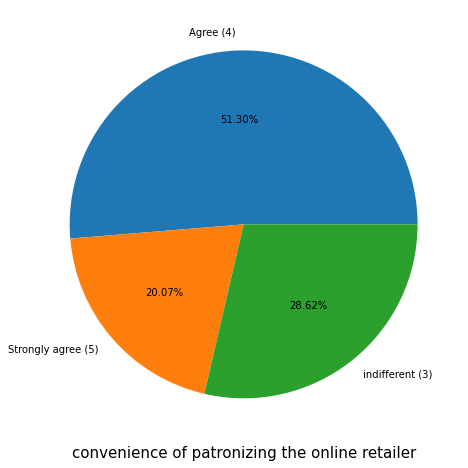

In [64]:
#convenience of patronizing the online retailer
bar1(24)

#### observation :convenience of patronizing the online retailer

20.07% of users strongly agree

51.30% of users agree

28.62% of users feels Indifferent

convenience of patronizing the online retailer: Should be considered. No user disagrees

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: shopping on the website gives you the sense of adventure, dtype: int64
----------------------------------------------------------------------------------------------------


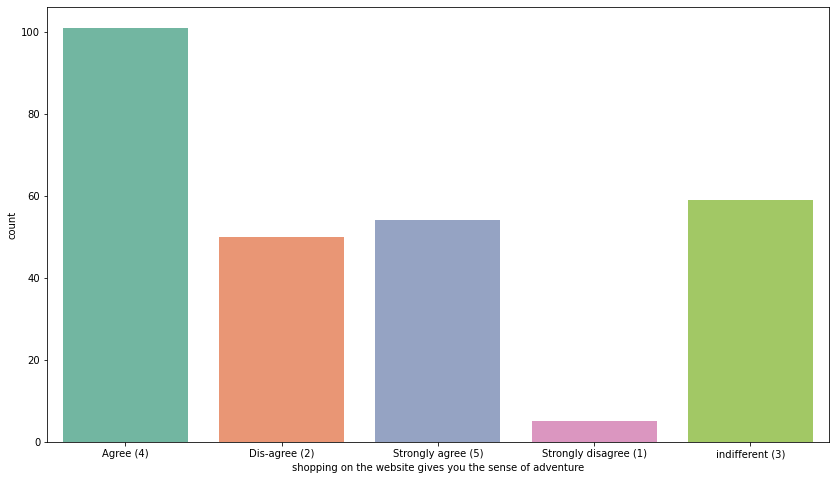

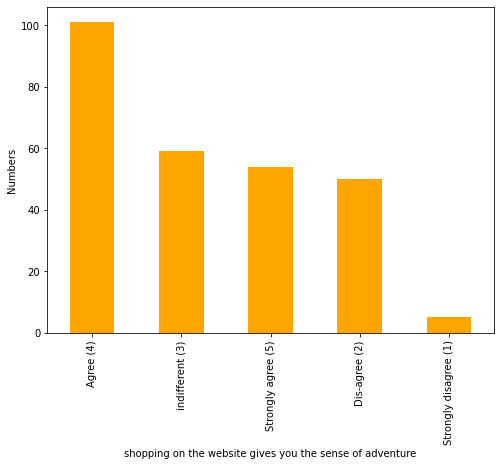

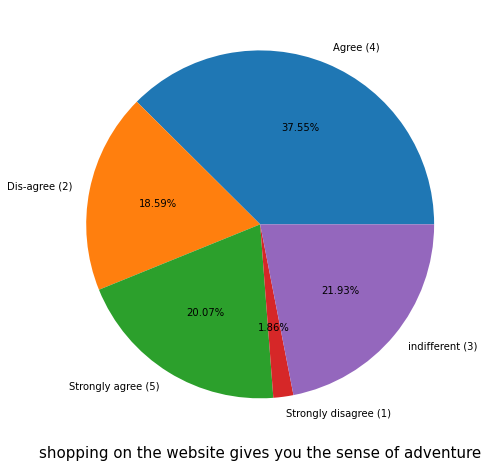

In [65]:
#shopping on the website gives you the sense of adventure
bar1(25)

#### observation :shopping on the website gives you the sense of adventure

20.07% of users strongly agree

37.55% of users agree

18.59% of users  disagree 

1.86% of users strongly disagree

21.93% of users feels Indifferent

shopping on the website gives you the sense of adventure: Should be considered

indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strongly disagree (1)     33
Dis-agree (2)             29
Name: shopping on your preferred e-tailer enhances your social status, dtype: int64
----------------------------------------------------------------------------------------------------


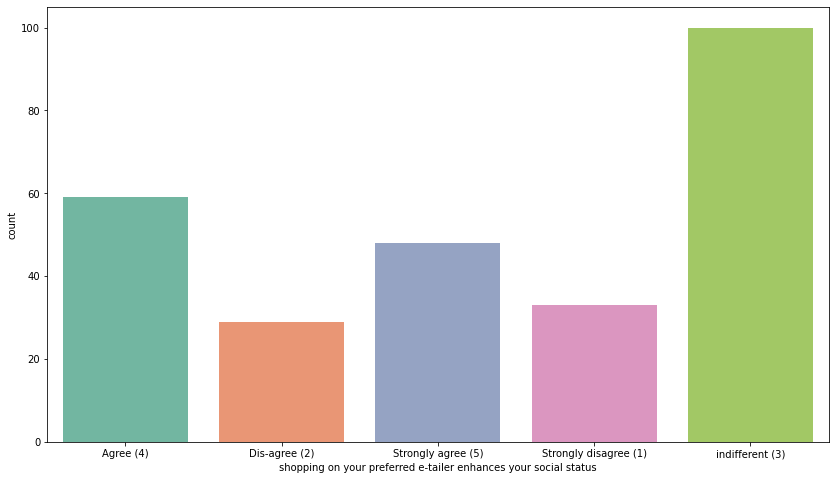

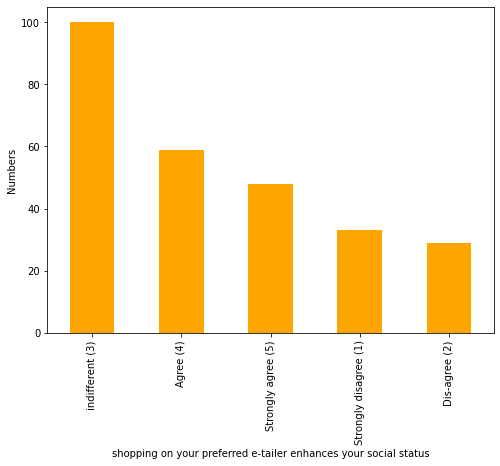

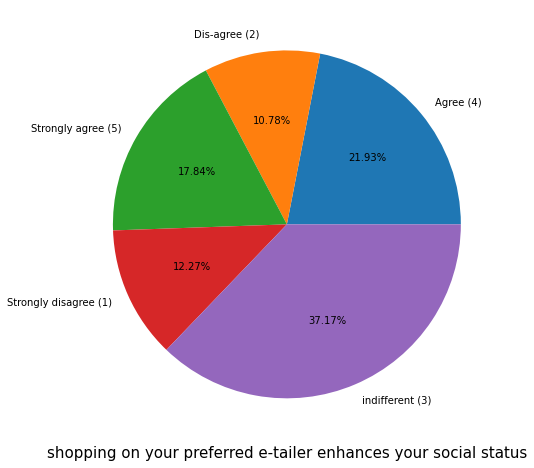

In [68]:
#shopping on your preferred e-tailer enhances your social status
bar1(26)

#### observation :shopping on your preferred e-tailer enhances your social status

17.84% of users strongly agree

21.93% of users agree

12.27% of users strongly disagree 

10.78% of users disagree

37.17% of users feels Indifferent

shopping on your preferred e-tailer enhances your social status: Should be considered

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: you feel gratification shopping on your favorite e-tailer, dtype: int64
----------------------------------------------------------------------------------------------------


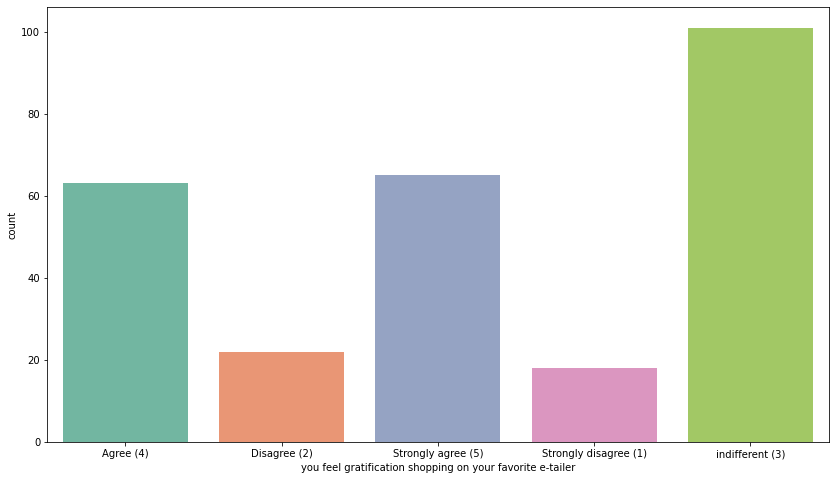

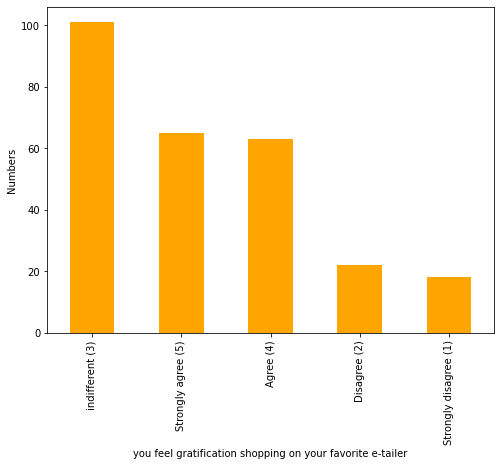

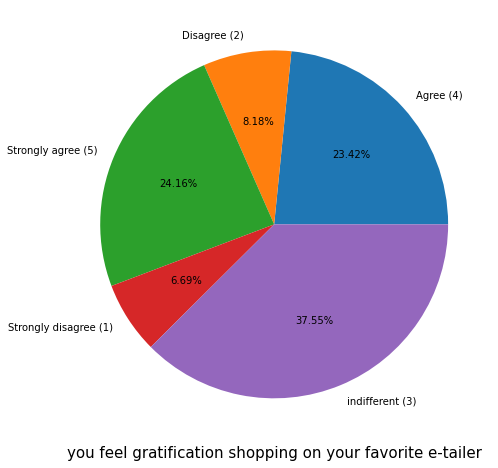

In [69]:
#you feel gratification shopping on your favorite e-tailer
bar1(27)

#### observation : you feel gratification shopping on your favorite e-tailer
24.16% of users strongly agree

23.42% of users agree

6.69% of users strongly  disagree 

8.18% of users disagree

37.55% of users feels Indifferent

you feel gratification shopping on your favorite e-tailer : Should be considered, we have scope of improvement

Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: shopping on the website helps you fulfill certain roles, dtype: int64
----------------------------------------------------------------------------------------------------


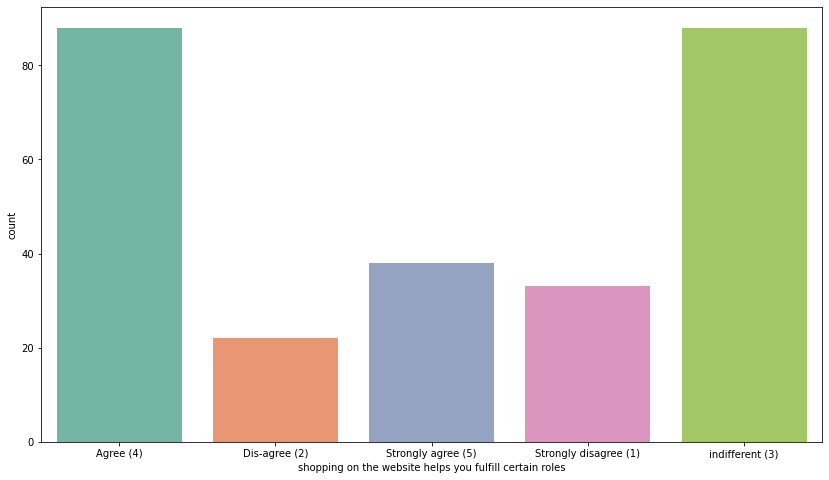

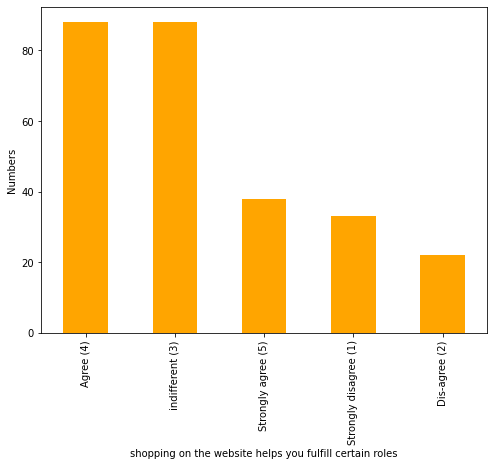

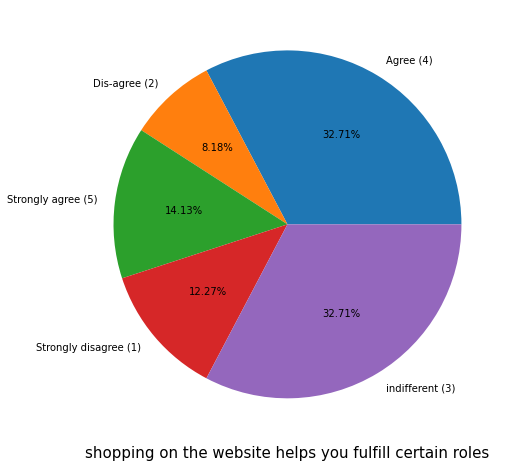

In [70]:
#shopping on the website helps you fulfill certain roles
bar1(28)

#### observation : you feel gratification shopping on your favorite e-tailer

14.13% of users strongly agree

32.71% of users agree

12.27% of users  disagree 

8.18% of users disagree

32.71% of users feels Indifferent

shopping on the website helps you fulfill certain roles : Should be considered, we have good scope of improvement here

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: getting value for money spent, dtype: int64
----------------------------------------------------------------------------------------------------


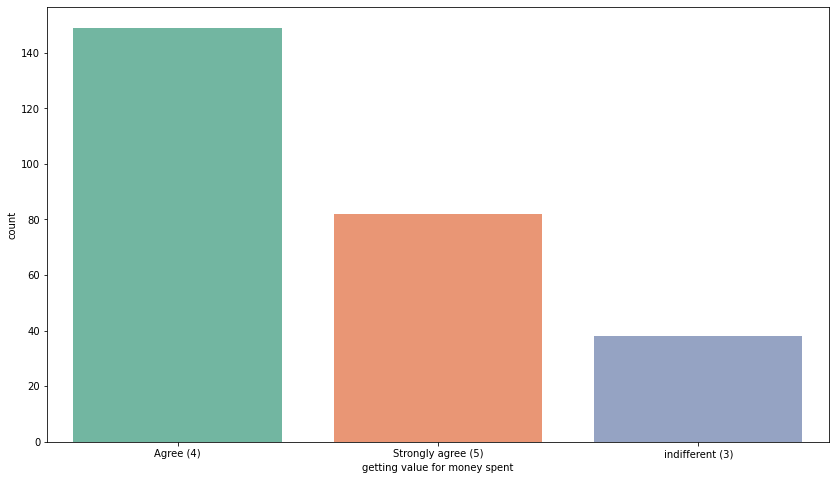

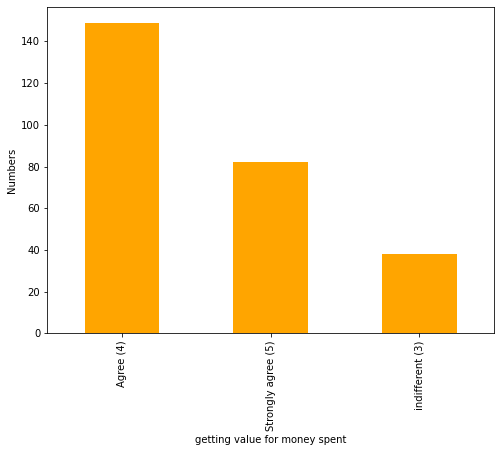

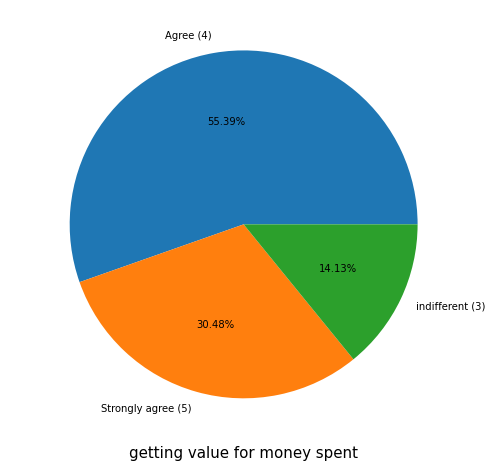

In [71]:
#getting value for money spent
bar1(29)

#### observation : getting value for money spent

30.48% of users strongly agree

55.39% of users agree

14.13% of users feels Indifferent

getting value for money spent : Should be considered and agiven more importance. No user disagree about getting value for money spent. So trust is produced succesfully by online retailers.

## This are the factors that need to looked upon for customer retention in an online business

# Now we can look which online retailers are trending among users with respect to its each feature

In [72]:
#col3 - Here for different scenarios customers will choose which retail store
#userdefined function for plotting graph for different available data. we can infer from the graph that which has the best weightage for succesfully retaining customer

def bar3(i):
    
    plt.figure(figsize=(14,8))
    print(data[col3[i]].value_counts())
    print("-"*100)
    sns.countplot(y=data[col3[i]].sort_values(),palette="Set3")
    plt.figure(figsize=(8,6))
    data[col3[i]].value_counts().plot(kind='bar',color='violet')
    plt.xlabel(col3[i])
    plt.ylabel('Numbers')
    plt.figure(figsize=(14,8))
    data.groupby(col3[i]).size().plot(kind='pie', autopct='%.2f%%')
    plt.xlabel(col3[i], size=15)
    plt.ylabel(' ', size=15)

In [73]:
len(col3)

24

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: online retailers you have shopped from, dtype: int64
----------------------------------------------------------------------------------------------------


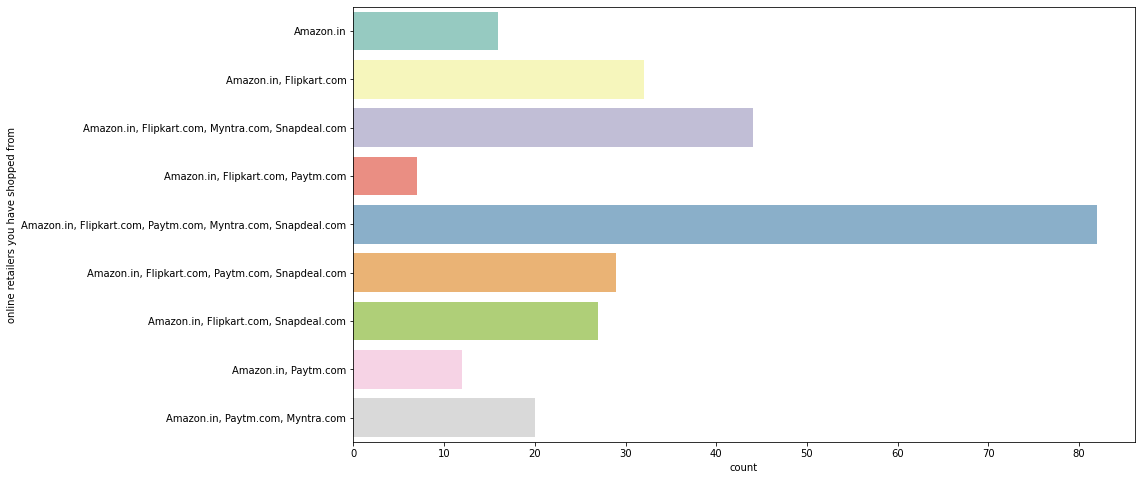

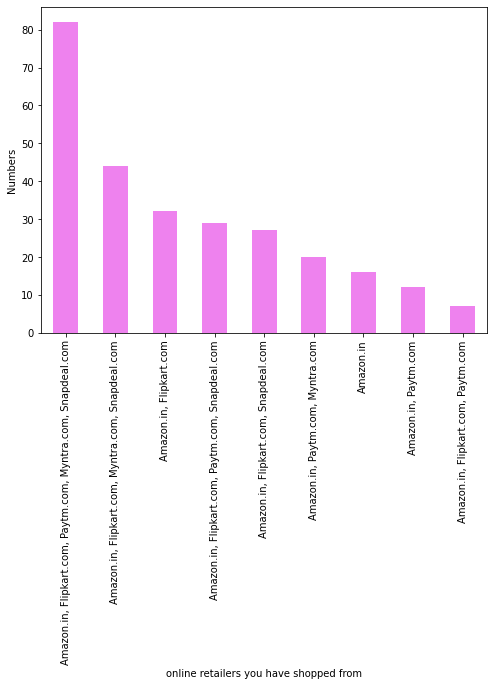

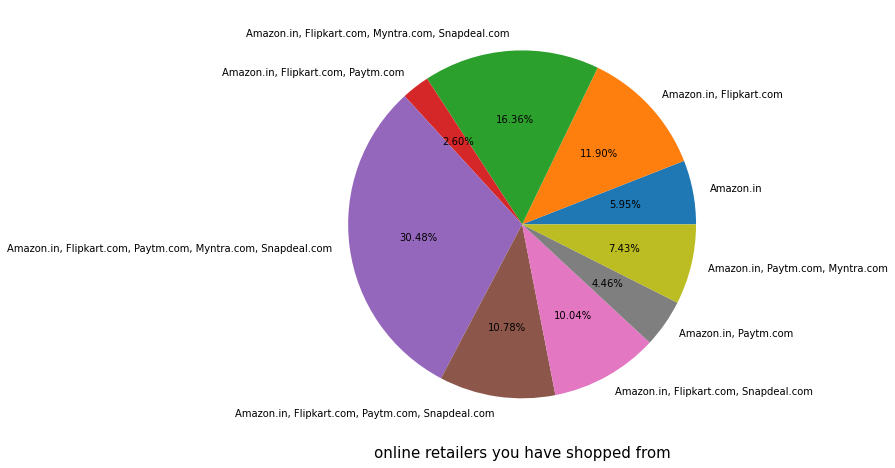

In [74]:
#online retailers you have shopped from
bar3(0)

#### observation:-  

1.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 82 

2.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 44 

3.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, are 32 

4.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com are 29 

5.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Snapdeal.com are 27 

6.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com are 20. 

7.From the following, the online retailers people have shopped from Amazon.in are 16. 

8.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Paytm.com are 12. 

9.From the following, the online retailers people have shopped from Amazon.in, Flipkart.com, Paytm.com are 7

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64
----------------------------------------------------------------------------------------------------


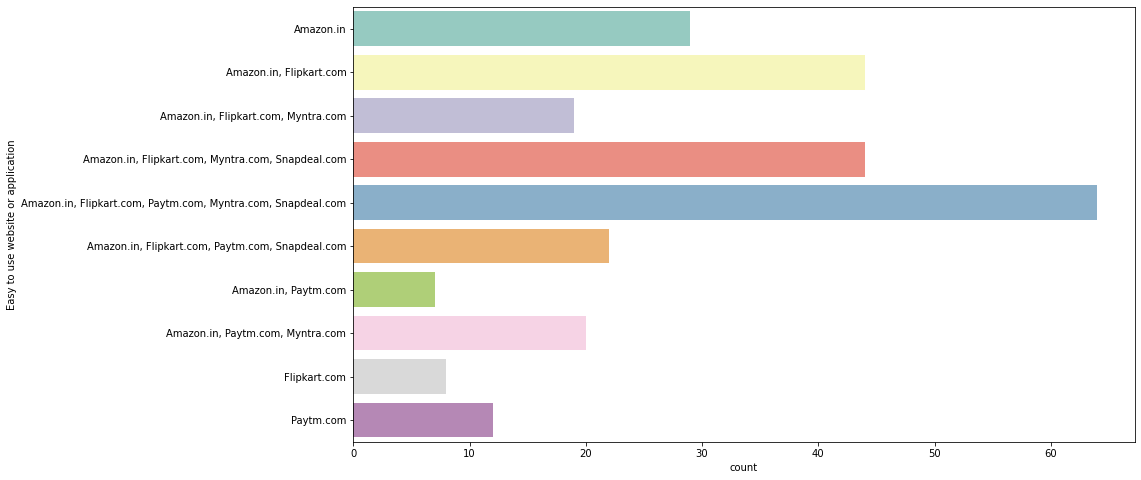

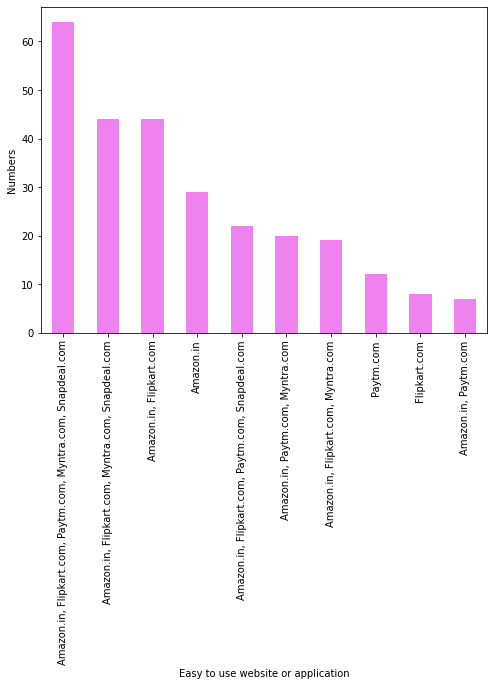

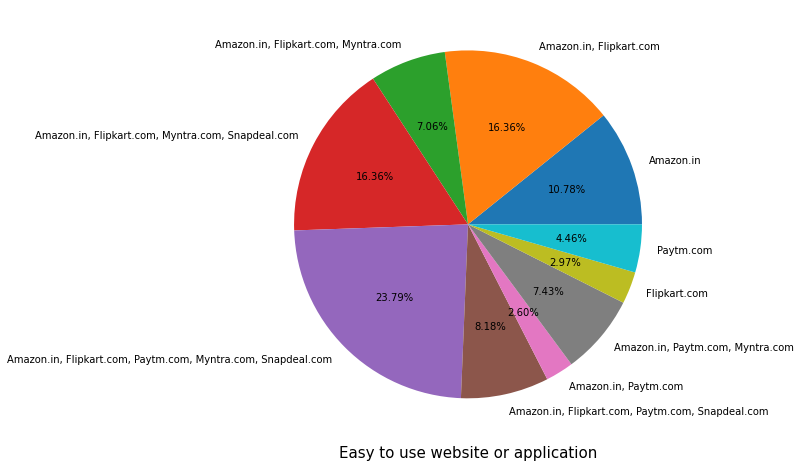

In [75]:
#Easy to use website or application
bar3(1)

#### observation:-

1.people Easy to use website or application in Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 64 

2.people Easy to use website or application in Amazon.in, Flipkart.com are 44 

3.people Easy to use website or application in Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 44. 

4.people Easy to use website or application in Amazon.in are 29. 

5.people Easy to use website or application in Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com are 22. 

6.people Easy to use website or application in Amazon.in, Paytm.com, Myntra.com are 20 

7.people Easy to use website or application in Amazon.in, Flipkart.com, Myntra.com are 19. 

8.people Easy to use website or application in paytm.com are 12 

9.people Easy to use website or application in Flipkart.com are 8 

10.people Easy to use website or application in Amazon.in, paytm.com are 7

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64
----------------------------------------------------------------------------------------------------


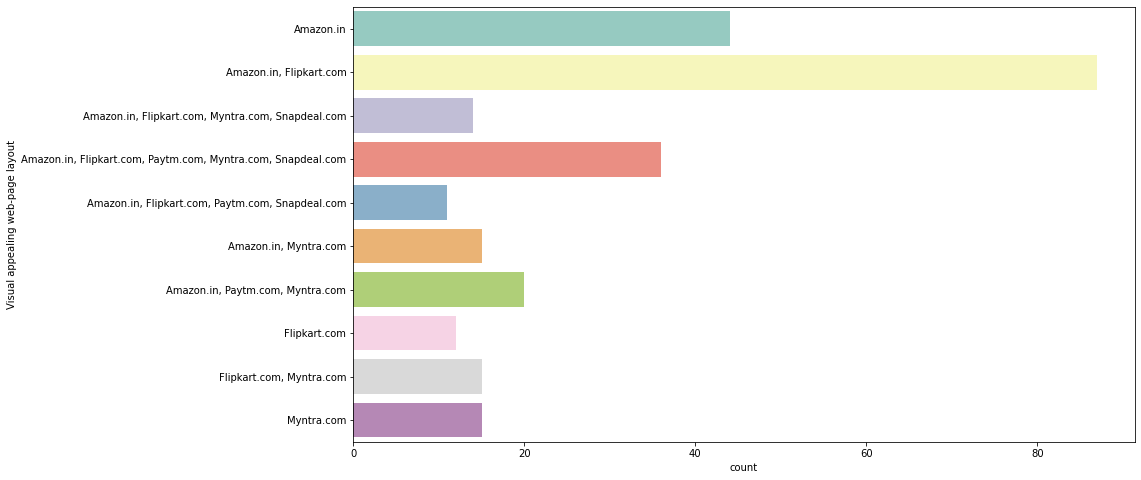

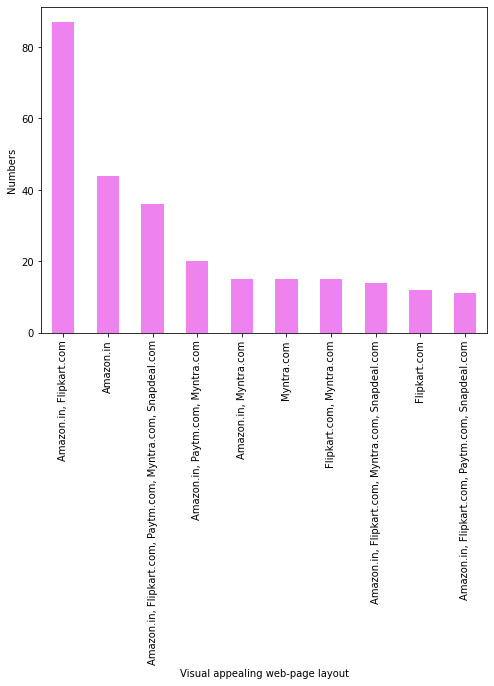

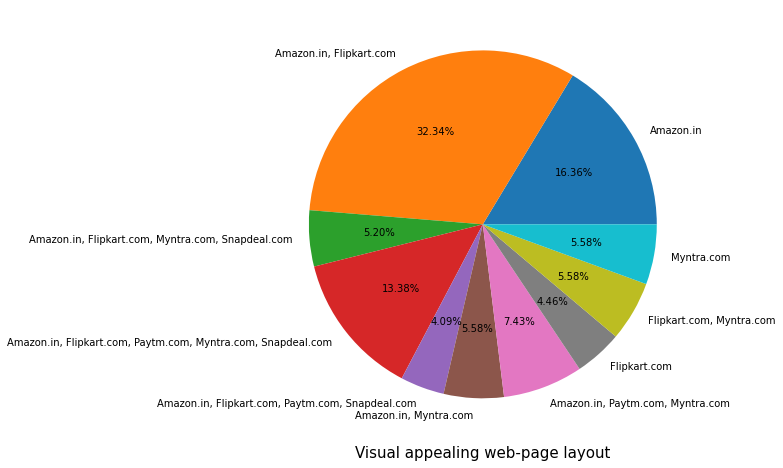

In [76]:
#Visual appealing web-page layout
bar3(2)

#### observation:-

1.people who visual appealing the web page layout in Amazon.in, Flipkart.com are 87 

2.people who visual appealing the web page layout in Amazon.in, Flipkart.com, paytm.com, myntra.com, snapdeal.com are 44. 

3.people who visual appealing the web page layout in Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 36 

4.people who visual appealing the web page layout in Amazon.in, Paytm.com, Myntra.com are 20 

5.people who visual appealing the web page layout in Amazon.in, Myntra.com are 15 

6.people who visual appealing the web page layout in Myntra.com are 15. 

7.people who visual appealing the web page layout in Flipkart.com, Myntra.com are 15 

8.people who visual appealing the web page layout in Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 14 

9.people who visual appealing the web page layout in Flipkart.com are 12 

10.people who visual appealing the web page layout in Amazon.in, Flipkart.com, paytm.com, Snapdeal.com are 11

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64
----------------------------------------------------------------------------------------------------


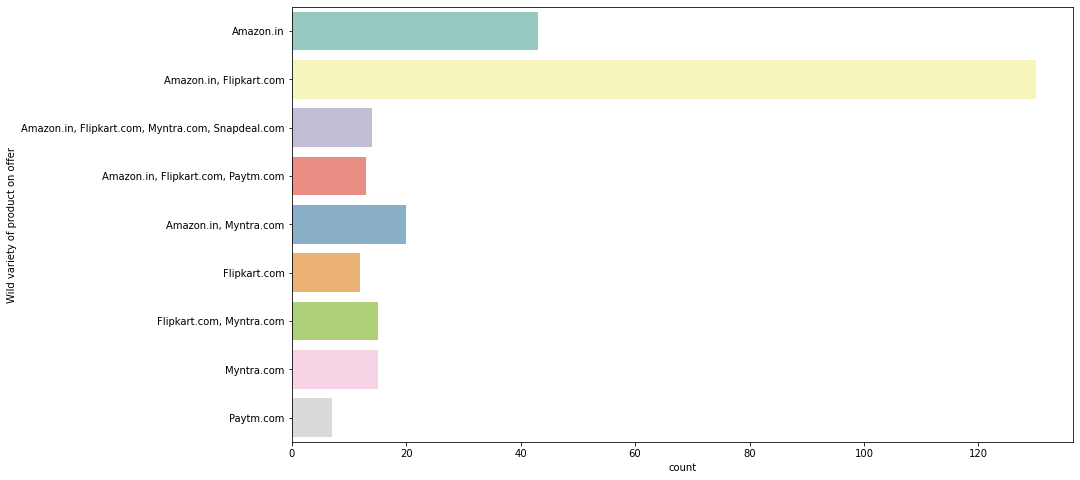

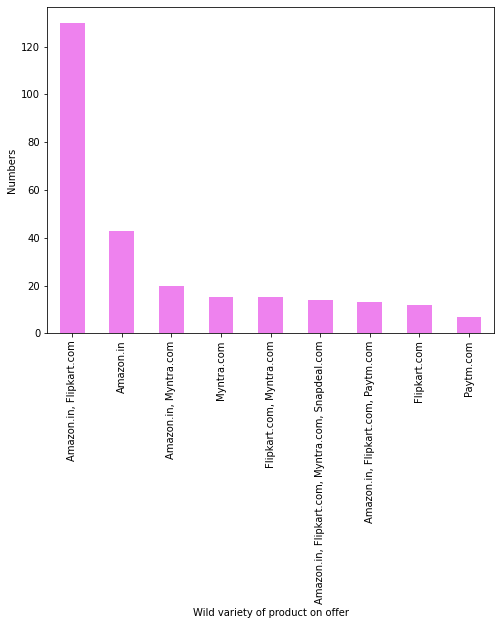

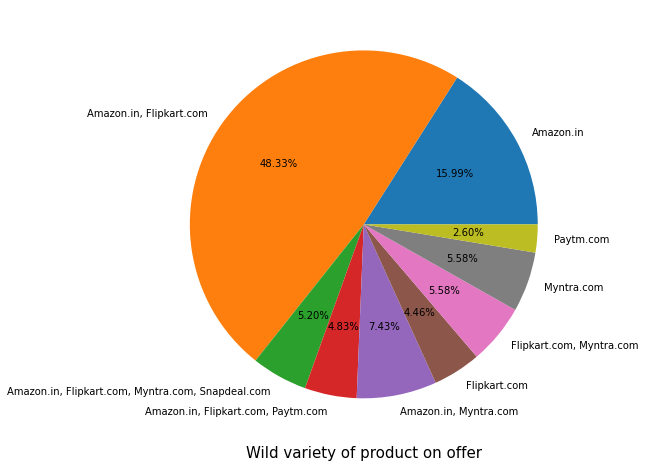

In [77]:
#Wild variety of product on offer
bar3(3)

#### observation:-

1.wide variety of product on offer in Amazon.in, Flipkart.com are 130 

2.wide variety of product on offer in Amazon.in are 43 

3.wide variety of product on offer in Amazon.in, myntra.com are 20 

4.wide variety of product on offer in Myntra.com, Flipkart.com are 15 

5.wide variety of product on offer in Myntra.com are 15 

6.wide variety of product on offer in Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 14 

7.wide variety of product on offer in Amazon.in, Flipkart.com, Paytm.com are 13 

8.wide variety of product on offer in flipkart.com are 12 

9.wide variety of product on offer in paytm.com are 7

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64
----------------------------------------------------------------------------------------------------


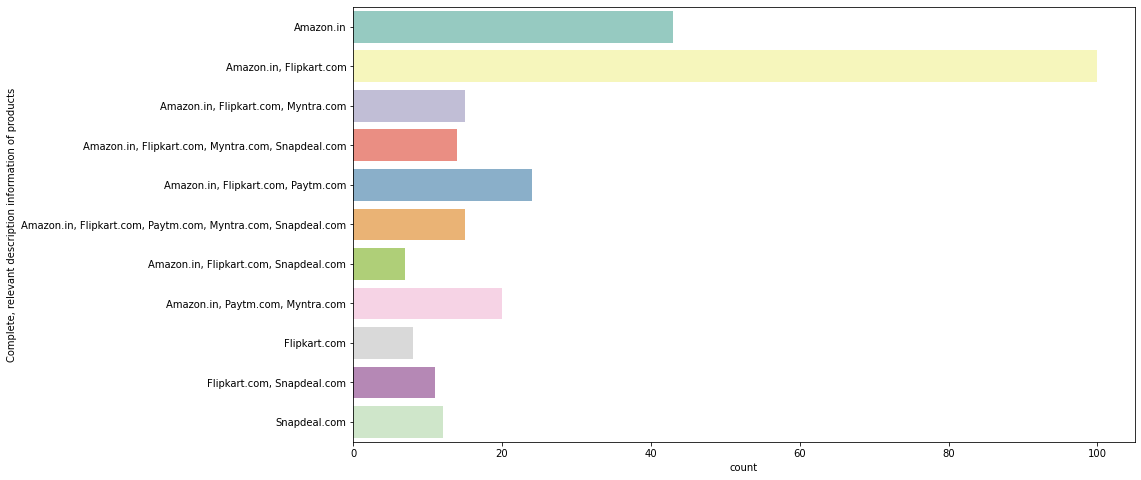

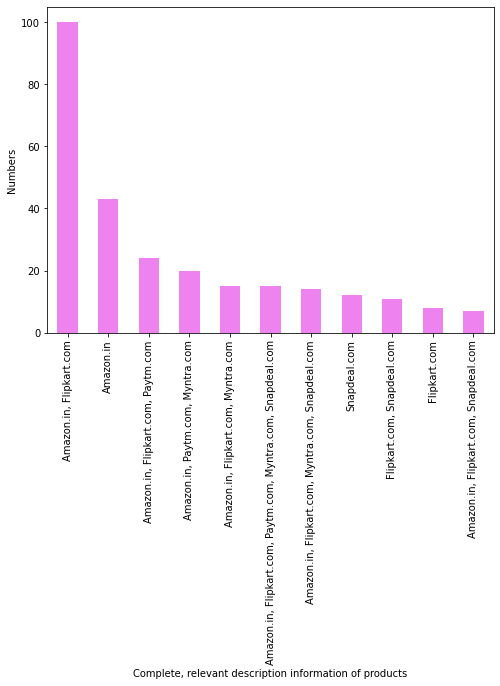

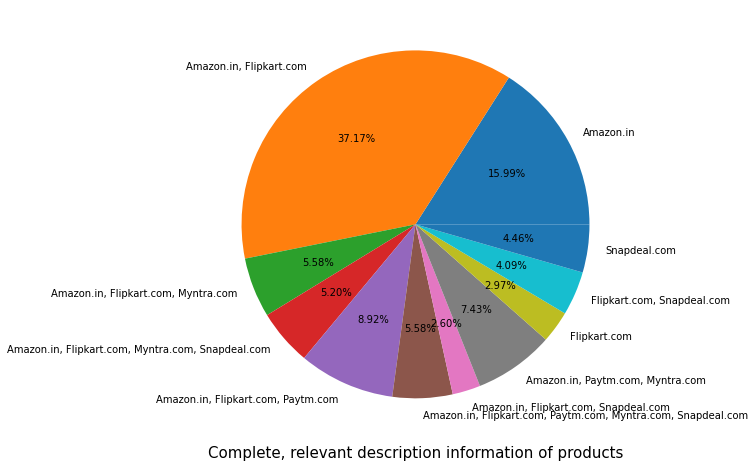

In [78]:
#Complete, relevant description information of products
bar3(4)

#### observation:

1.-people know the Complete, relevant description information of products on Amazon.in, Flipkart.com are 100 

2.people know the Complete, relevant description information of products on Amazon.in are 43 

3.people know the Complete, relevant description information of products on Amazon.in, Flipkart.com, paytm.com are 24 

4.people know the Complete, relevant description information of products on Amazon.in, Paytm.com, Myntra.com are 20 

5.people know the Complete, relevant description information of products on Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 15 

6.people know the Complete, relevant description information of products on Amazon.in, Flipkart.com, Myntra.com are 15. 

7.people know the Complete, relevant description information of products on Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 14. 

8.people know the Complete, relevant description information of products on Snapdeal.com are 12. 

9.people know the Complete, relevant description information of products on Flipkart.com, Snapdeal.com are 11. 

10.people know the Complete, relevant description information of products on Flipkart.com are 8 11.people know the Complete, relevant description information of products on Amazon.com, Flipkart.com, Snapdeal.com are 7

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64
----------------------------------------------------------------------------------------------------


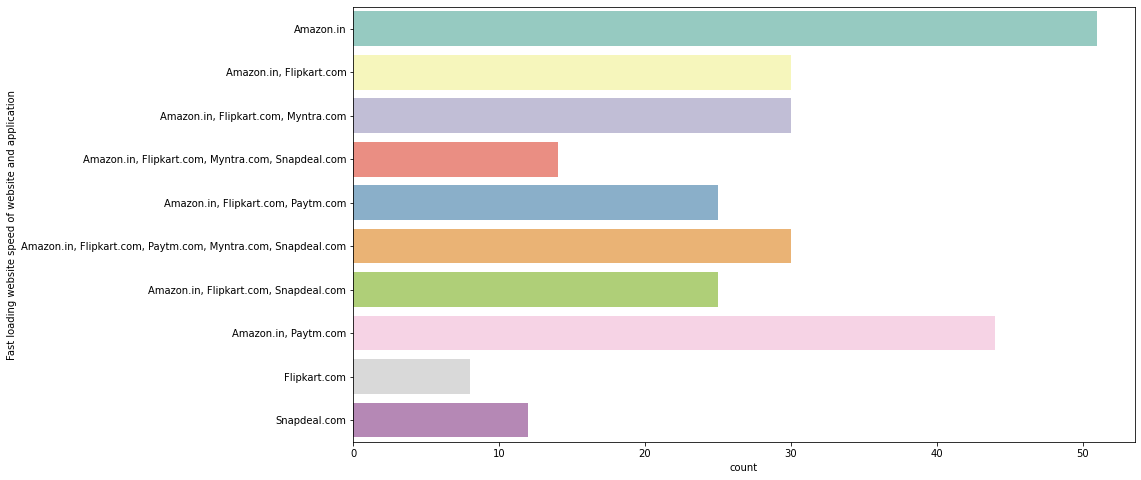

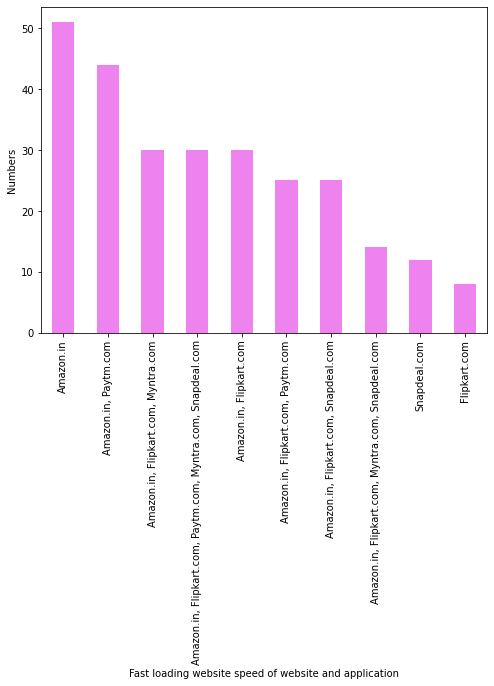

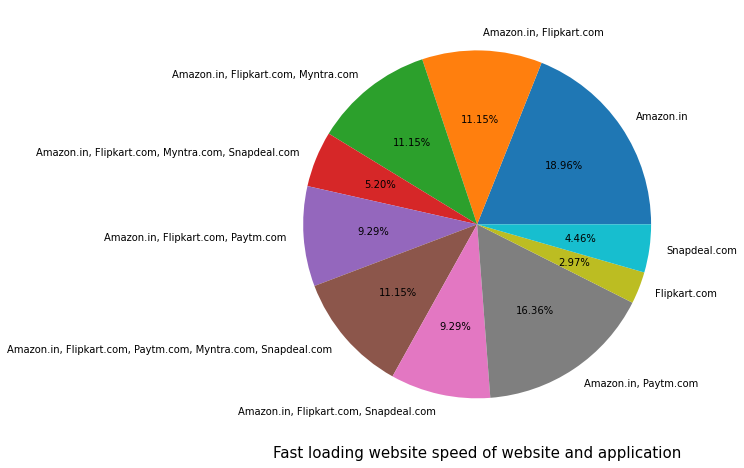

In [79]:
#Fast loading website speed of website and application
bar3(5)

#### observation:- 

1.fast loading website speed of website and application in Amazon.in are 51 

2.fast loading website speed of website and application in Amazon.in, Paytm.com are 44 

3.fast loading website speed of website and application in Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 30 

4.fast loading website speed of website and application in Amazon.in, Flipkart.com, Snapdeal.com are 25 

5.fast loading website speed of website and application in Amazon.in, Flipkart.com, Paytm.com are 25 

6.fast loading website speed of website and application in Amazon.in, Flipkart.com, Paytm.com.com, Myntra.com are 14 

7.fast loading website speed of website and application in snapdeal.com are 12. 

8.fast loading website speed of website and application in Flipkart.com are 8

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Myntra.com                                           15
Flipkart.com                                         15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64
----------------------------------------------------------------------------------------------------


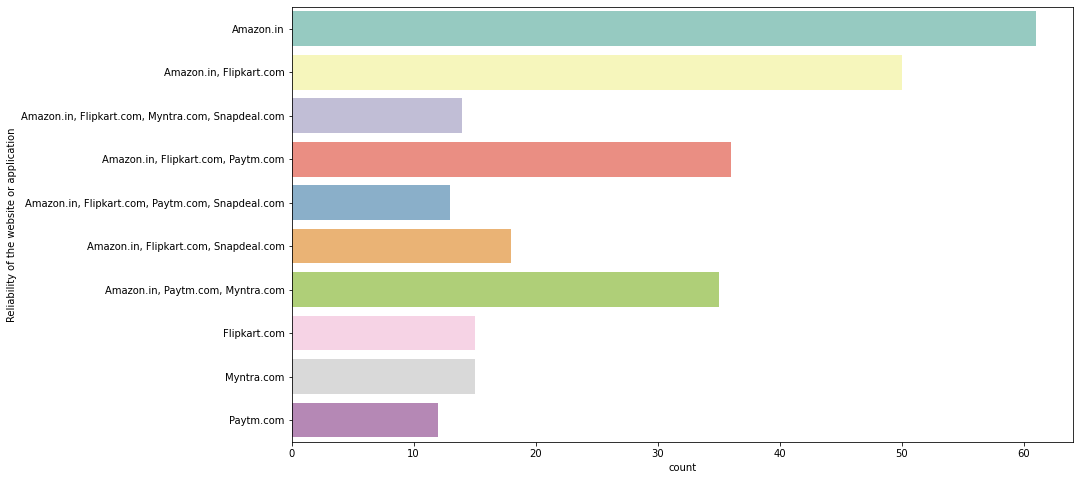

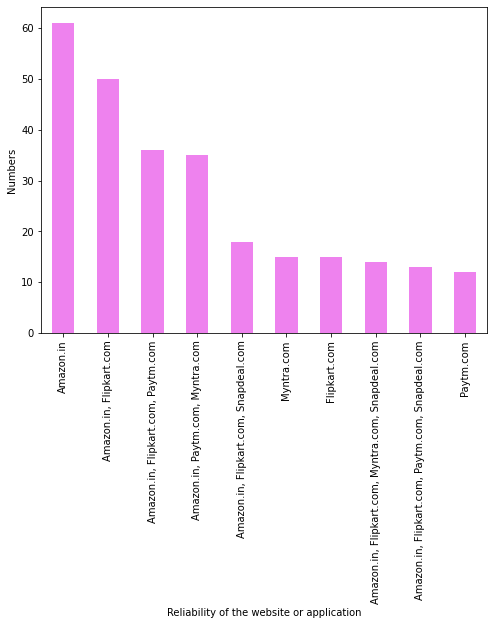

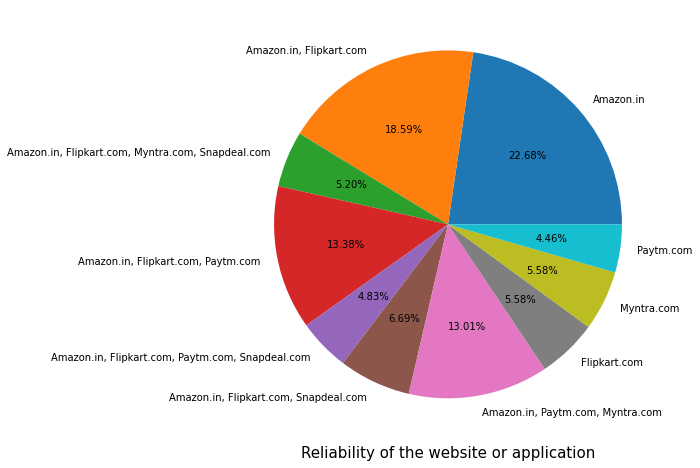

In [80]:
#Reliability of the website or application
bar3(6)

#### observation:-

1.Reliability of the website or application on Amazon.in are 61 

2.Reliability of the website or application on Amazon.in, flipkart.com are 50 

3.Reliability of the website or application on Amazon.in, Flipkart.com, Paytm.com are 36 

4.Reliability of the website or application on Amazon.in, Paytm.com, Myntra.com are 35 

5.Reliability of the website or application on Amazon.in, Flipkart.com, Snapdeal.com are 18 

6.Reliability of the website or application on Flipkart.com are 15 

7.Reliability of the website or application on Myntra.com are 15 

8.Reliability of the website or application on Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 14 

9.Reliability of the website or application on Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com are 13 

10.Reliability of the website or application on Paytm.com are 12

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64
----------------------------------------------------------------------------------------------------


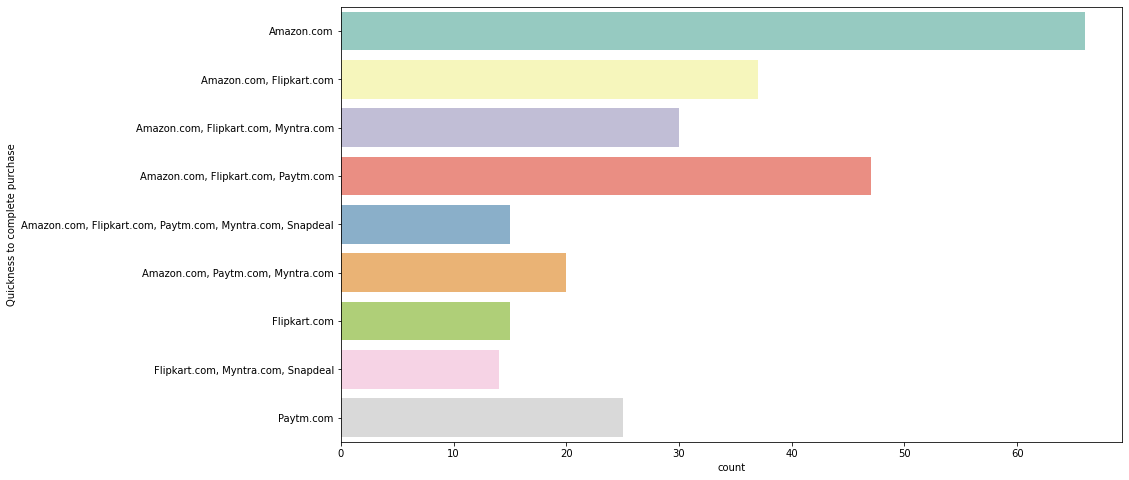

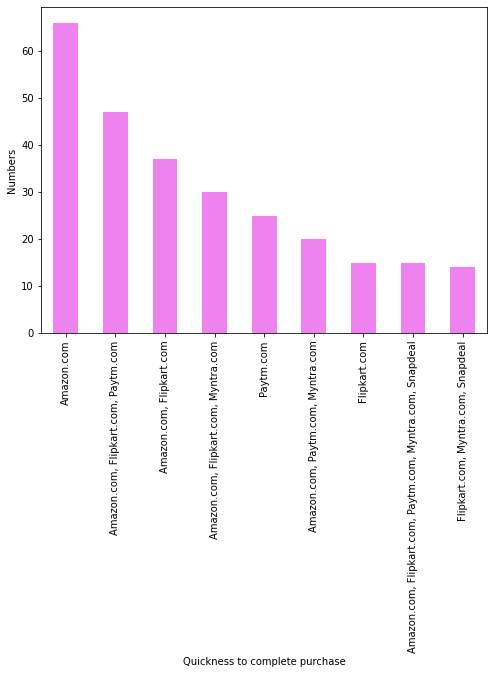

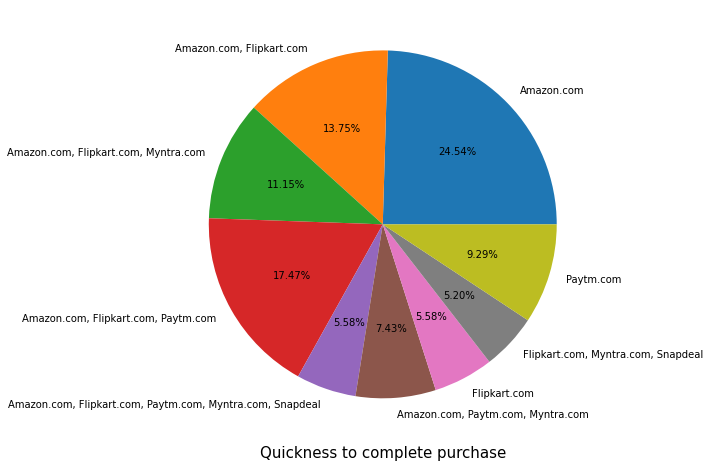

In [81]:
#Quickness to complete purchase
bar3(7)

#### observation:-

1.Quickness to complete purchase on Amazon.in are 66 

2.Quickness to complete purchase on Amazon.com, Flipkart.com, Paytm.com are 37 

3.Quickness to complete purchase on Amazon.com, Flipkart.com are 30. 

4.Quickness to complete purchase on Amazon.com, Flipkart.com, Paytm.com are 20 

5.Quickness to complete purchase on Amazon.com, Flipkart.com, Myntra.com are 30. 

6.Quickness to complete purchase on Paytm.com are 25. 

7.Quickness to complete purchase on Amazon.com, Flipkart.com, Myntra.com are 30 

8.Quickness to complete purchase on Amazon.com, Flipkart.com, Myntra.com are 30

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64
----------------------------------------------------------------------------------------------------


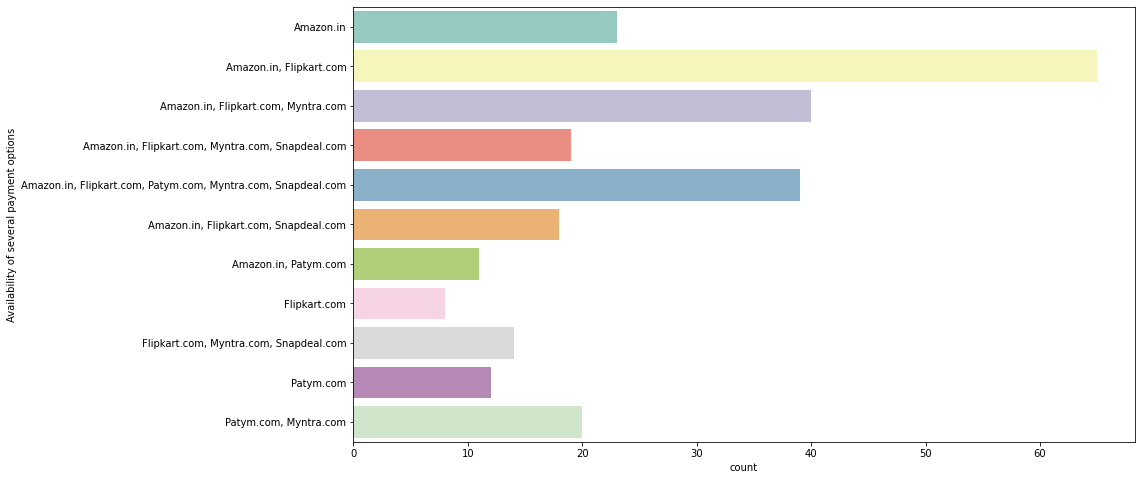

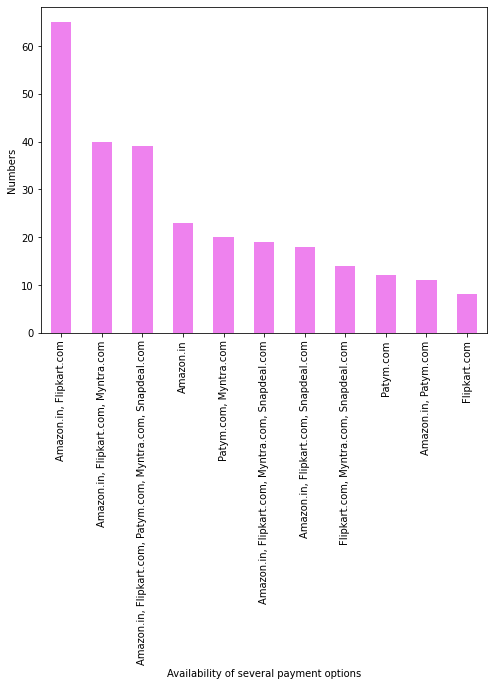

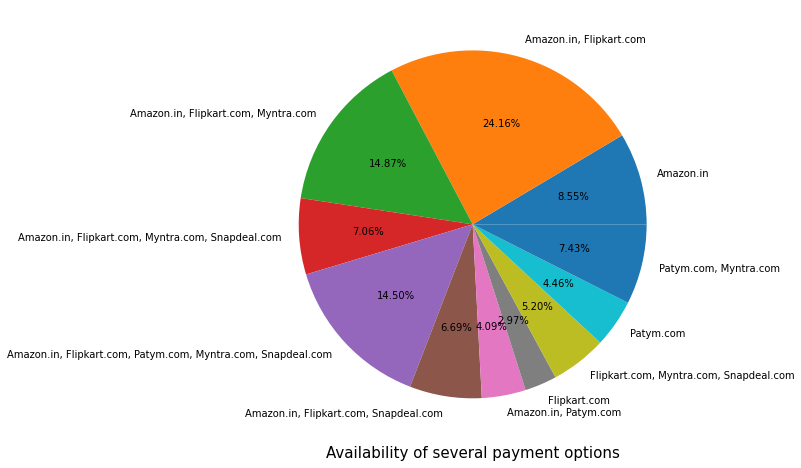

In [82]:
#Availability of several payment options
bar3(8)

#### observation:- 

1.Availability of several payment options on Amazon.in, Flipkart.com by people is 65 

2.Availability of several payment options on Amazon.in, Flipkart.com, Myntra.com by people is 40. 

3.Availability of several payment options on Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com by people is 39. 

4.Availability of several payment options on Amazon.in by people is 23 

5.Availability of several payment options on Patym.com, Myntra.com by people is 20. 

6.Availability of several payment options on Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com by people is 19 

7.Availability of several payment options on Amazon.in, Flipkart.com, Snapdeal.com by people is 18. 

8.Availability of several payment options on Flipkart.com, Myntra.com, Snapdeal.com by people is 14. 

9.Availability of several payment options on paytm.com by people is 12. 

10.Availability of several payment options on Amazon.in, Patym.com by people is 11. 

11.Availability of several payment options on Flipkart.com by people is 8.


Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: Speedy order delivery , dtype: int64
----------------------------------------------------------------------------------------------------


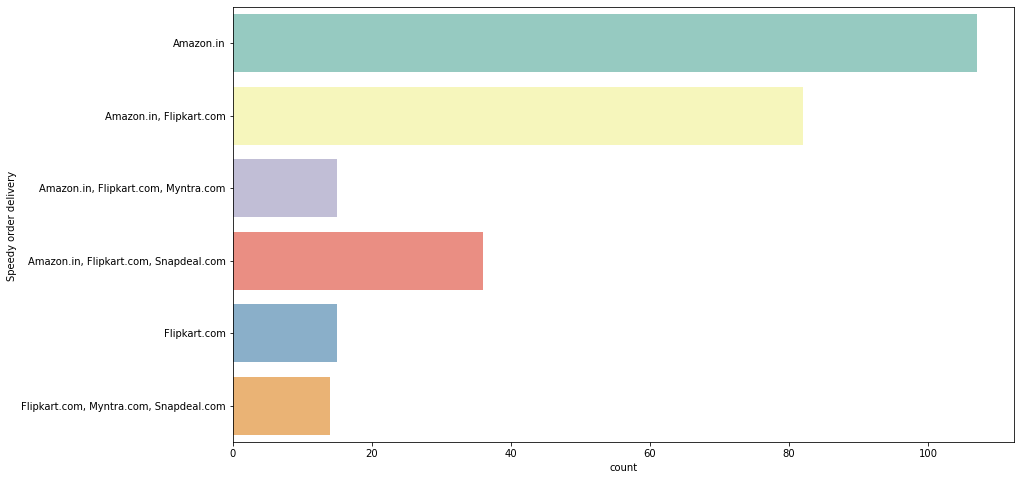

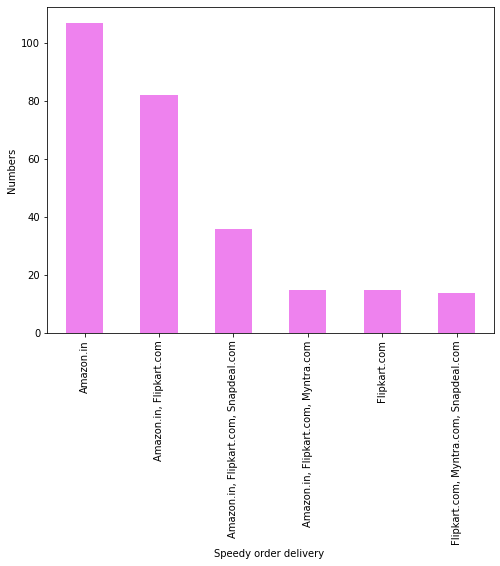

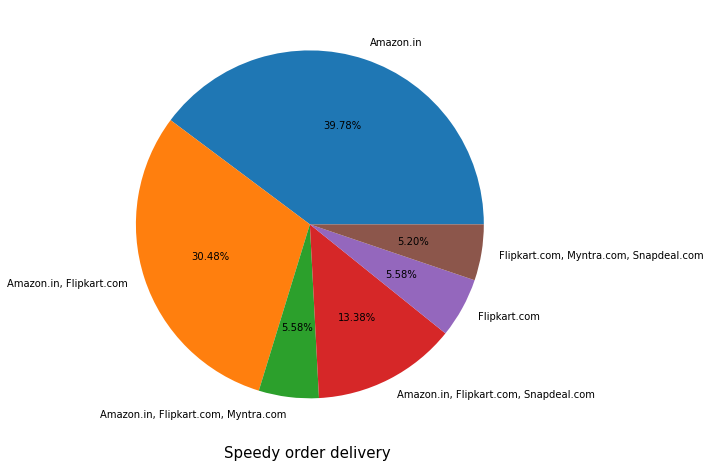

In [83]:
#Speedy order delivery
bar3(9)

#### observation:- 

1.speedy order delivery on Amazon.in are 107. 

2.speedy order delivery on Amazon.in, Flipkart.com are 82. 

3.speedy order delivery on Amazon.in, Flipkart.com, Snapdeal.com are 36.

4.speedy order delivery on Flipkart.com are 36. 

5.speedy order delivery on Amazon.in, Flipkart.com, Myntra.com are 15.

6.speedy order delivery on Flipkart.com, Myntra.com, Snapdeal.com are 14.

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Myntra.com                                                      15
Amazon.in, Paytm.com                                            15
Flipkart.com                                                    15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64
----------------------------------------------------------------------------------------------------


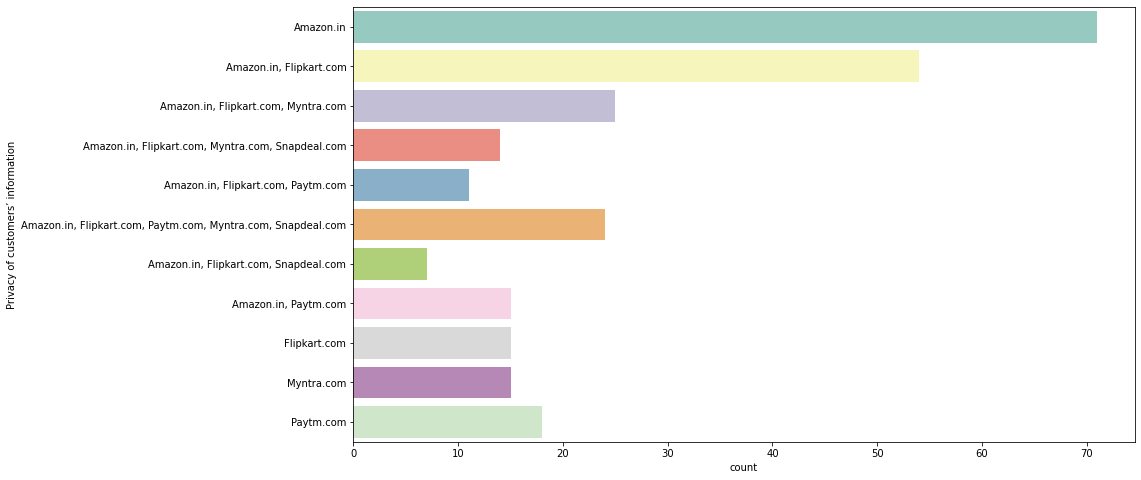

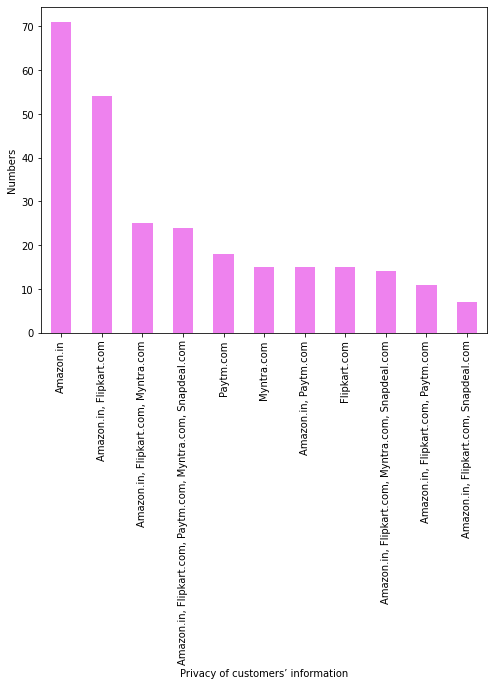

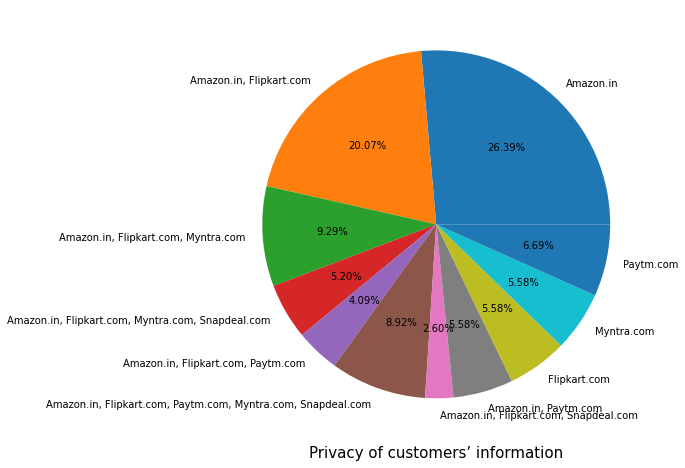

In [84]:
#Privacy of customers’ information
bar3(10)

#### observation:- 

privacy of customers information by people in Amazon.in are 71 

privacy of customers information by people in Amazon.in, Flipkart.com are 54 

privacy of customers information by people in Amazon.in, Flipkart.com, Myntra.com are 25 

privacy of customers information by people in Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 24 

privacy of customers information by people in Paytm.com are 18 

privacy of customers information by people in Flipkart.com are 15 

privacy of customers information by people in Myntra.com are 15 

privacy of customers information by people in Amazon.in, Paytm.com are 15. 

privacy of customers information by people in Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 14 

privacy of customers information by people in Amazon.in, Flipkart.com, Paytm.com are 11 

privacy of customers information by people in Amazon.in, Flipkart.com, Snapdeal.com are 7

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Myntra.com                                                      15
Paytm.com                                                       15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64
----------------------------------------------------------------------------------------------------


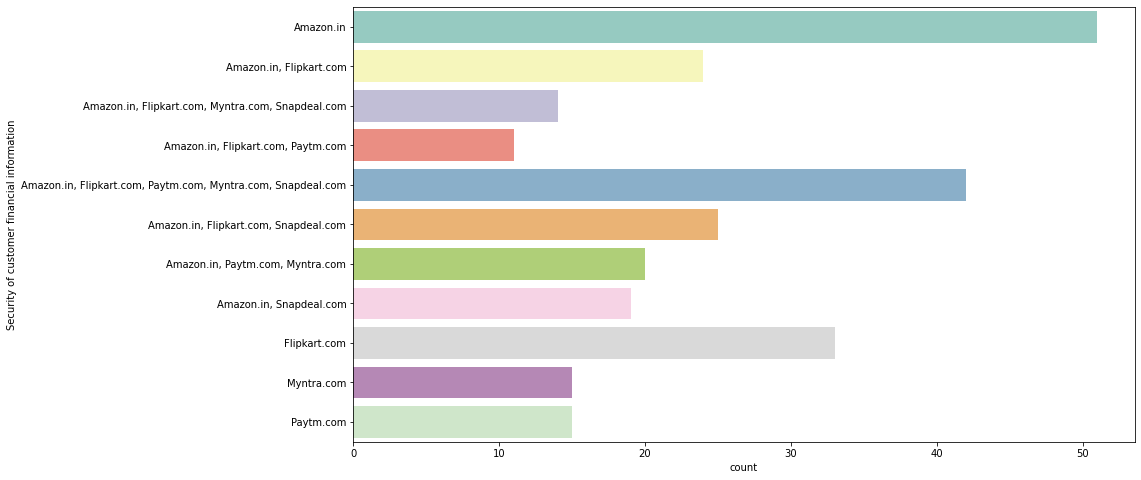

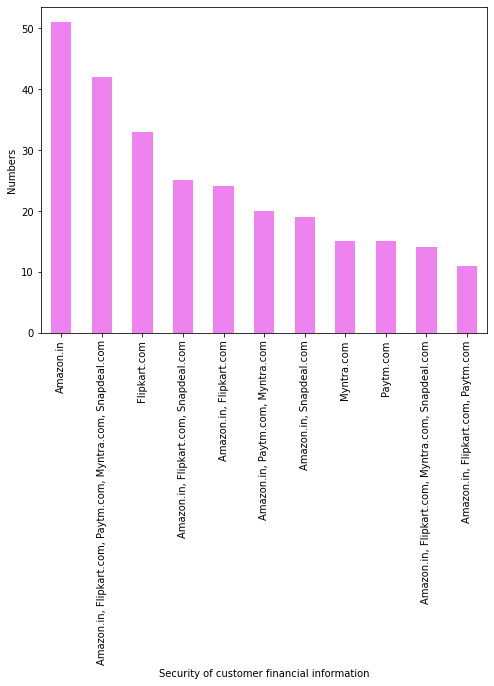

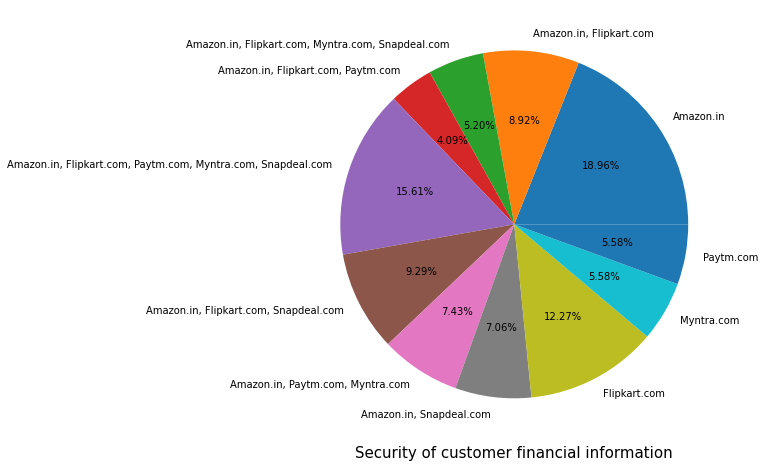

In [85]:
#Security of customer financial information
bar3(11)

#### observation:- 

Security of customer financial information on Amazon.in is 51.

Security of customer financial information on Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com is 33 

Security of customer financial information on Flipkart.com is 33 

Security of customer financial information on Amazon.in, Flipkart.com, Snapdeal.com is 25 

Security of customer financial information on Amazon.in, Flipkart.com is 24 

Security of customer financial information on Amazon.in, Paytm.com, Myntra.com is 20 

Security of customer financial information on Amazon.in, Snapdeal.com is 19 

Security of customer financial information on Myntra.com is 15 

Security of customer financial information on paytm.com is 15. 

Security of customer financial information on Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com is 14. 

Security of customer financial information on Amazon.in, Flipkart.com, paytm.com is 11.

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64
----------------------------------------------------------------------------------------------------


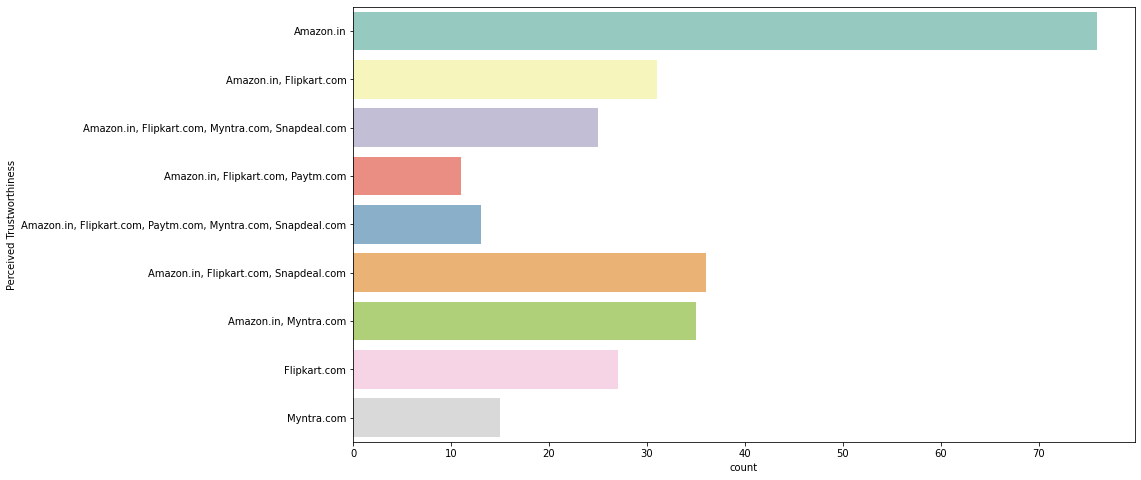

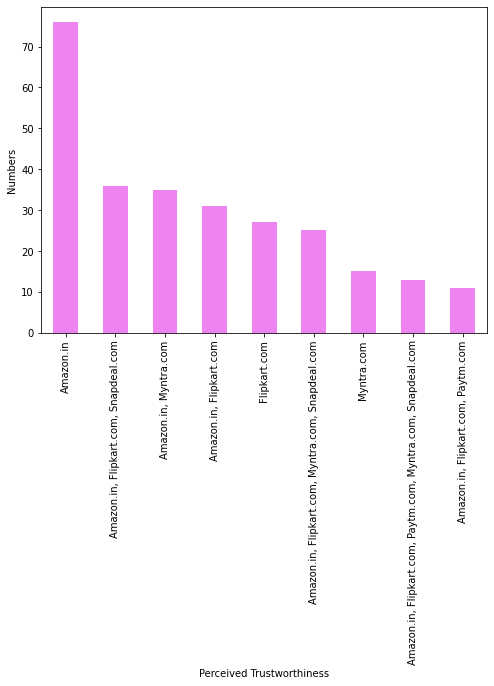

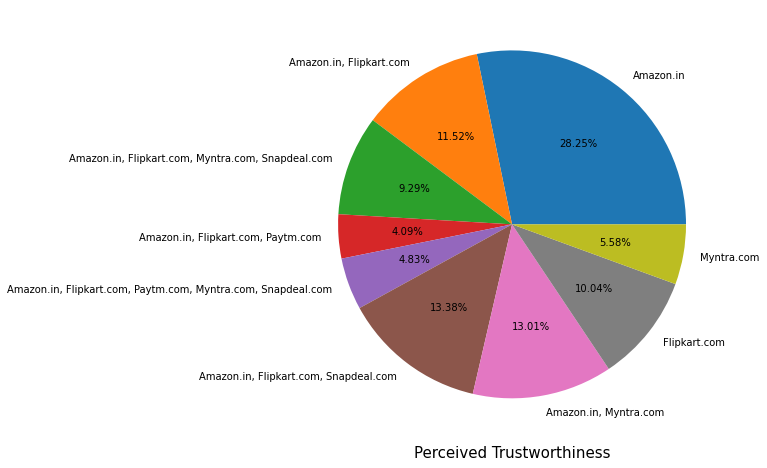

In [86]:
#Perceived Trustworthiness
bar3(12)

#### observation:-

1.perceived trustworthiness on Amazon.in are 76 

2.perceived trustworthiness on Amazon.in, Flipkart.com, Snapdeal.com are 36 

3.perceived trustworthiness on Amazon.in, Myntra.com are 35 

4.perceived trustworthiness on Amazon.in, flipkart.com are 31 

5.perceived trustworthiness on flipkart.com are 27

6.perceived trustworthiness on Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com are 25 

7.perceived trustworthiness on Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com are 13 

8.perceived trustworthiness on Amazon.in, Flipkart.com, Paytm.com are 11

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: Presence of online assistance through multi-channel, dtype: int64
----------------------------------------------------------------------------------------------------


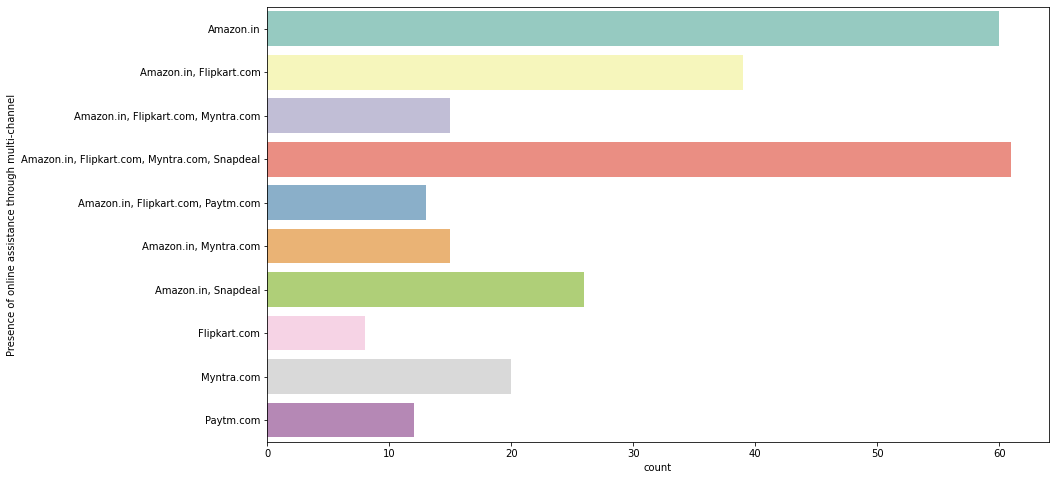

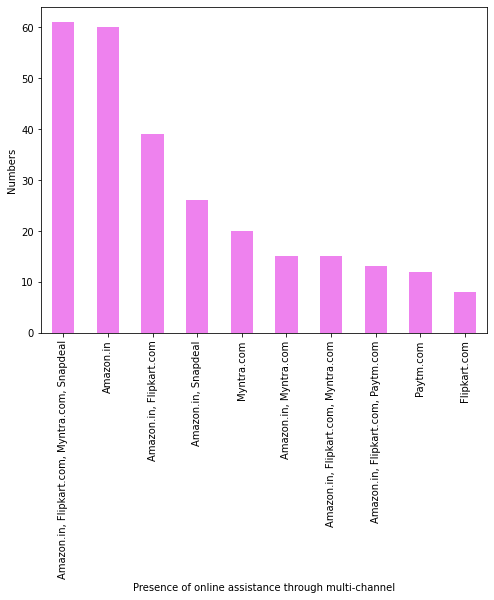

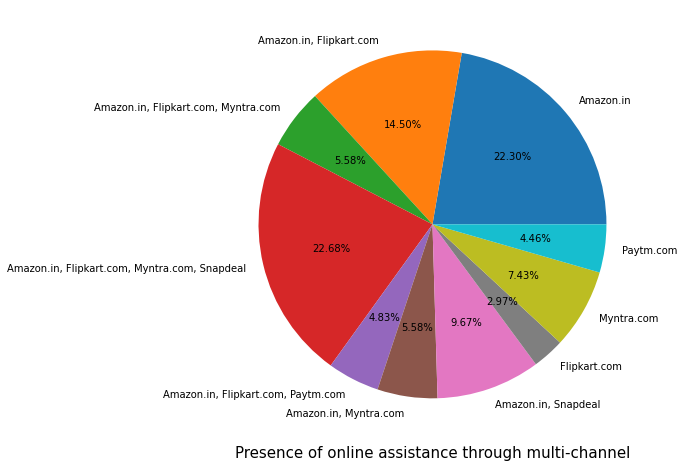

In [87]:
#Presence of online assistance through multi-channel
bar3(13)

#### observation:-

Presence of online assistance through multi-channel on Amazon.in, Flipkart.com, Myntra.com, Snapdeal are 61 

Presence of online assistance through multi-channel on Amazon.in is 60 

Presence of online assistance through multi-channel on Amazon.in, Flipkart.com is 39 

Presence of online assistance through multi-channel on Amazon.in, Snapdeal.com is 26 

Presence of online assistance through multi-channel on Myntra.com is 20 

Presence of online assistance through multi-channel on Amazon.in, Flipkart.com, Myntra.com is 15 

presence of online assistance through multi-channel on Amazon.in, Myntra.com is 15 

presence of online assistance through multi-channel on Amazon.in, Flipkart.com, Paytm.com is 13 

presence of online assistance through multi-channel on Flipkart.com is 8

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64
----------------------------------------------------------------------------------------------------


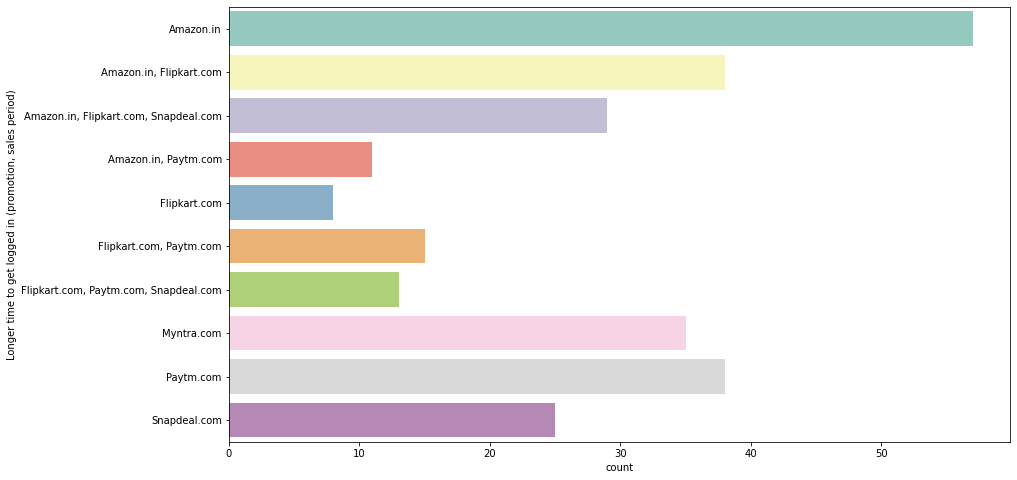

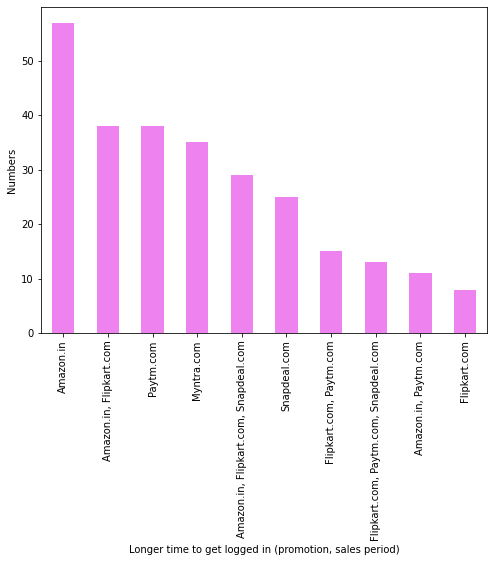

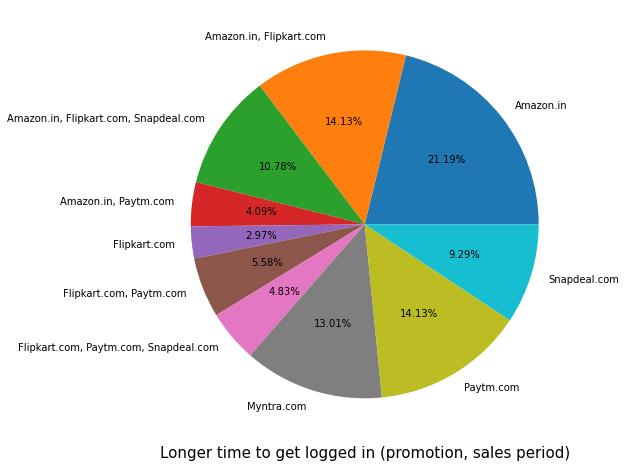

In [88]:
#Longer time to get logged in (promotion, sales period)
bar3(14)

#### observation:-

1.Longer time to get logged in Amazon.in are 57 

2.Longer time to get logged in paytm.com are 38 

3.Longer time to get logged in Amazon.in, Flipkart.com are 38 

4.Longer time to get logged in Myntra.com are 35 

5.Longer time to get logged in Amazon.in, Flipkart.com, Snapdeal.com are 29 

6.Longer time to get logged in Flipkart.com, Paytm.com are 15 

7.Longer time to get logged in Flipkart.com, Paytm.com, Snapdeal.com are 13 

8.Longer time to get logged in Amazon.in, Paytm.com are 11 

9.Longer time to get logged in Flipkart.com are 8

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64
----------------------------------------------------------------------------------------------------


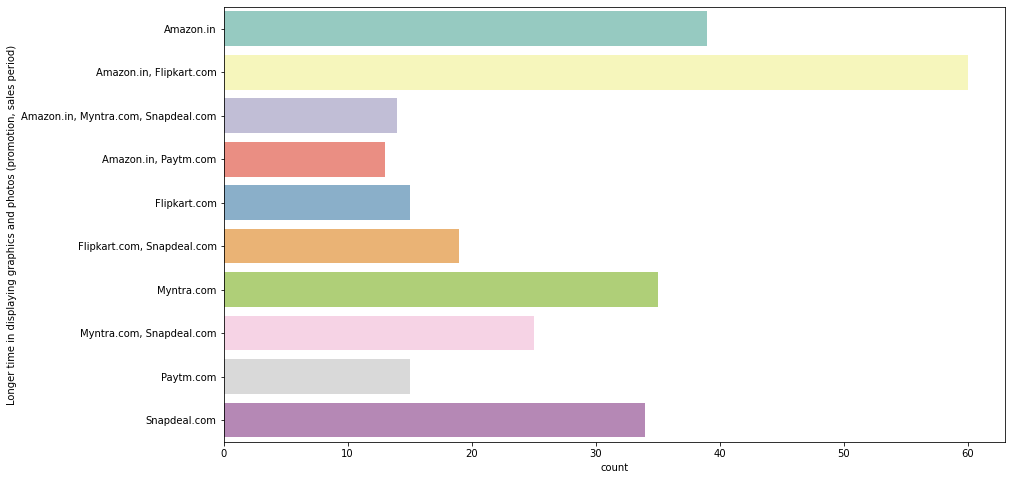

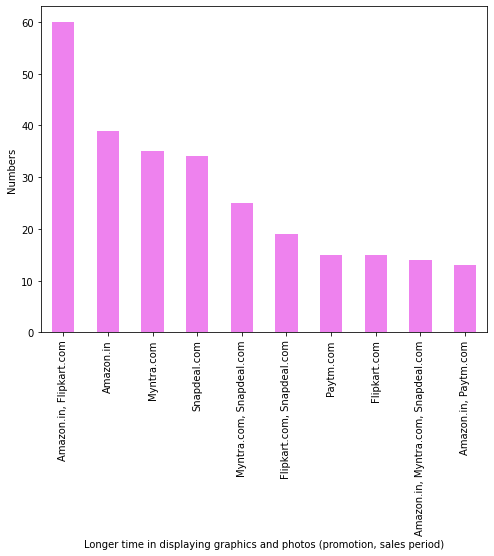

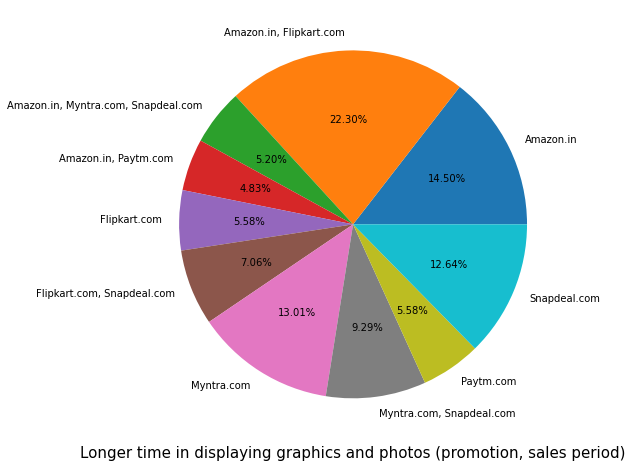

In [89]:
#Longer time in displaying graphics and photos (promotion, sales period)
bar3(15)

#### observation:- 

1.Longer time in displaying graphics and photos on Amazon.in, Flipkart.com are 60 

2.Longer time in displaying graphics and photos on Amazon.in are 39 

3.Longer time in displaying graphics and photos on Myntra.com are 35 

4.Longer time in displaying graphics and photos on snapdeal.com are 34 

5.Longer time in displaying graphics and photos on Myntra.com snapdeal.com are 25 

6.Longer time in displaying graphics and photos on Flipkart.com snapdeal.com are 19 

7.Longer time in displaying graphics and photos on paytm.com are 15 

8.Longer time in displaying graphics and photos on Amazon.in, Myntra.com, Snapdeal.com are 14 

9.Longer time in displaying graphics and photos on Amazon.in, paytm.com are 13

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64
----------------------------------------------------------------------------------------------------


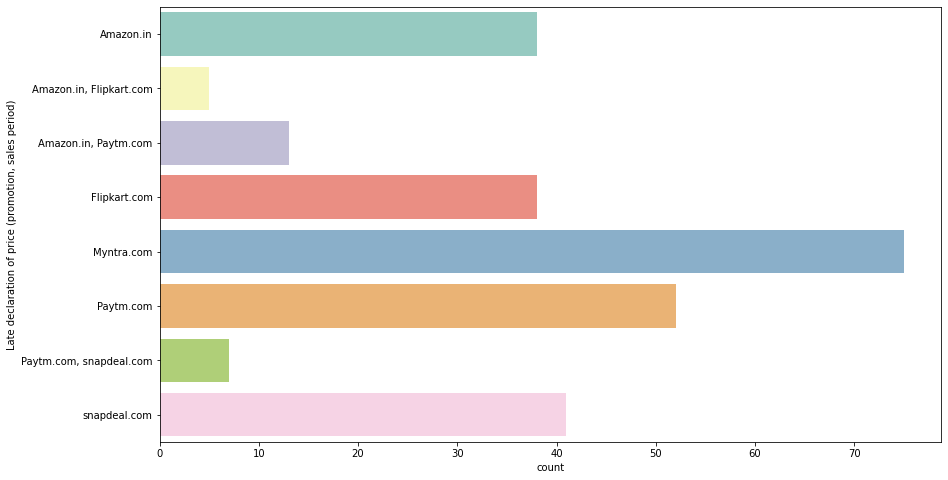

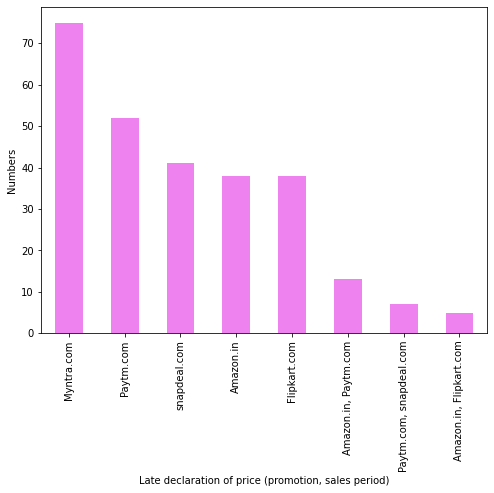

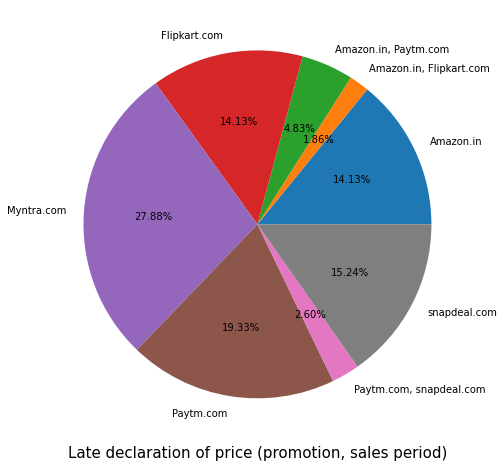

In [90]:
#Late declaration of price (promotion, sales period)
bar3(16)

####  observation:-

Late declaration of price (promotion, sales period) on Myntra.com are 75 

Late declaration of price (promotion, sales period) on paytm.com are 41 

Late declaration of price (promotion, sales period) on paytm.com are 52 

Late declaration of price (promotion, sales period) on snapdeal.com are 41 

Late declaration of price (promotion, sales period) on flipkart.com are 38 

Late declaration of price (promotion, sales period) on Amazon.in are 38 

Late declaration of price (promotion, sales period) on Amazon.in, Paytm.com are 13. 

Late declaration of price (promotion, sales period) on Paytm.com, snapdeal.com are 7. 

Late declaration of price (promotion, sales period) on Amazon.in, Flipkart.com are 5.

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64
----------------------------------------------------------------------------------------------------


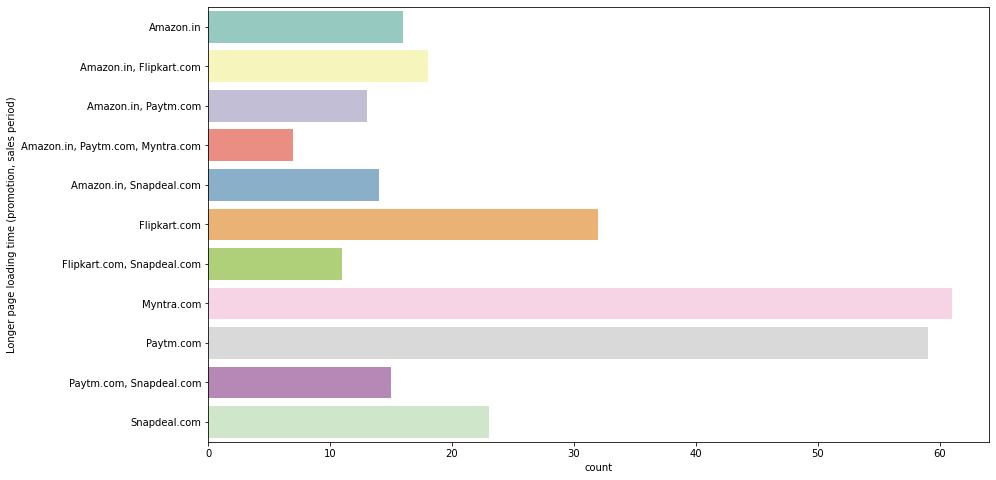

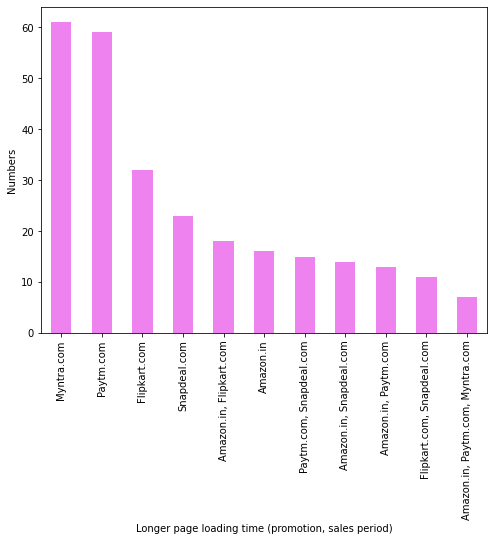

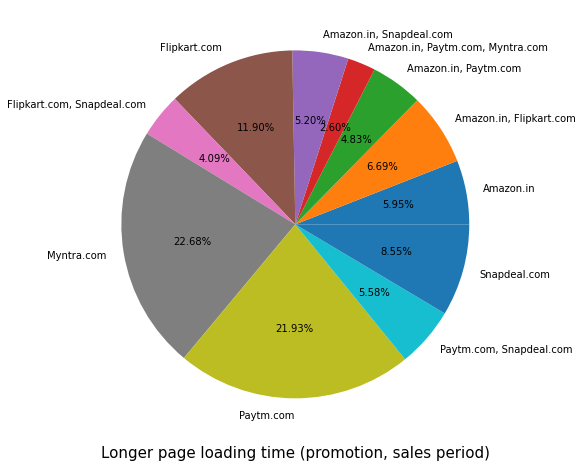

In [91]:
#Longer page loading time (promotion, sales period)
bar3(17)

#### observation:-

Longer page loading time (promotion, sales period) on Myntra.com are 61 Longer page loading time (promotion, sales period) on paytm.com are 59 Longer page loading time (promotion, sales period) on FlipKart.com are 32 Longer page loading time (promotion, sales period) on snapdeal.com are 23 Longer page loading time (promotion, sales period) on Amazon.in, Flipkart.com are 18 Longer page loading time (promotion, sales period) on Amazon.in are 16 Longer page loading time (promotion, sales period) on Paytm.com, Snapdeal.com are 15 Longer page loading time (promotion, sales period) on Amazon.in, Snapdeal.com are 14 Longer page loading time (promotion, sales period) on Amazon.in, Paytm.com are 13 Longer page loading time (promotion, sales period) on Flipkart.com, Snapdeal.com are 11 Longer page loading time (promotion, sales period) on Amazon.in, Paytm.com, Myntra.com are 7

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64
----------------------------------------------------------------------------------------------------


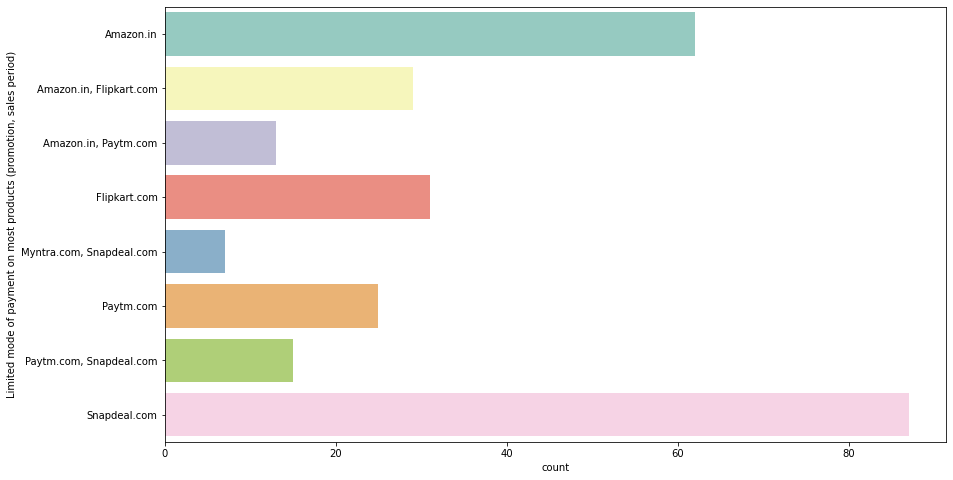

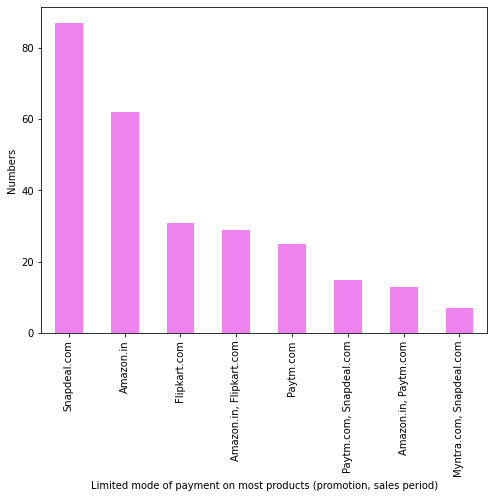

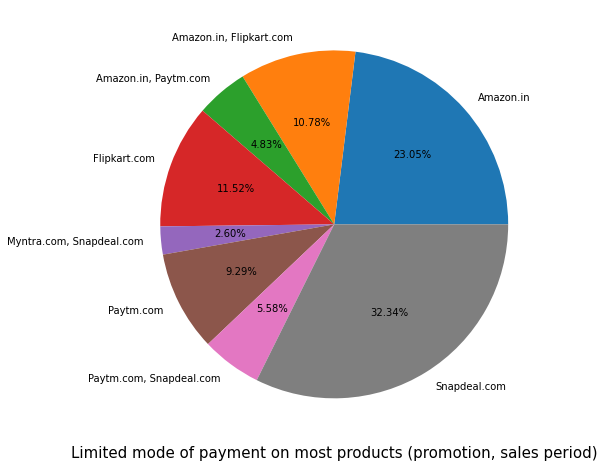

In [92]:
#Limited mode of payment on most products (promotion, sales period)
bar3(18)

#### observation:-

Limited mode of payment on most products (promotion, sales period) on Snapdeal.com are 87 Limited mode of payment on most products (promotion, sales period) on Amazon.in are 62 Limited mode of payment on most products (promotion, sales period) on Flipkart.com are 31 Limited mode of payment on most products (promotion, sales period) on Amazon.in, Flipkart.com are 29 Limited mode of payment on most products (promotion, sales period) on paytm.com are 25 Limited mode of payment on most products (promotion, sales period) on Paytm.com, Snapdeal.com are 15 Limited mode of payment on most products (promotion, sales period) on Amazon.in, Paytm.com are 13 Limited mode of payment on most products (promotion, sales period) on Myntra.com, Snapdeal.com are 7

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64
----------------------------------------------------------------------------------------------------


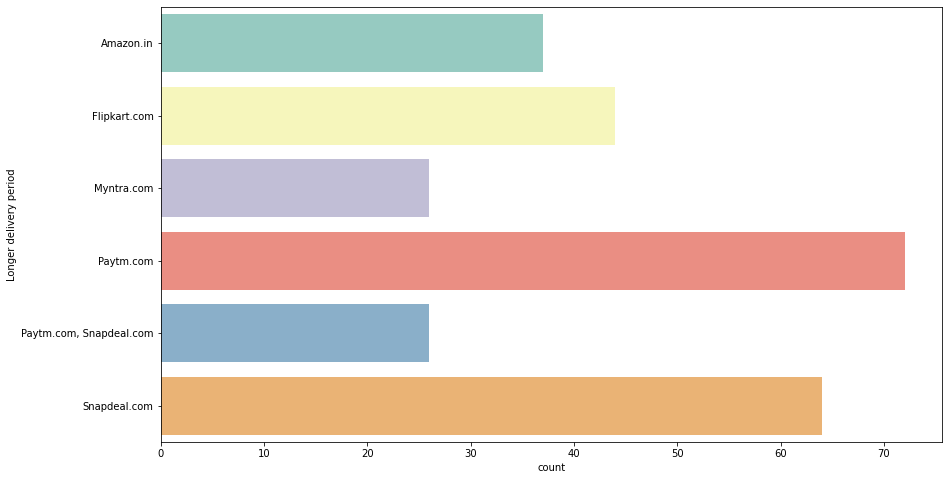

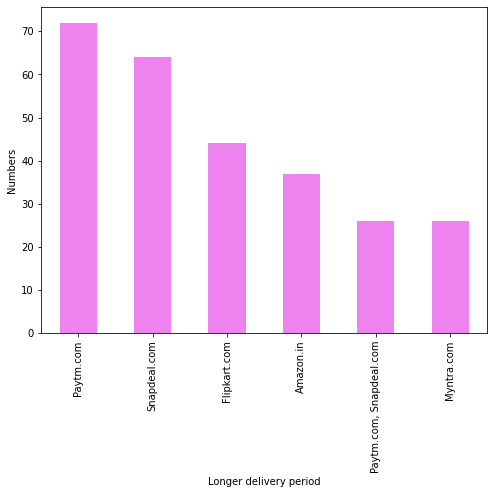

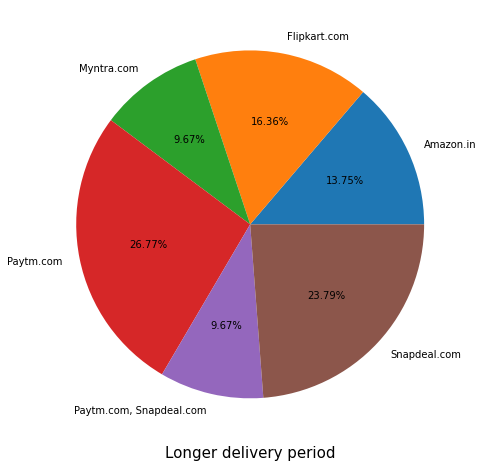

In [93]:
#Longer delivery period
bar3(19)

#### observation:-

1.Longer delivery period on paytm.com are 72 

2.longer delivery period on snapdeal.com are 64 

3.longer delivery period on Flipkart.com are 44 

4.longer delivery period on Amazon.in are 37 

5.longer delivery period on Paytm.com, Snapdeal.com are 26 

6.longer delivery period on myntra.com are 26

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64
----------------------------------------------------------------------------------------------------


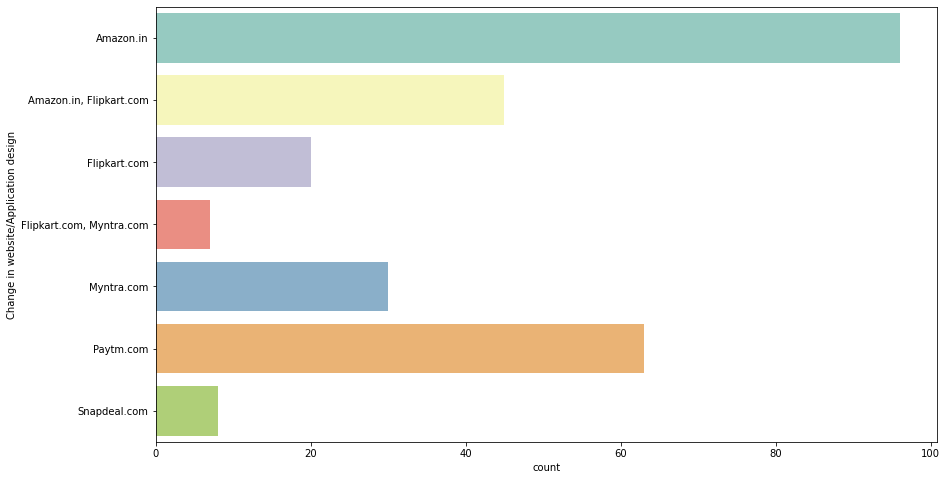

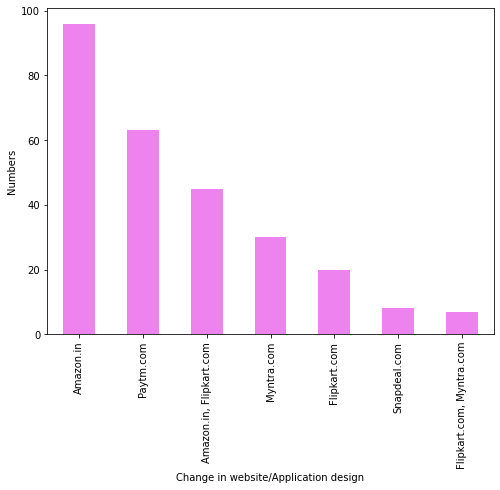

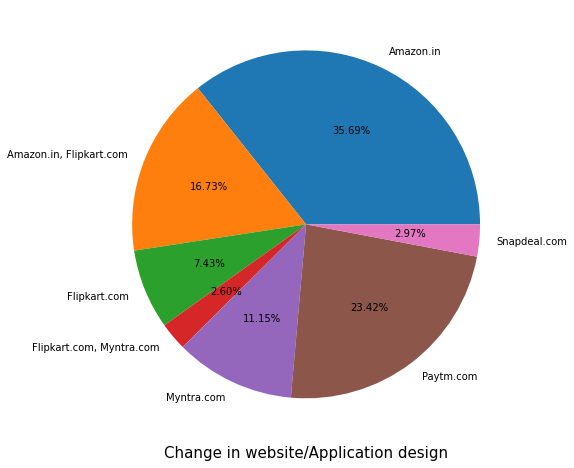

In [94]:
#Change in website/Application design
bar3(20)

#### observation:- 

1.Change in website/Application design in Amazon.com is 96 

2.Change in website/Application design in Paytm.com is 63 

3.Change in website/Application design in Amazon.in, Flipkart.com is 45 

4.Change in website/Application design in Myntra.com is 45 

5.Change in website/Application design in Flipkart.com is 20. 

6.Change in website/Application design in Snapdeal.com is 8. 

7.Change in website/Application design in Flipkart.com, Myntra.com is 7.

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64
----------------------------------------------------------------------------------------------------


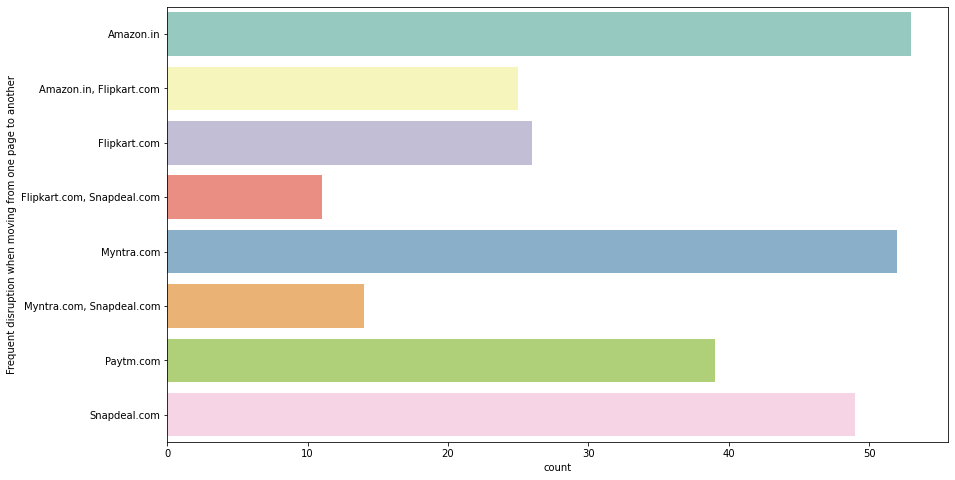

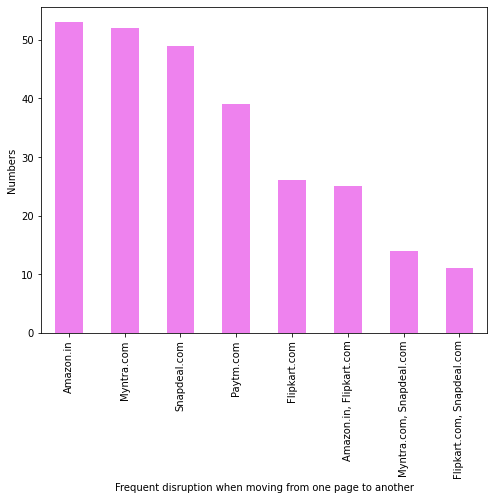

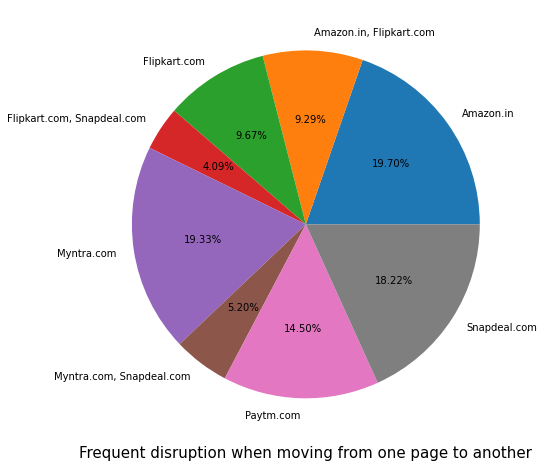

In [95]:
#Frequent disruption when moving from one page to another
bar3(21)

#### observation:-

1.Frequent disruption when moving from one page to another in Amazon.in are 53 

2.Frequent disruption when moving from one page to another in Myntra.com are 52 

3.Frequent disruption when moving from one page to another in snapdeal.com are 49 

4.Frequent disruption when moving from one page to another in paytm.com are 39 

5.Frequent disruption when moving from one page to another in Flipkart.com are 26 

6.Frequent disruption when moving from one page to another in Amazon.in, Flipkart.com are 25 

7.Frequent disruption when moving from one page to another in Myntra.com, Snapdeal.com are 14 

8.Frequent disruption when moving from one page to another in Flipkart.com, Snapdeal.com are 11

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64
----------------------------------------------------------------------------------------------------


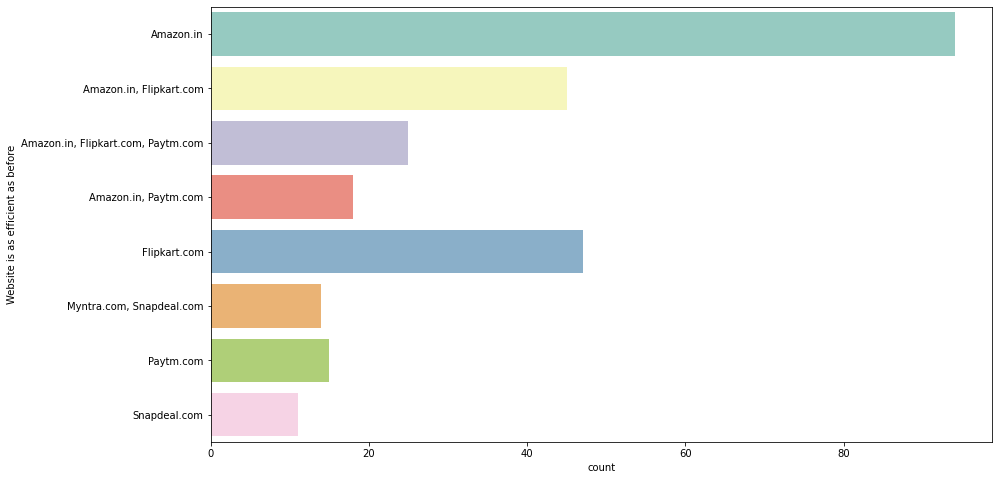

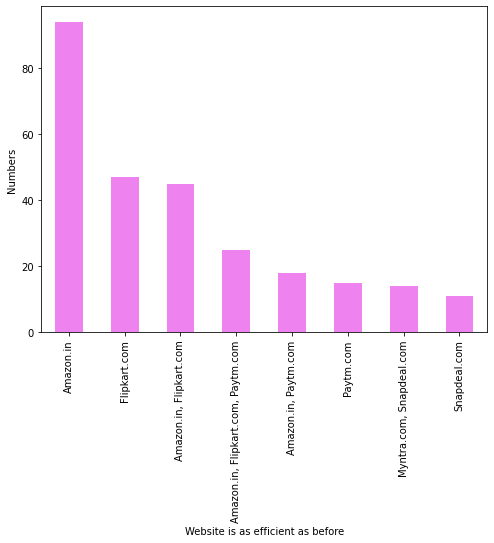

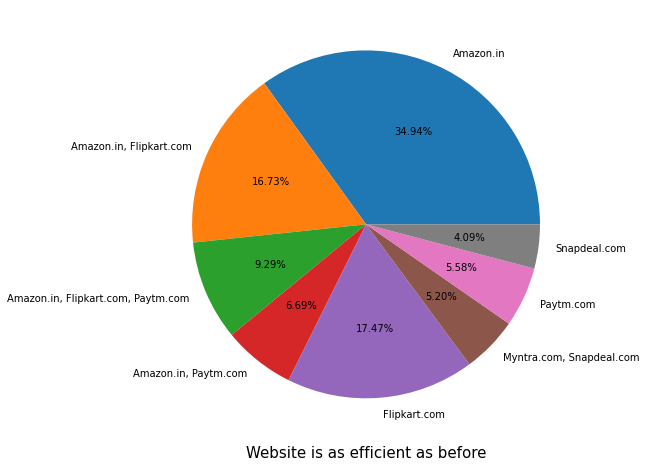

In [96]:
#Website is as efficient as before
bar3(22)

#### observation:-

1.Website is as efficient as before in Amazon.in for 94 peoples 

2.Website is as efficient as before in Flipkart.com for 47 peoples 

3.Website is as efficient as before in Amazon.in, Flipkart.com for 45 peoples 

4.Website is as efficient as before in Amazon.in, Flipkart.com, paytm.com for 25 peoples 

5.Website is as efficient as before in Amazon.in, paytm.com for 18 peoples 

6.Website is as efficient as before in paytm.com for 15 peoples 

7.Website is as efficient as before in amazon.in, Paytm.com for 18 peoples 

8.Website is as efficient as before in Paytm.com for 15 peoples 

9.Website is as efficient as before in Paytm.com for 15 peoples 

10.Website is as efficient as before in Myntra.com, Snapdeal.com for 14 peoples 11.Website is as efficient as before in Snapdeal.com for 11 peoples

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Best online retailer to recommend, dtype: int64
----------------------------------------------------------------------------------------------------


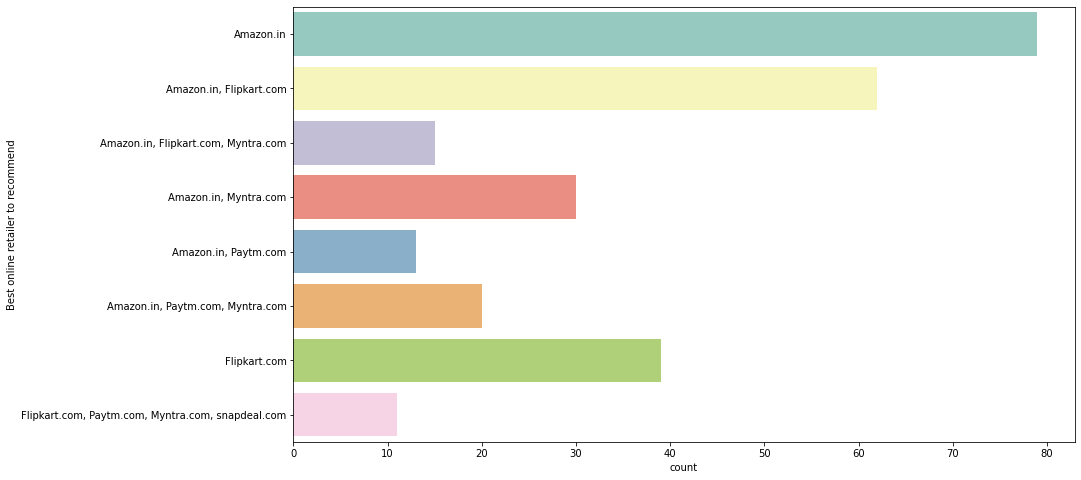

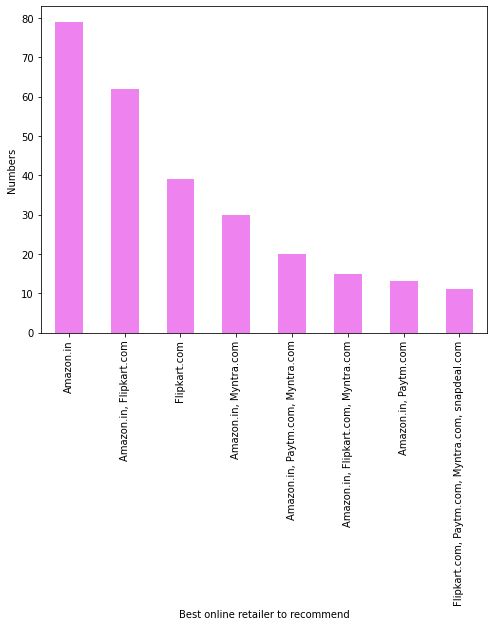

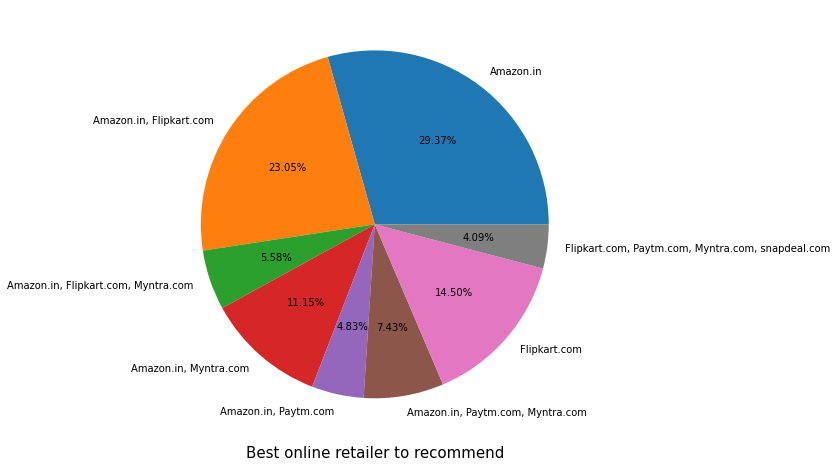

In [97]:
#Best online retailer to recommend
bar3(23)

#### observation:-

1.the Indian online retailer would you recommend to a friend by people in Amazon.in are 79 

2.the Indian online retailer would you recommend to a friend by people in Amazon.in, Flipkart.com are 39 

3.the Indian online retailer would you recommend to a friend by people in Amazon.in, Flipkart.com are 62 

4.the Indian online retailer would you recommend to a friend by people in Flipkart.com are 39 

5.the Indian online retailer would you recommend to a friend by people in Amazon.in, Myntra.com are 30 

6.the Indian online retailer would you recommend to a friend by people in Amazon.in, Paytm.com, Myntra.com are 20 

7.the Indian online retailer would you recommend to a friend by people in Amazon.in, Flipkart.com, Myntra.com are 15 

8.the Indian online retailer would you recommend to a friend by people in Amazon.in, Paytm.com are 13 

9.the Indian online retailer would you recommend to a friend by people in Flipkart.com, Paytm.com, Myntra.com, snapdeal.com are 11

# Final Conclusion

##### From above analysis. It is clear that amazon outperforms all the other e-tailors in each and every factor and also best for recommending to others..The count plot gives the rough analysis, the bar graph gives us the best insights of data in an orderly manner. Pie charts are used to analyse the impact of data in percentage. Taking all those features into account and also satisfying all the needs, factors mentioned by customer while building an online retail store will help in good retention of customer throughout the business.